In [1]:
import re
import pprint
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
import warnings
import pyproj as proj
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
desired = [
 'property_type','room_type','accommodates','bathrooms',
 'bedrooms','beds','price','cleaning_fee', 'latitude', 'longitude', 'amenities']

def clean_price(strngy):
    """
    Quick function to strip formatting from dollars
    """
    dols = strngy.replace('$', '')
    dols = dols.replace(',', '')
    dols = float(dols)
    return dols

def clean_amens(amenity):
    """
    Quick function to unpack amenities into list
    """
    amenity = amenity.replace('{','')
    amenity = amenity.replace('}','')
    amenity = amenity.replace('"','')
    amenlist = amenity.split(',')
    return amenlist
    
def clean_DF(DF, region):
    """
    Clean_DF does what it says, it takes in a cityDF, then initially drops any columns
    that won't be used, and proceeds to fill out ones that will be needed with some 
    assumed values.
    """
    #Dropping undesirable columns...
    DF = DF[desired]
    
    DF.cleaning_fee.fillna(value = '$0.00', inplace = True)

    DF.price = DF.price.apply(clean_price)
    DF.cleaning_fee = DF.cleaning_fee.apply(clean_price)

    DF = DF[DF['price'] != 0]
    DF = DF[np.isfinite(DF.bathrooms)]
    DF = DF[np.isfinite(DF.bedrooms)]
    DF = DF[np.isfinite(DF.beds)]
    
    #Drop Other property types, these accounted for a very small amount of rows
    #it included various interesting structures such as yurts and teepees.
    prop_types = ['Apartment', 'House', 'Townhouse', 'Loft', 'Condominium']
    DF = DF[DF['property_type'].isin(prop_types)]
    
    
    return DF

In [3]:
Austin = pd.read_csv('data/AustinListings.csv')
Boston = pd.read_csv('data/BostonListings.csv')
DC = pd.read_csv('data/DCListings.csv')
LA = pd.read_csv('data/LAListings.csv')
NewOrleans = pd.read_csv('data/NewOrleansListings.csv')
NY = pd.read_csv('data/NYListings.csv')
Portland = pd.read_csv('data/PortlandListings.csv')
Seattle = pd.read_csv('data/SeattleListings.csv')
SF = pd.read_csv('data/SFListings.csv')

aus = clean_DF(Austin, 'Austin')
bos = clean_DF(Boston, 'Boston')
wdc = clean_DF(DC, 'DC')
los = clean_DF(LA, 'Los Angeles')
nla = clean_DF(NewOrleans, 'New Orleans')
nyc = clean_DF(NY, 'New York City')
prt = clean_DF(Portland, 'Portland')
sea = clean_DF(Seattle, 'Seattle')
sfo = clean_DF(SF, 'San Francisco')
dfl = [aus, bos, wdc, los, nla, nyc, prt, sea, sfo]

### This code is for the three types of plots that were made for my project. the first plots are all of the raw ones with unique data points galore. The second for loop is specific to the way in which some of my models see the latitude and longitude, and the third method was made for my presentation, and was used to describe how the model sees a cleaner version of the data while still keeping the overall shape of the cities visible (for example, NYC is still looks pretty clear, and in a smaller city like San Francisco, the third loop maps still shows the shape of Golden Gate Park in a useful way.

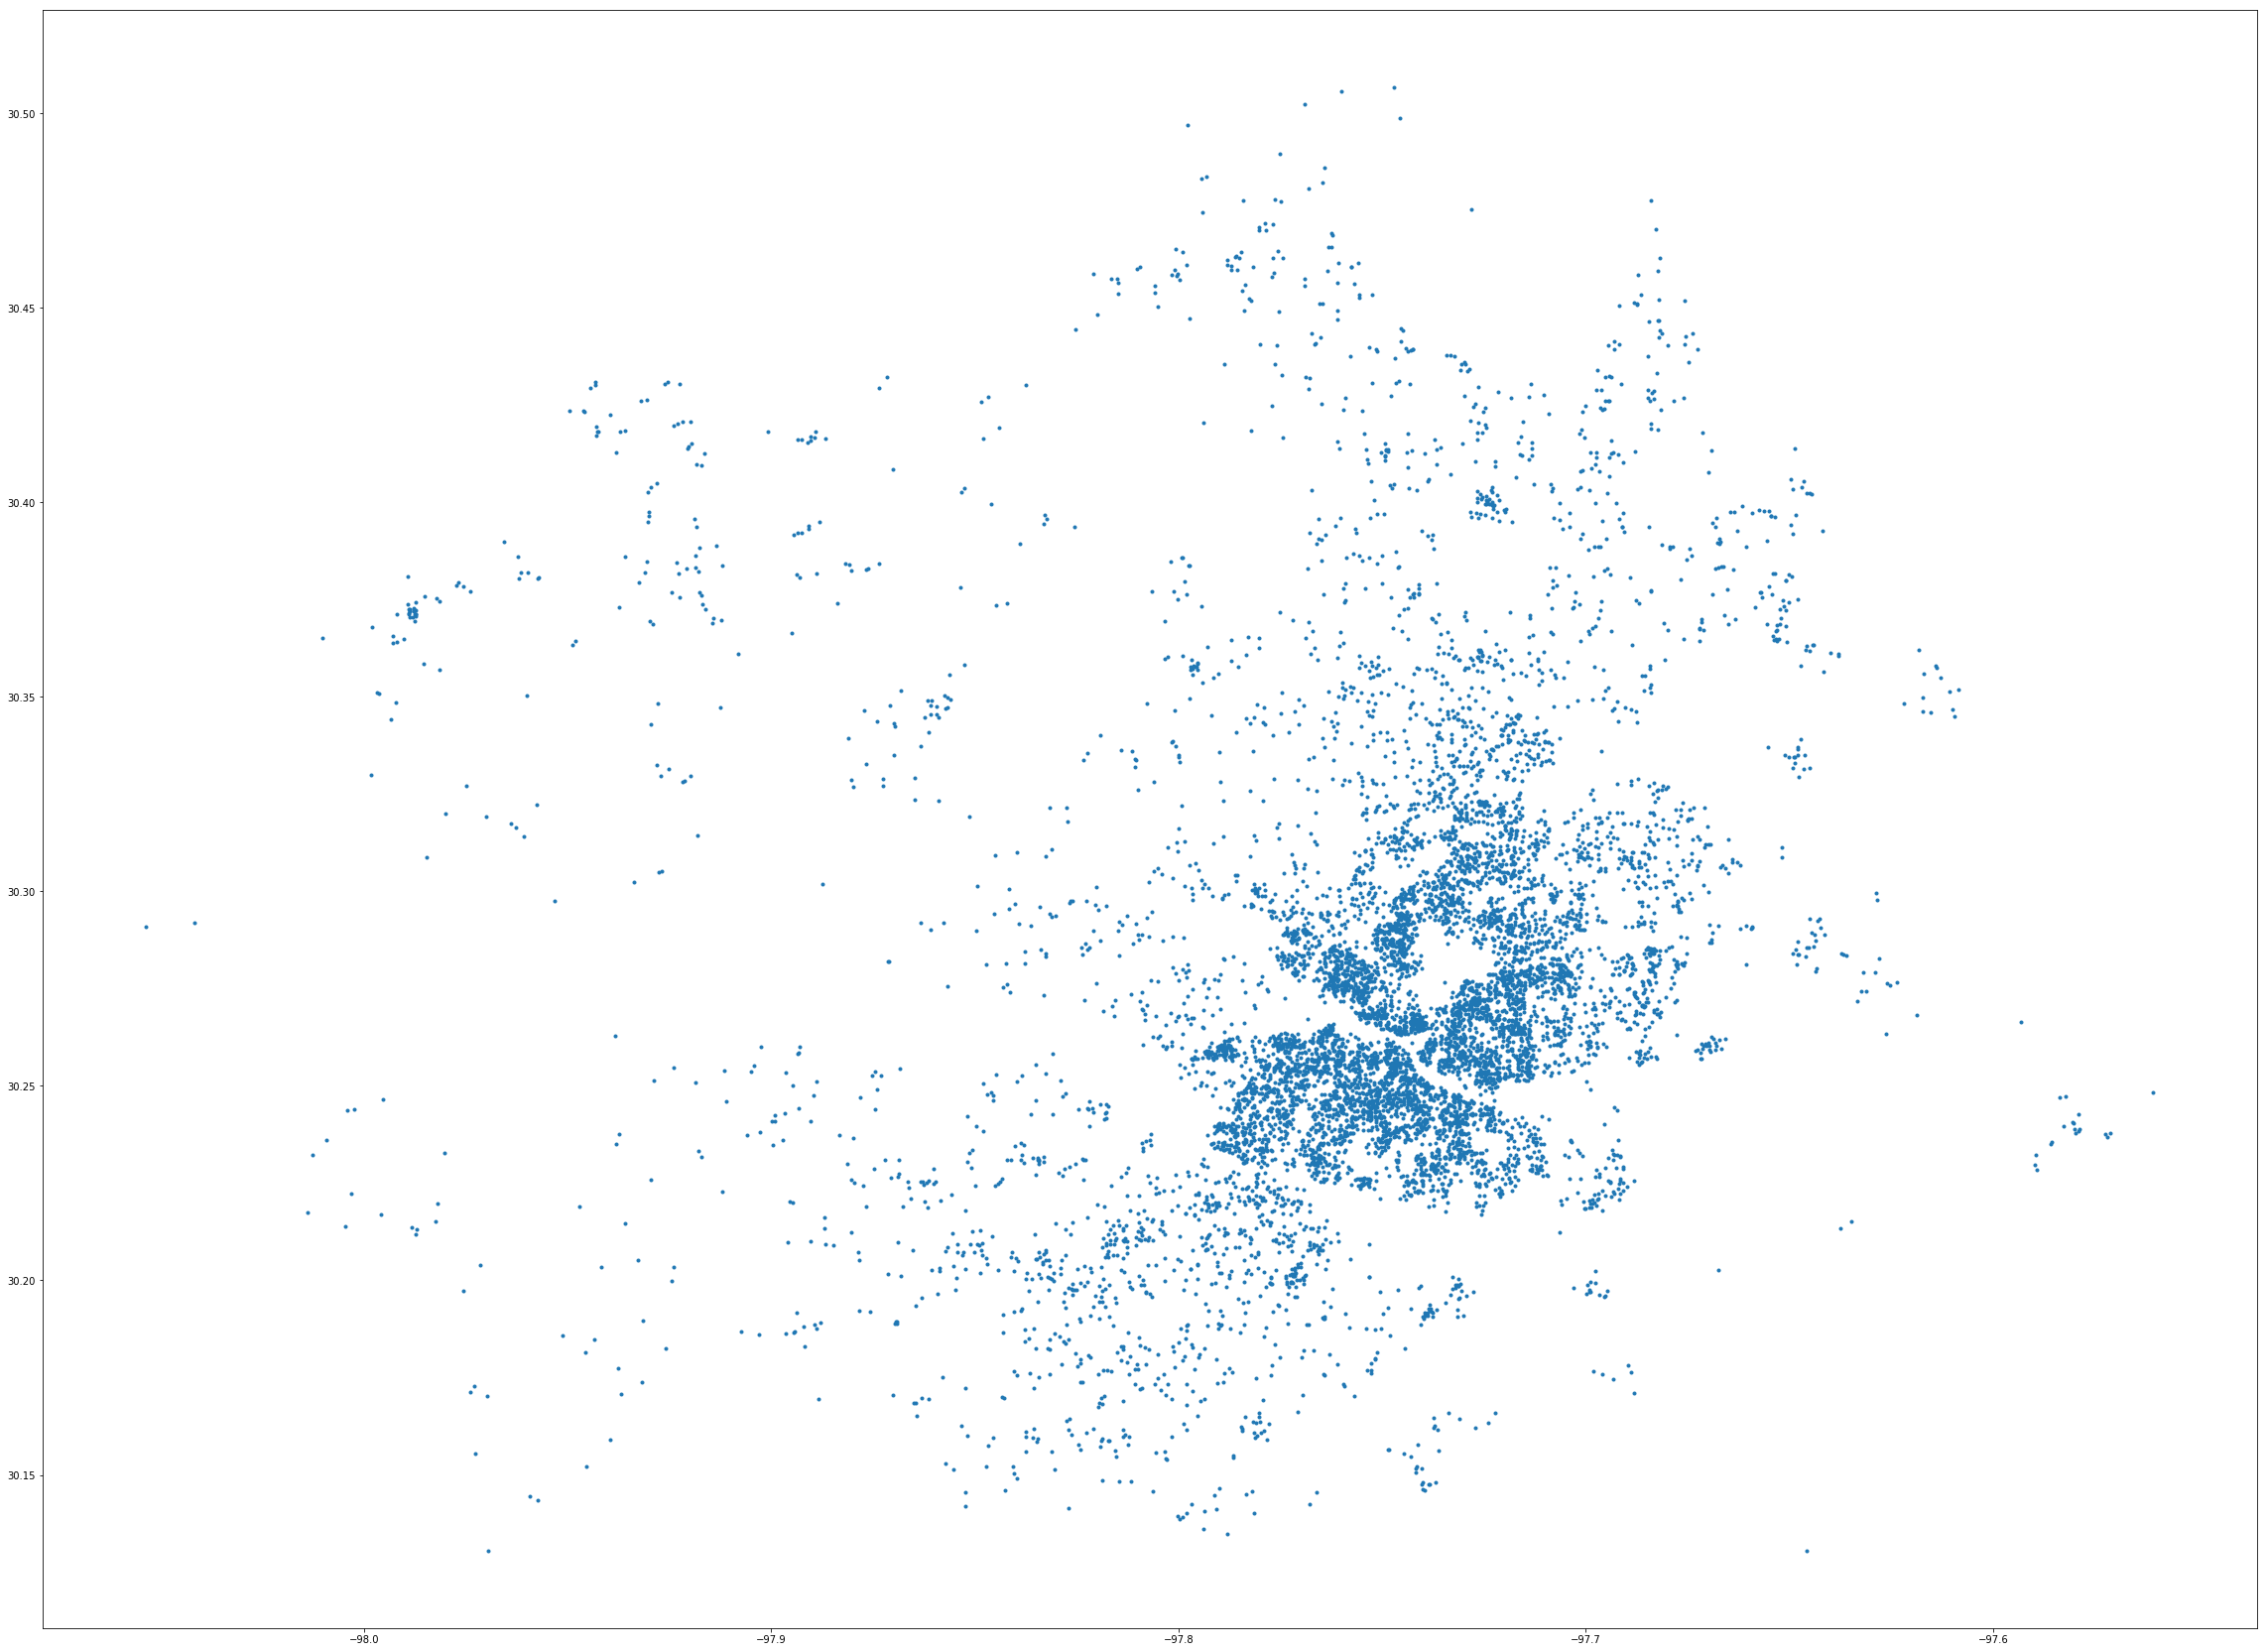

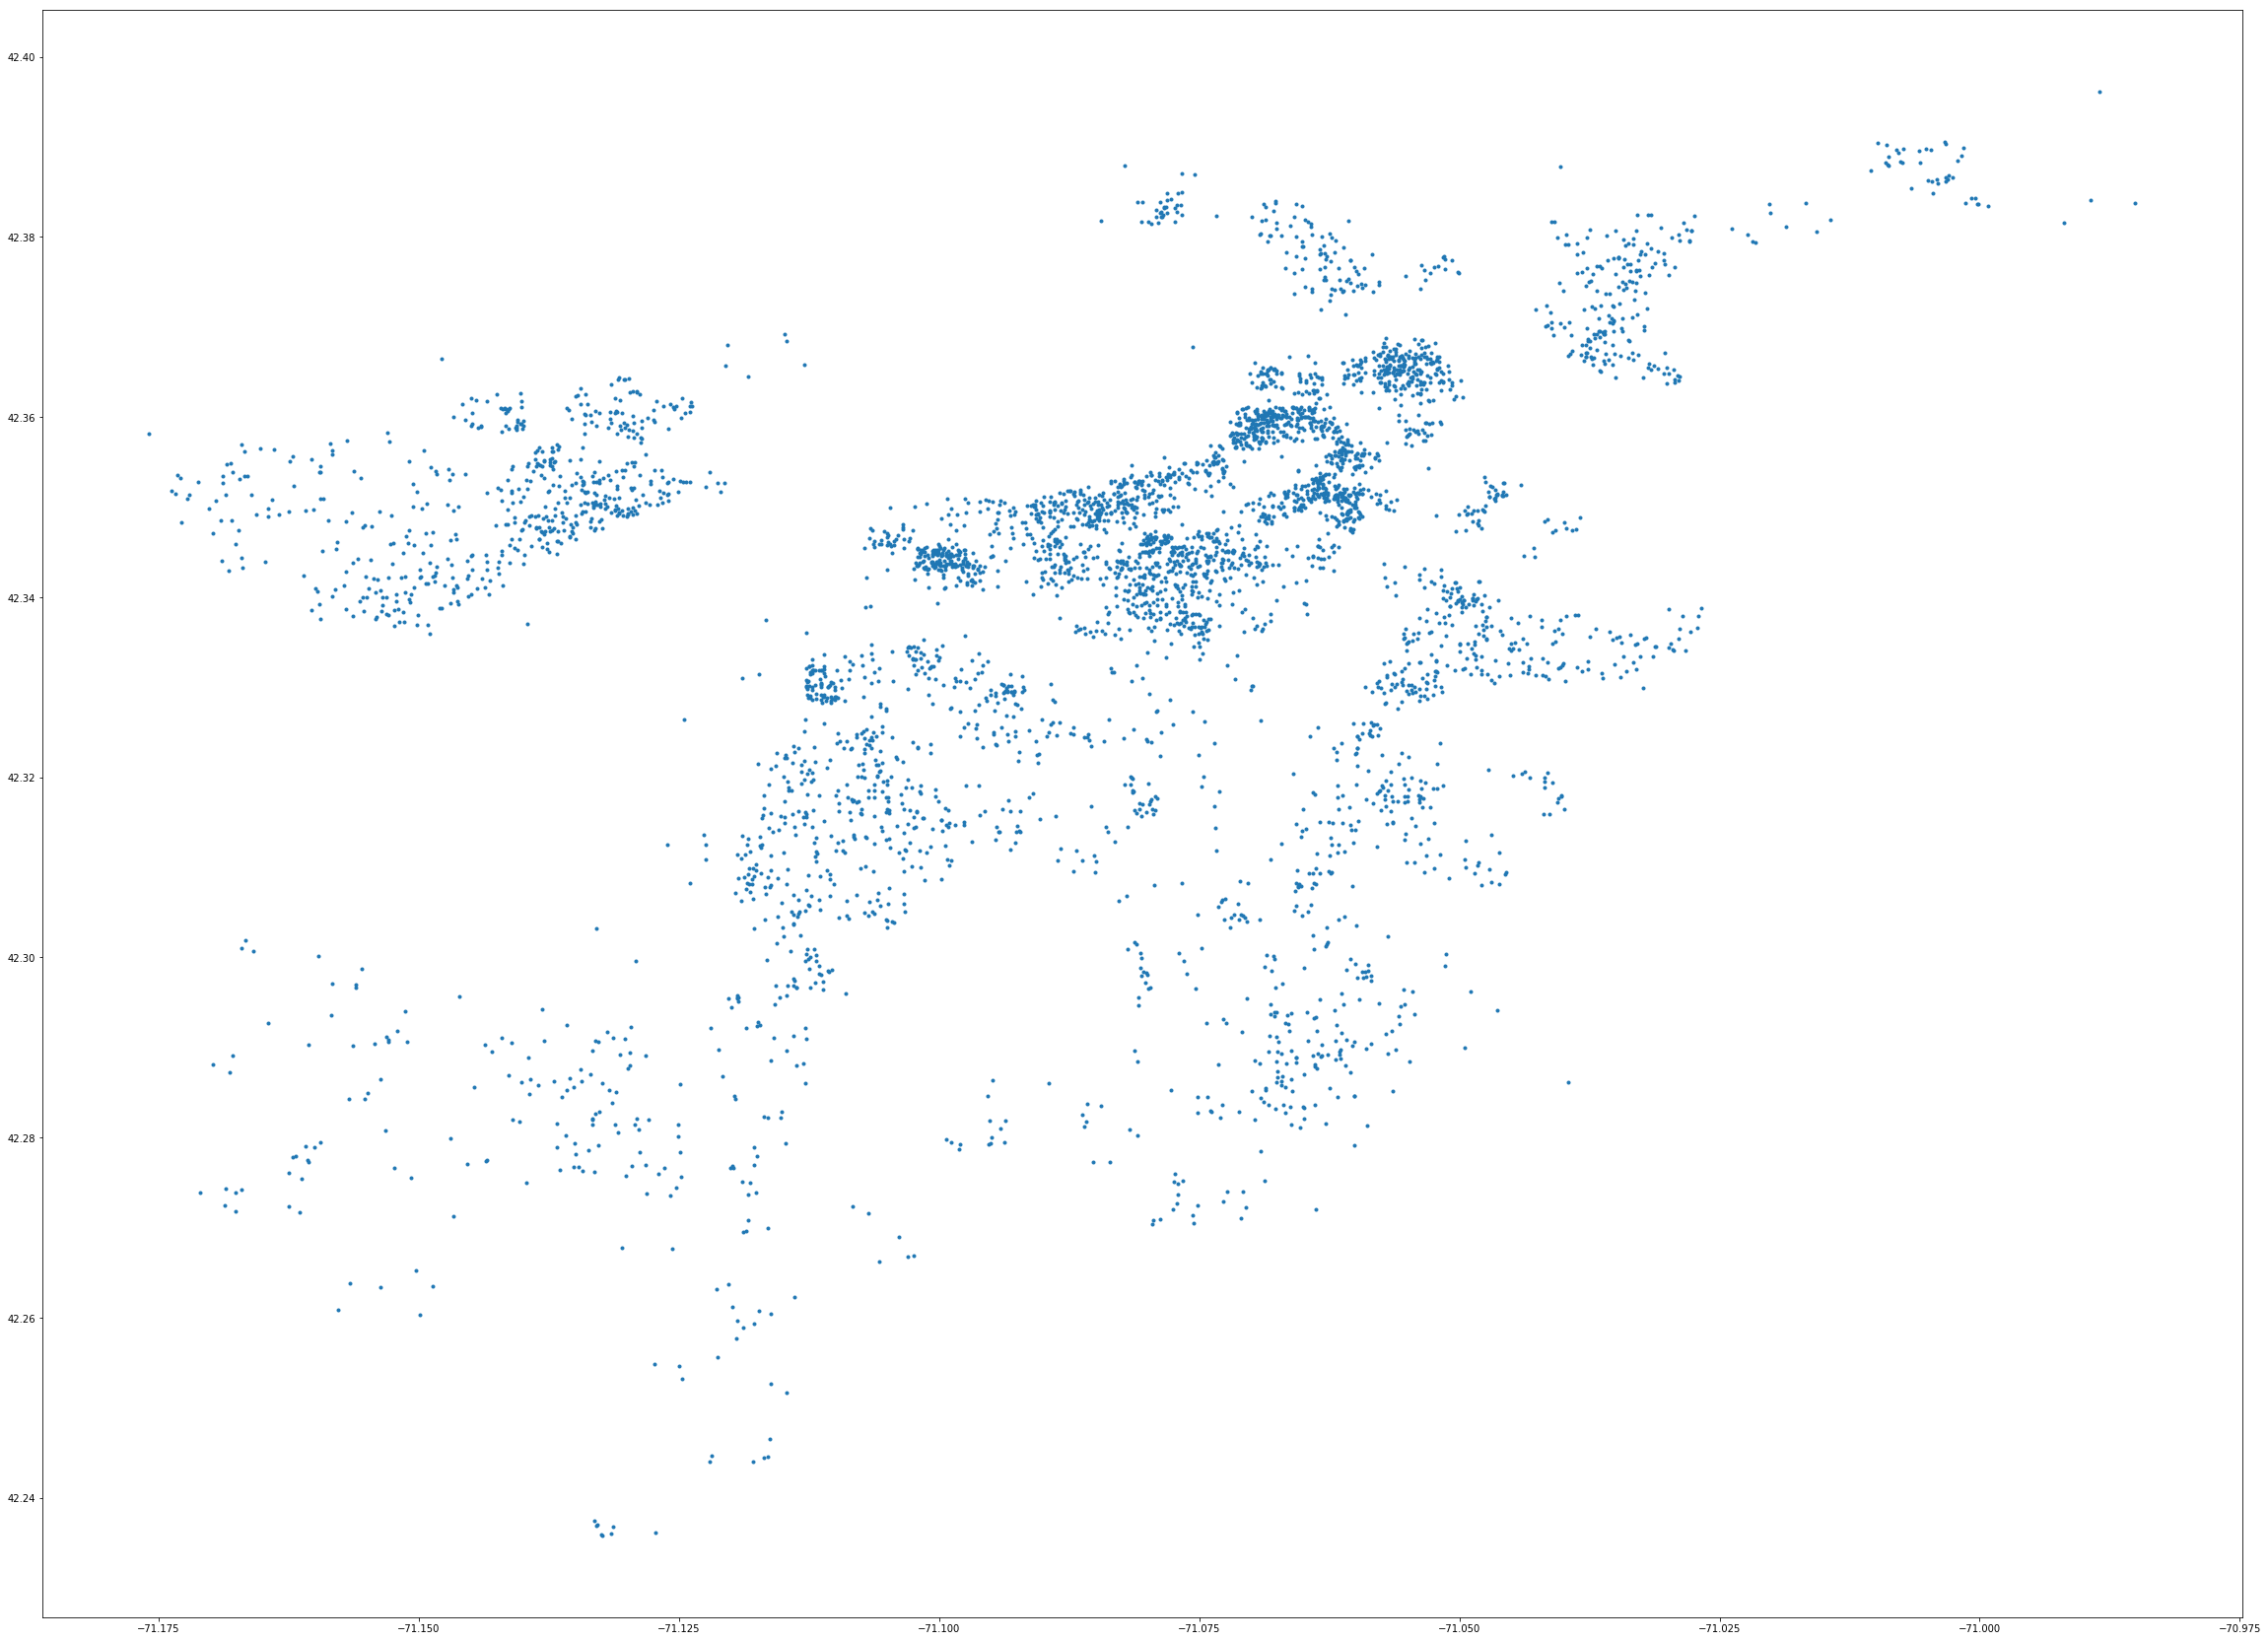

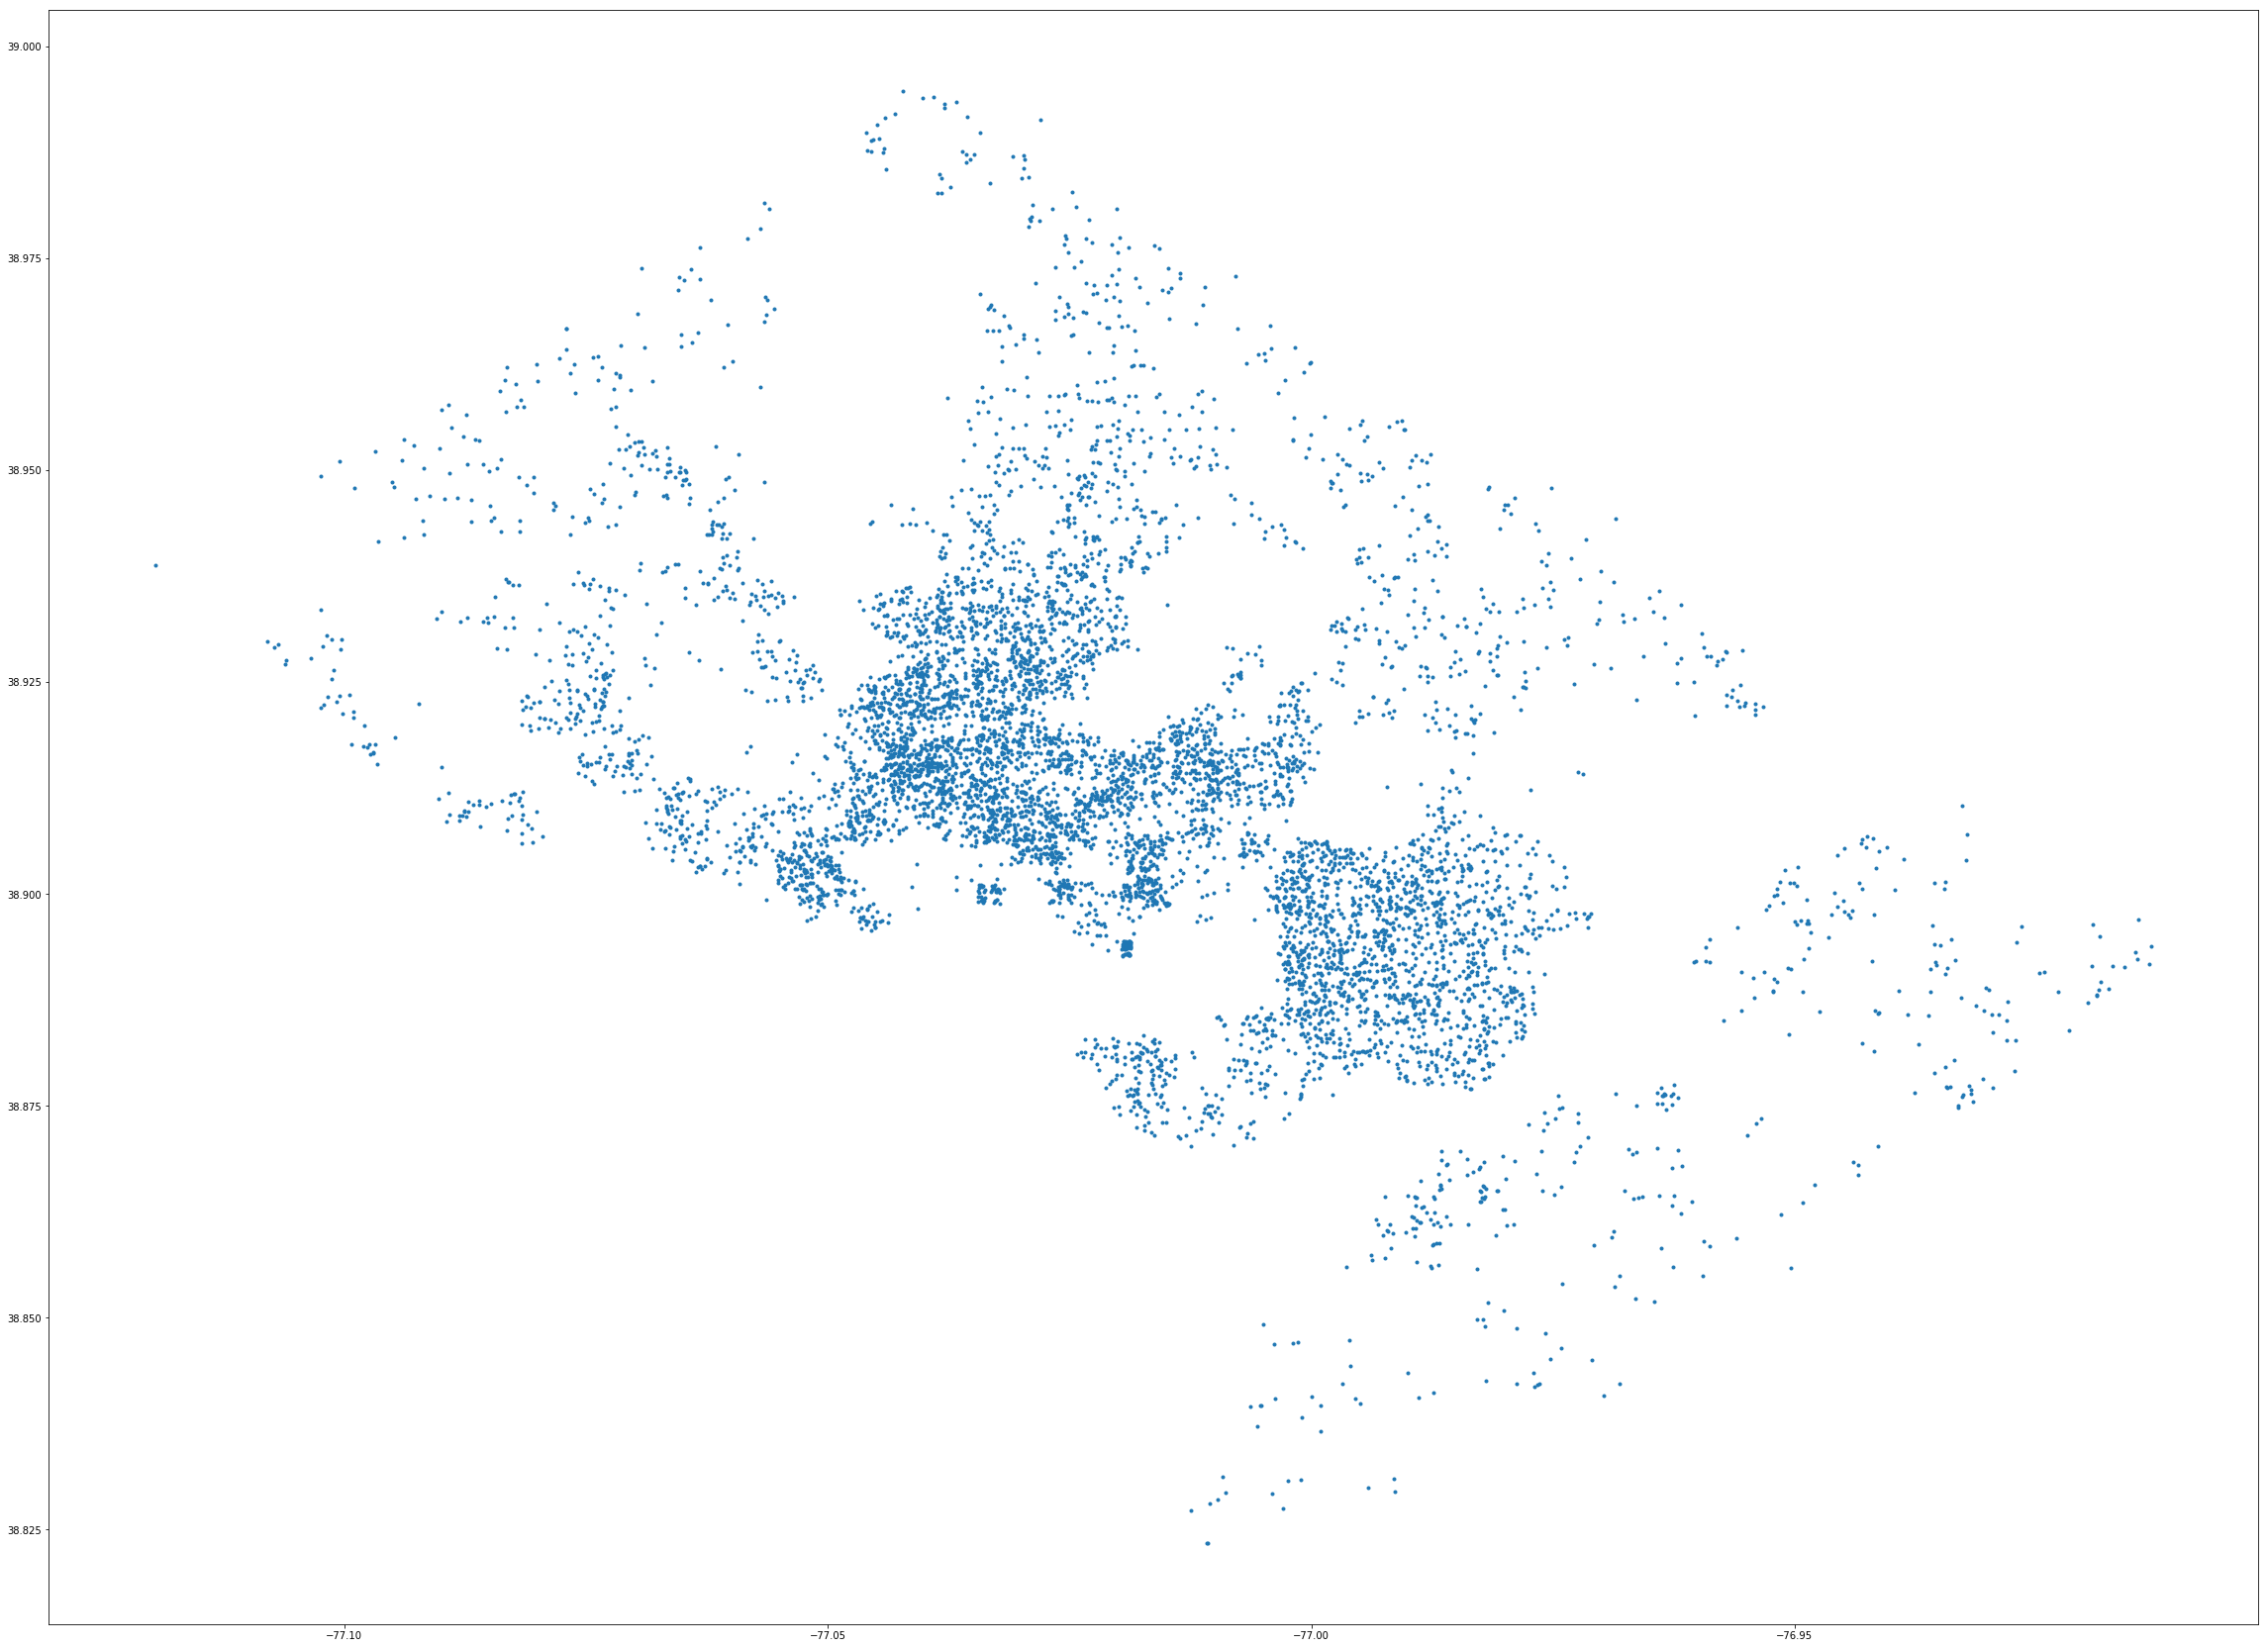

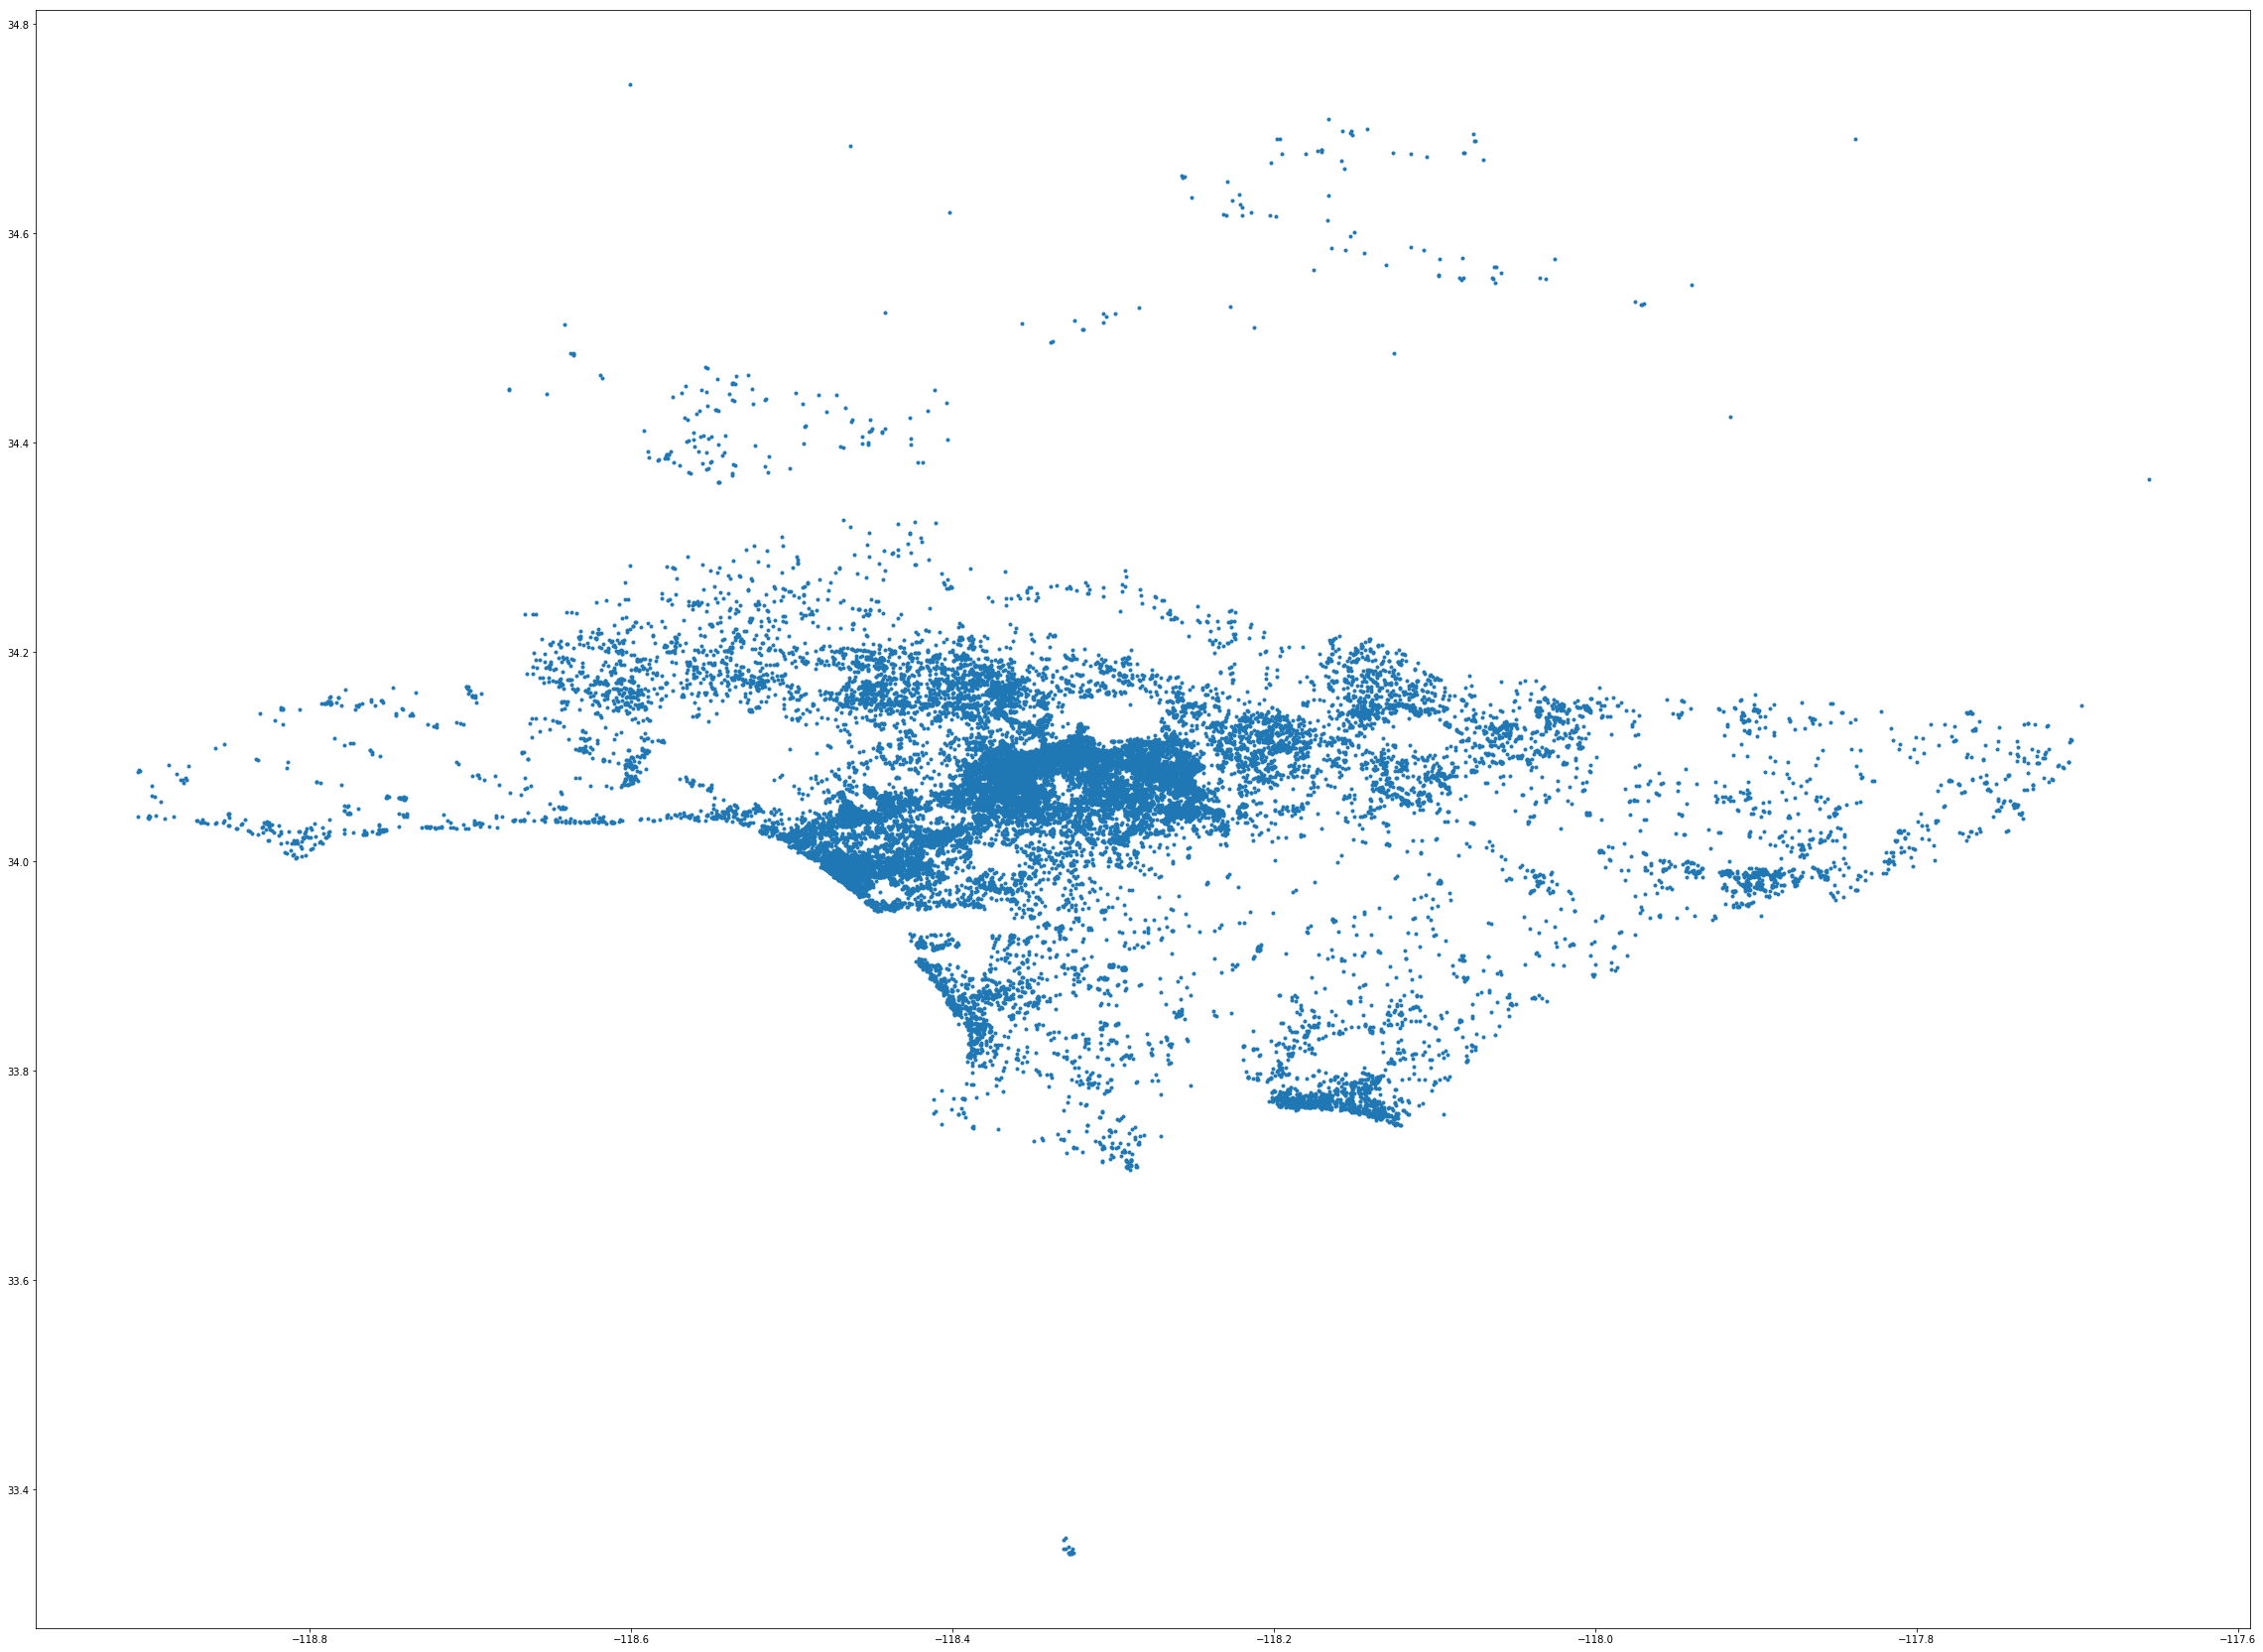

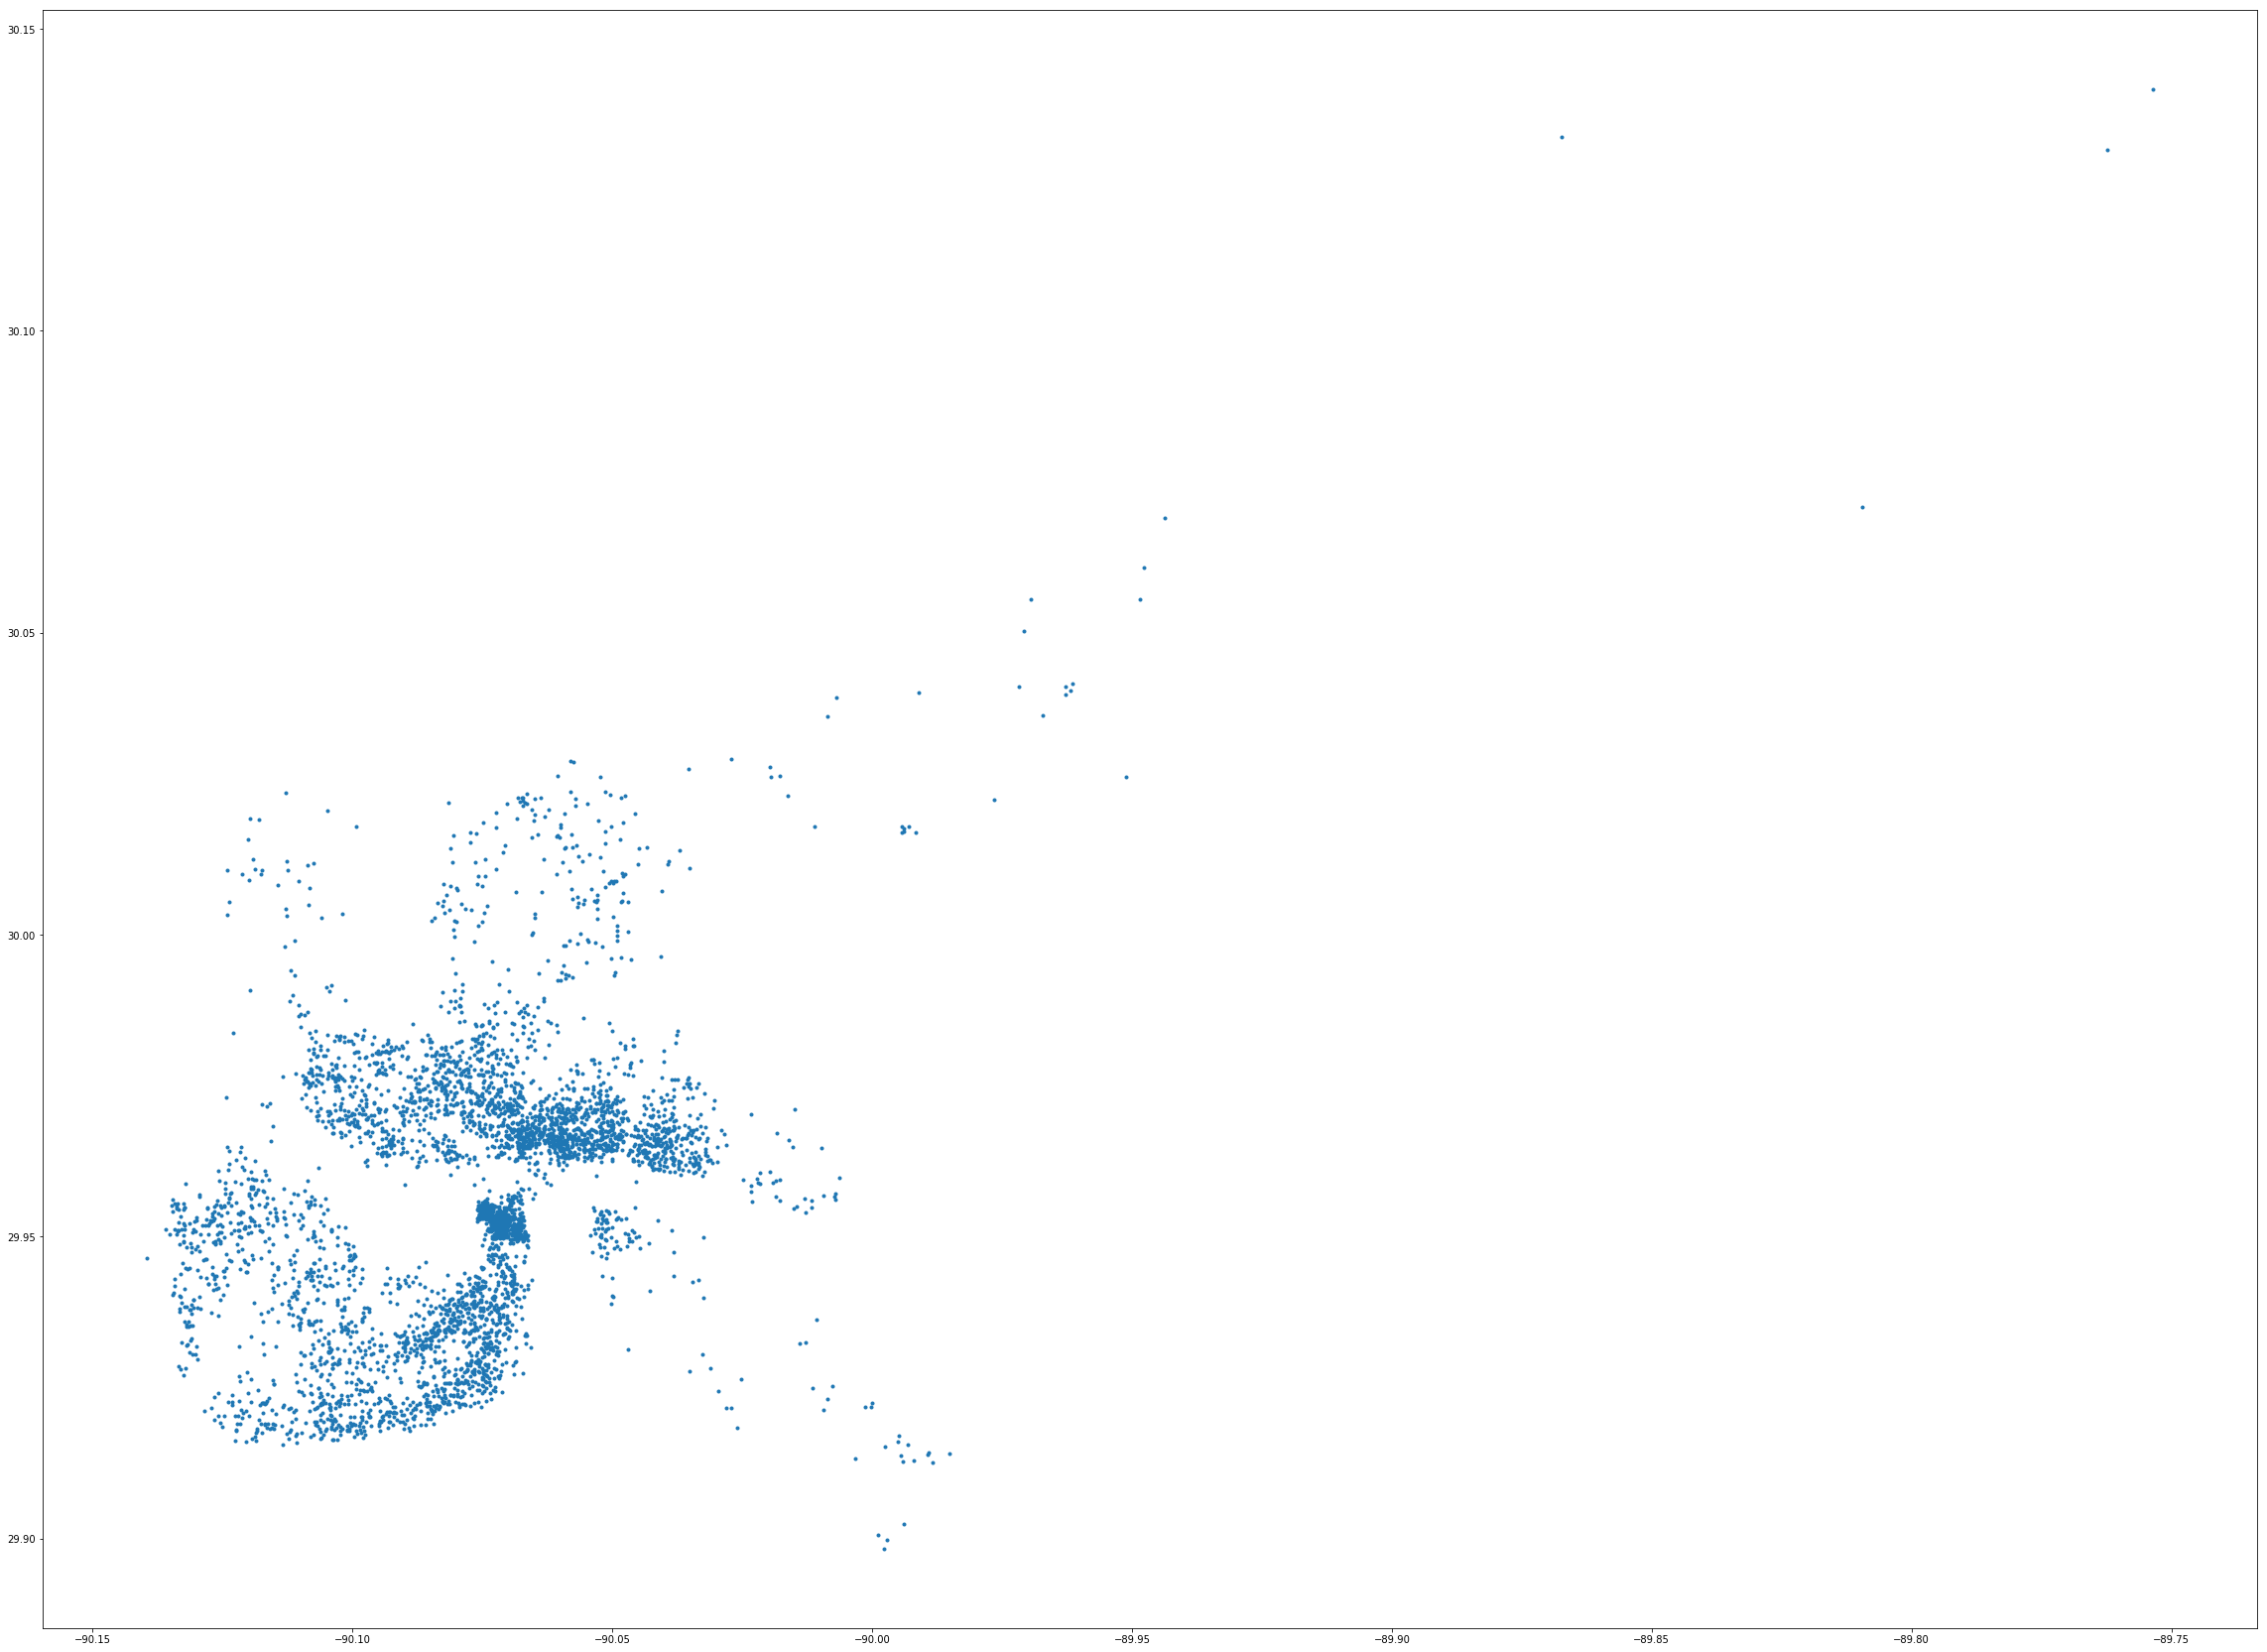

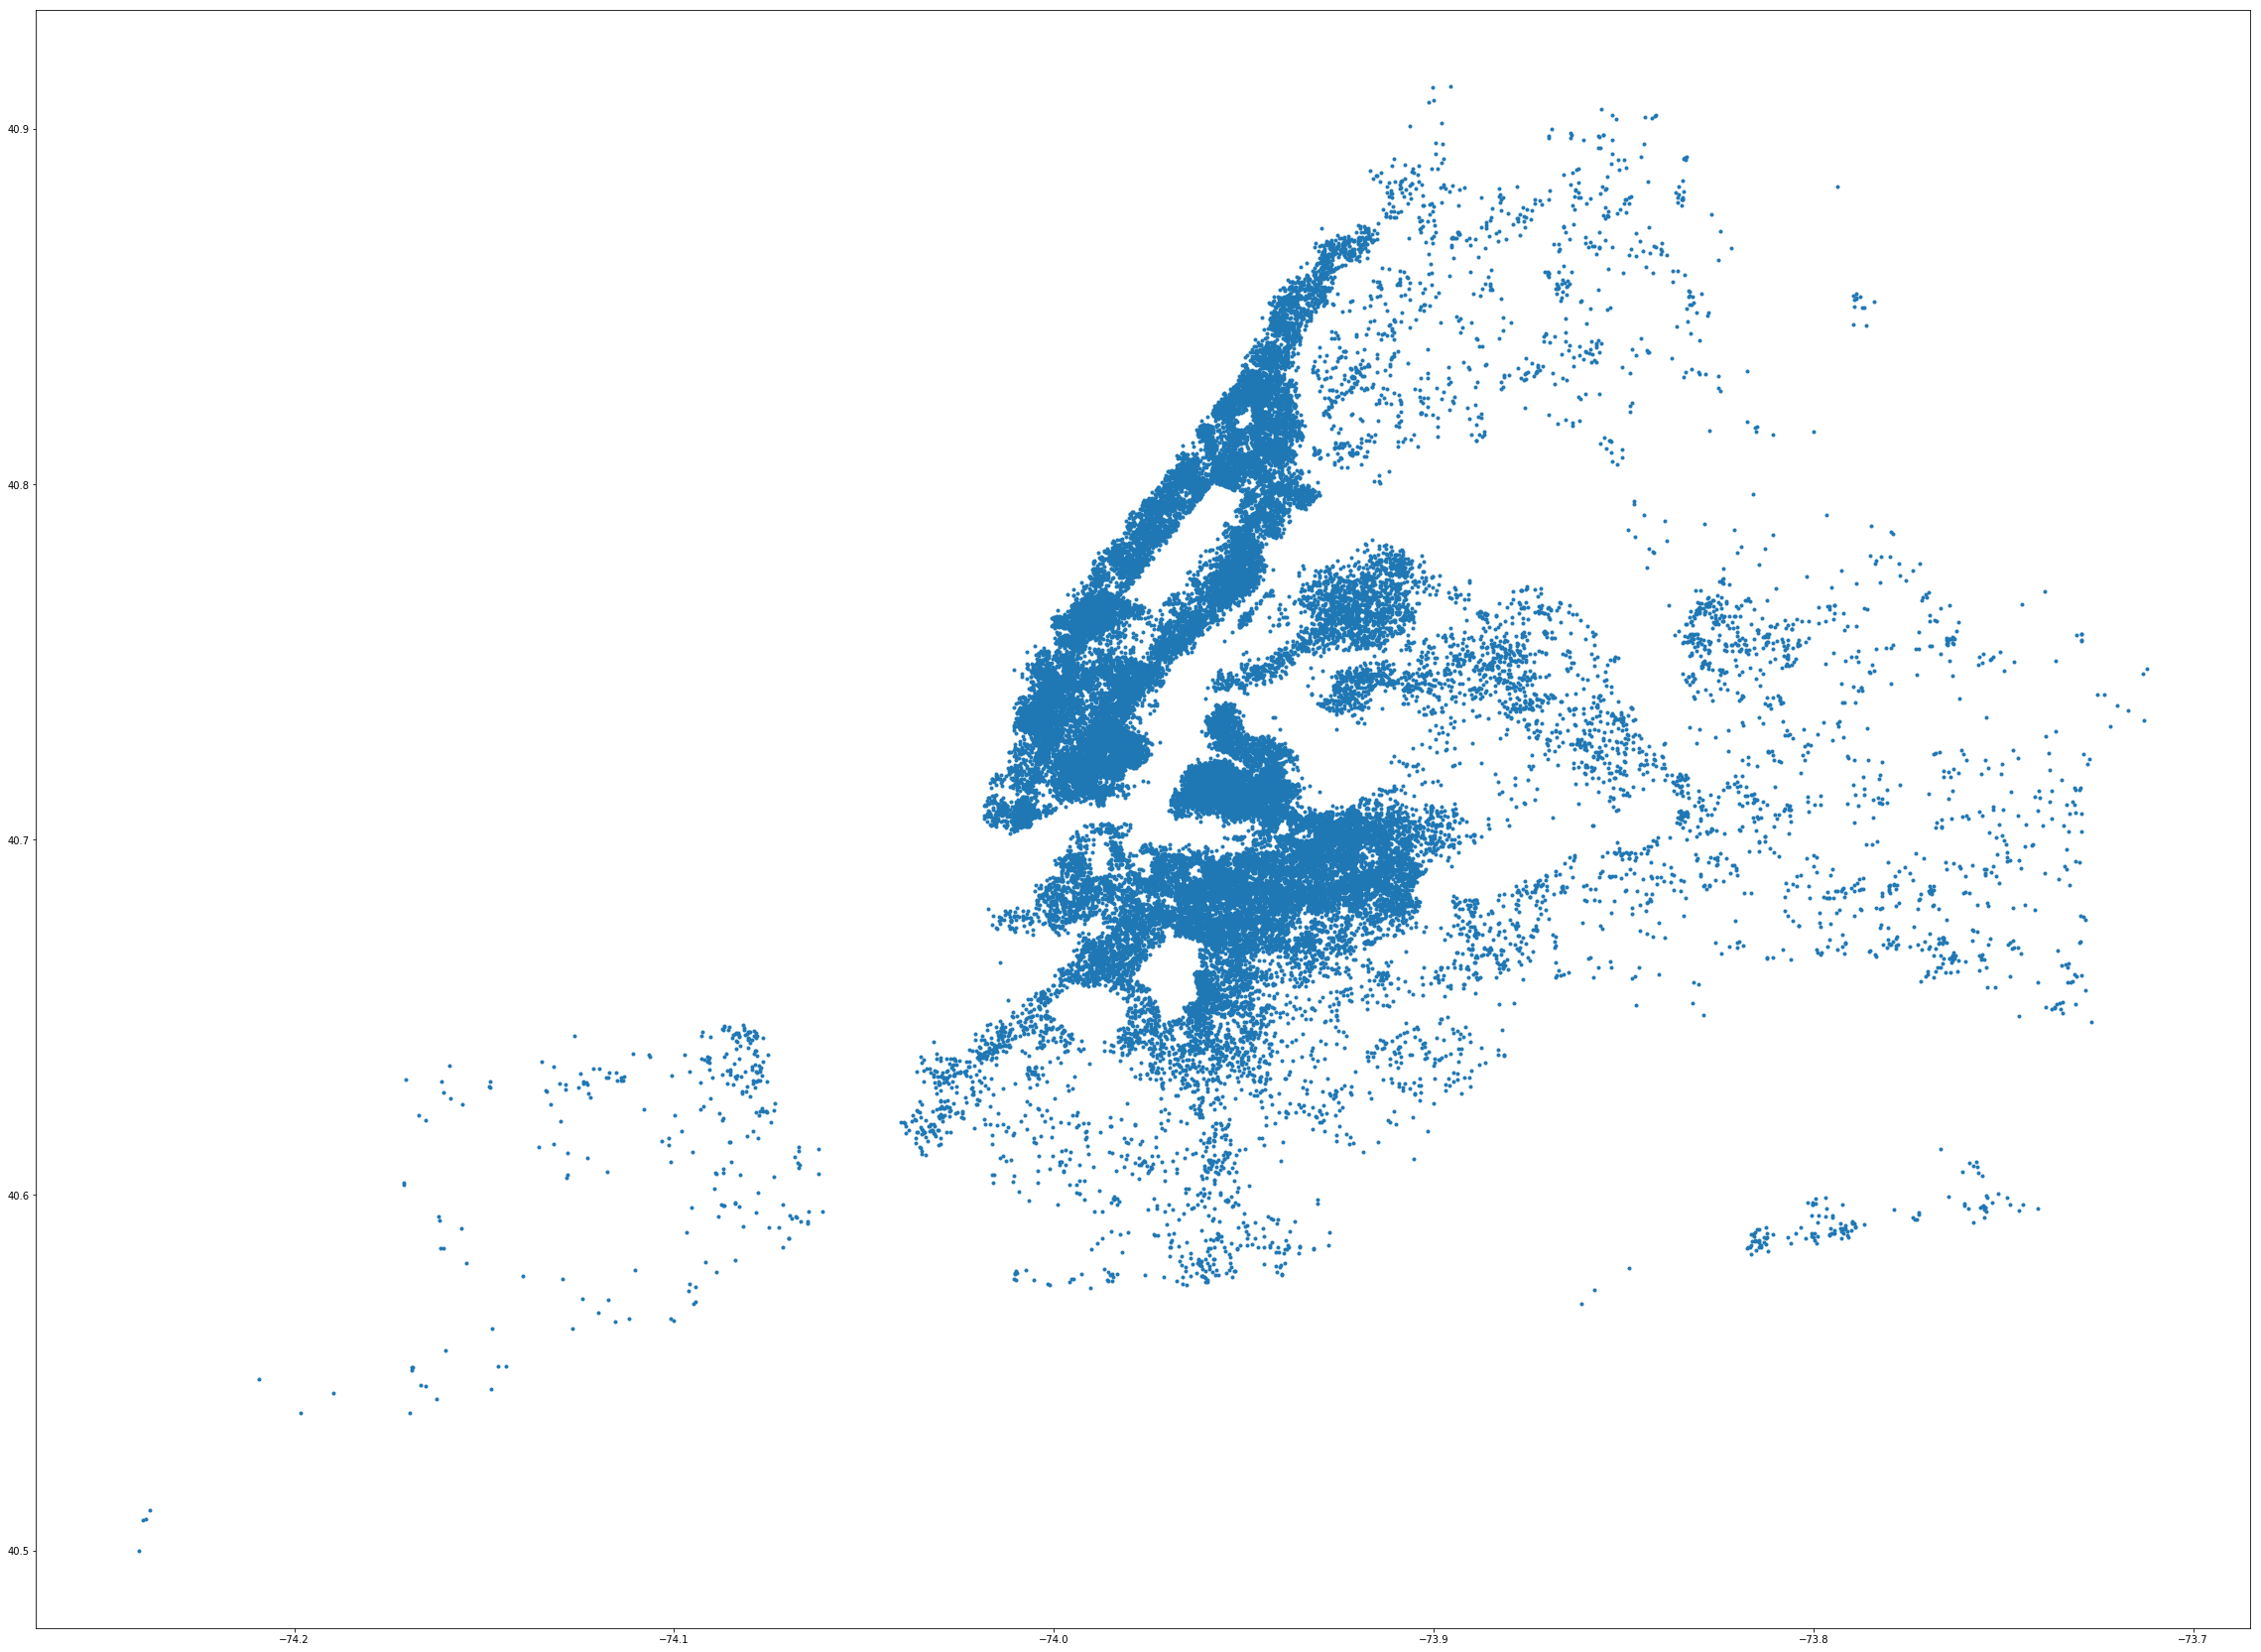

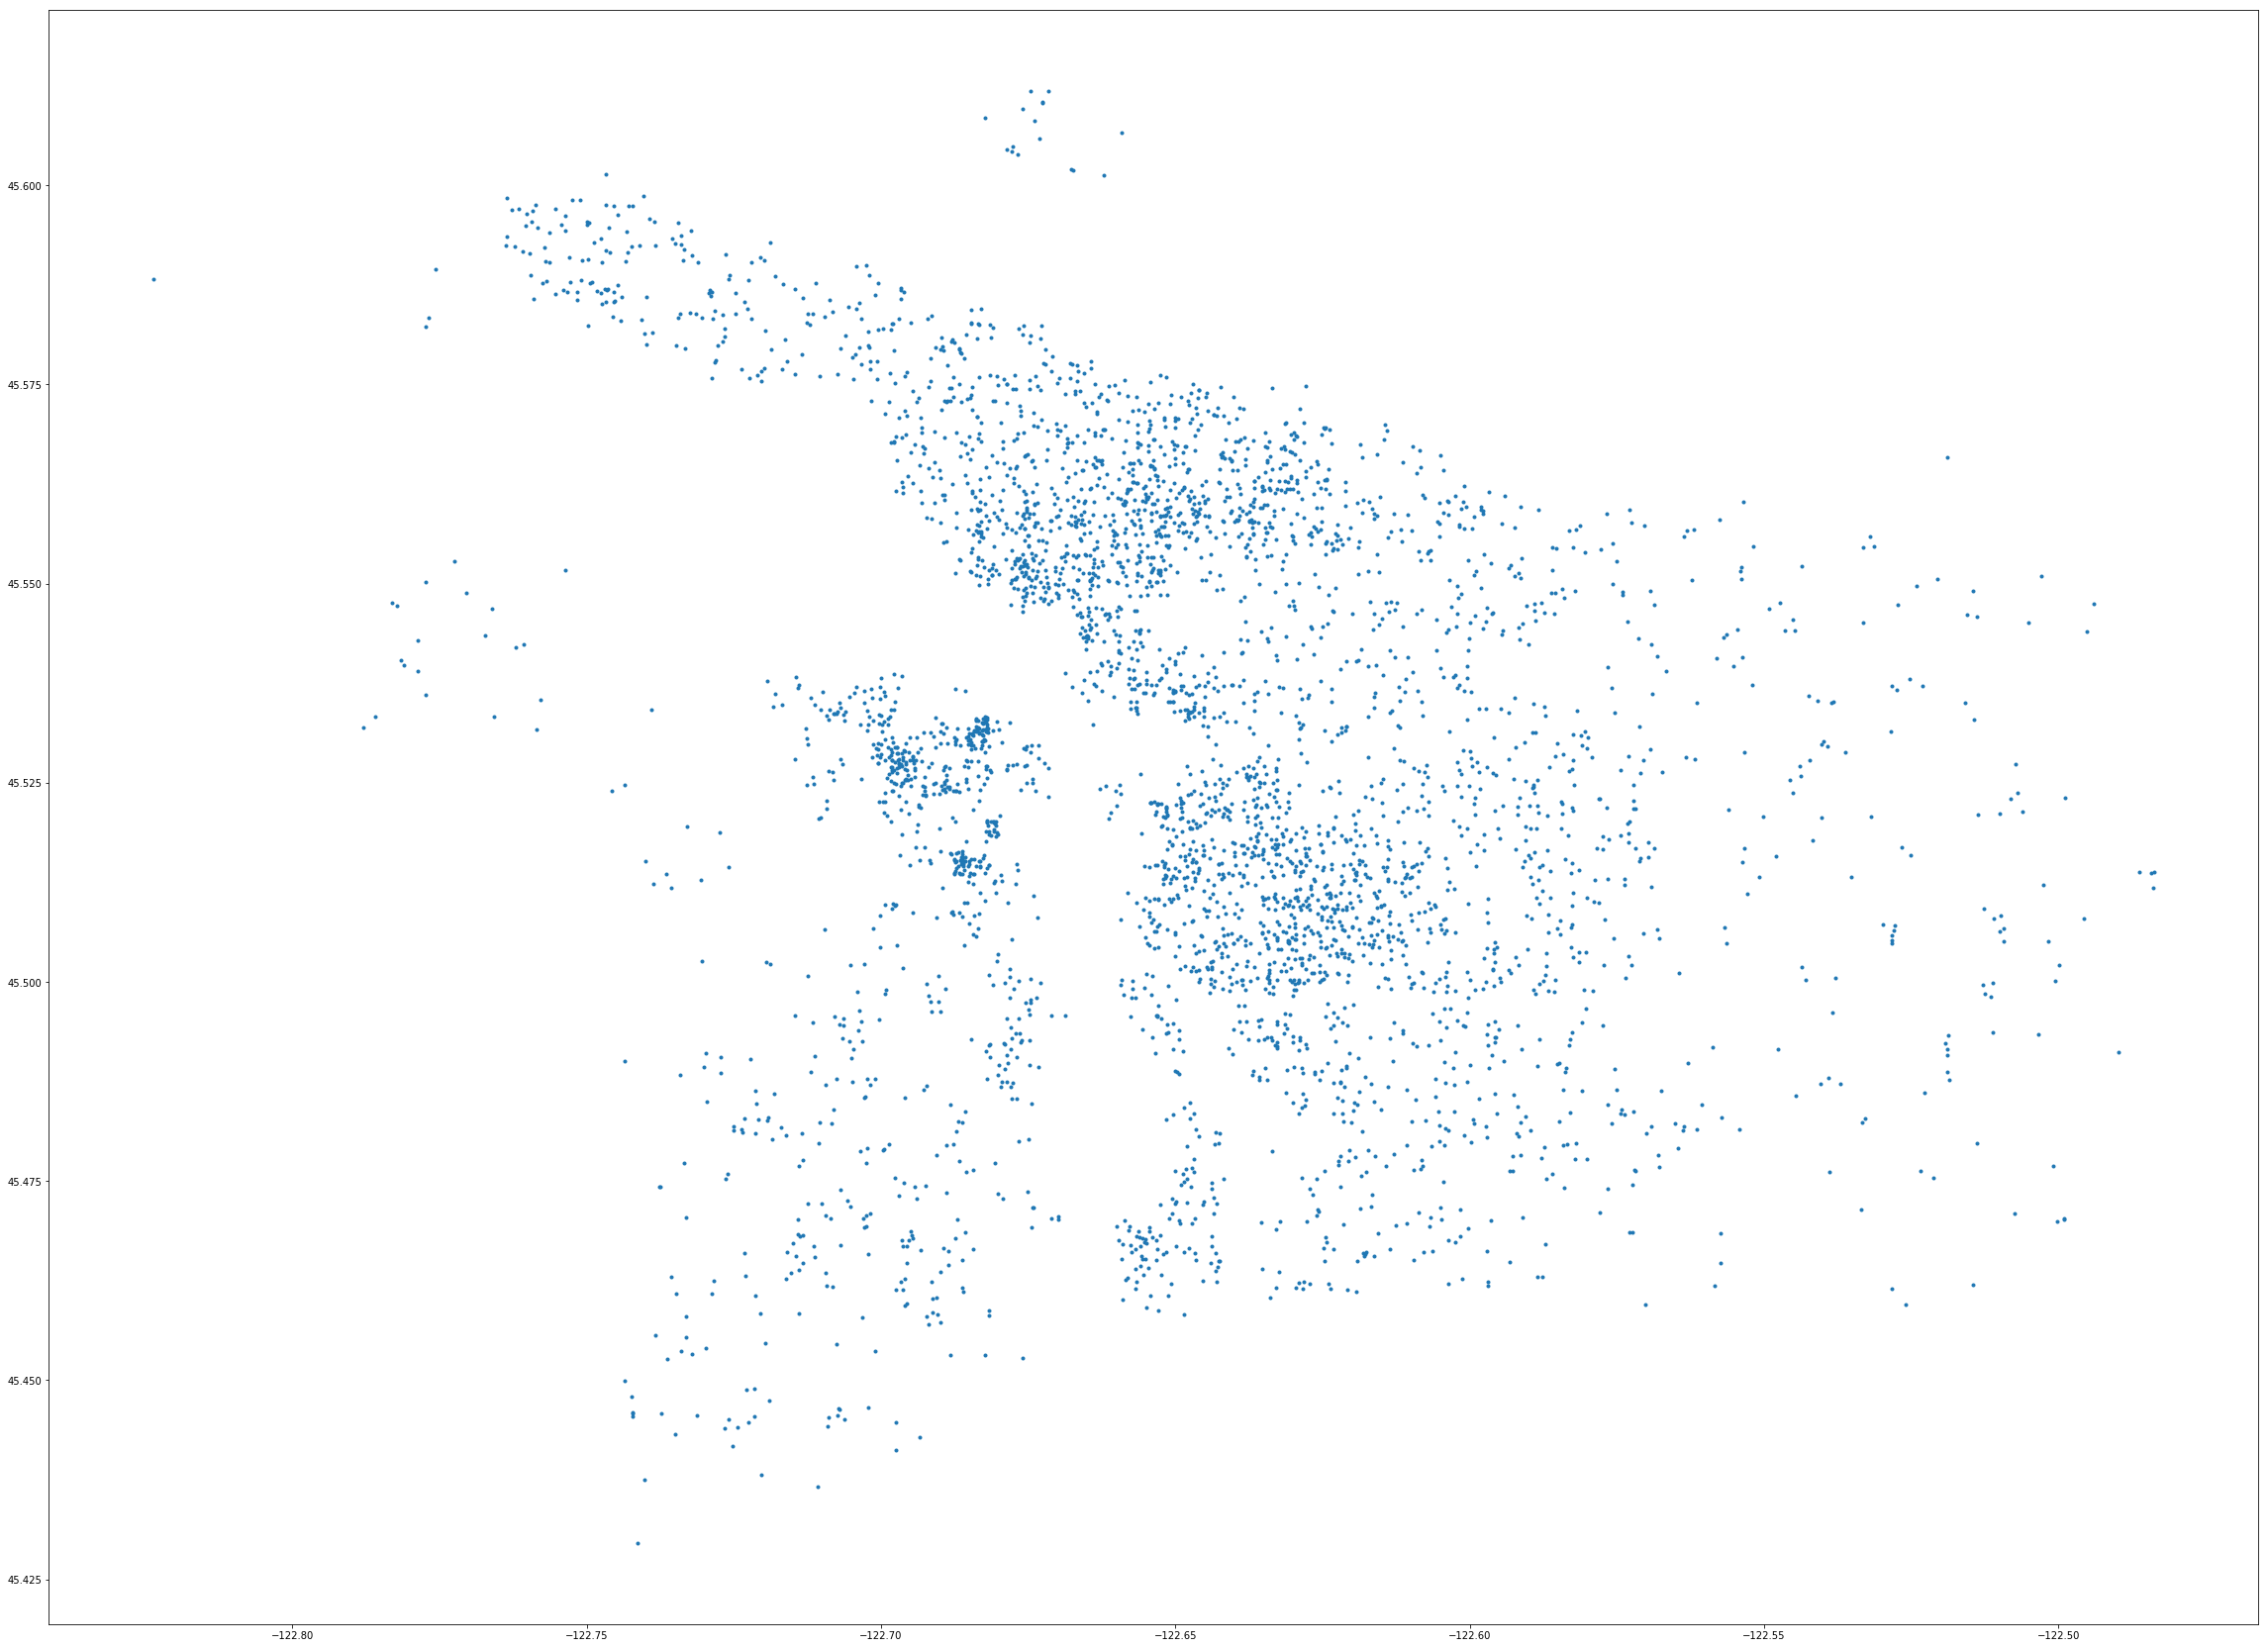

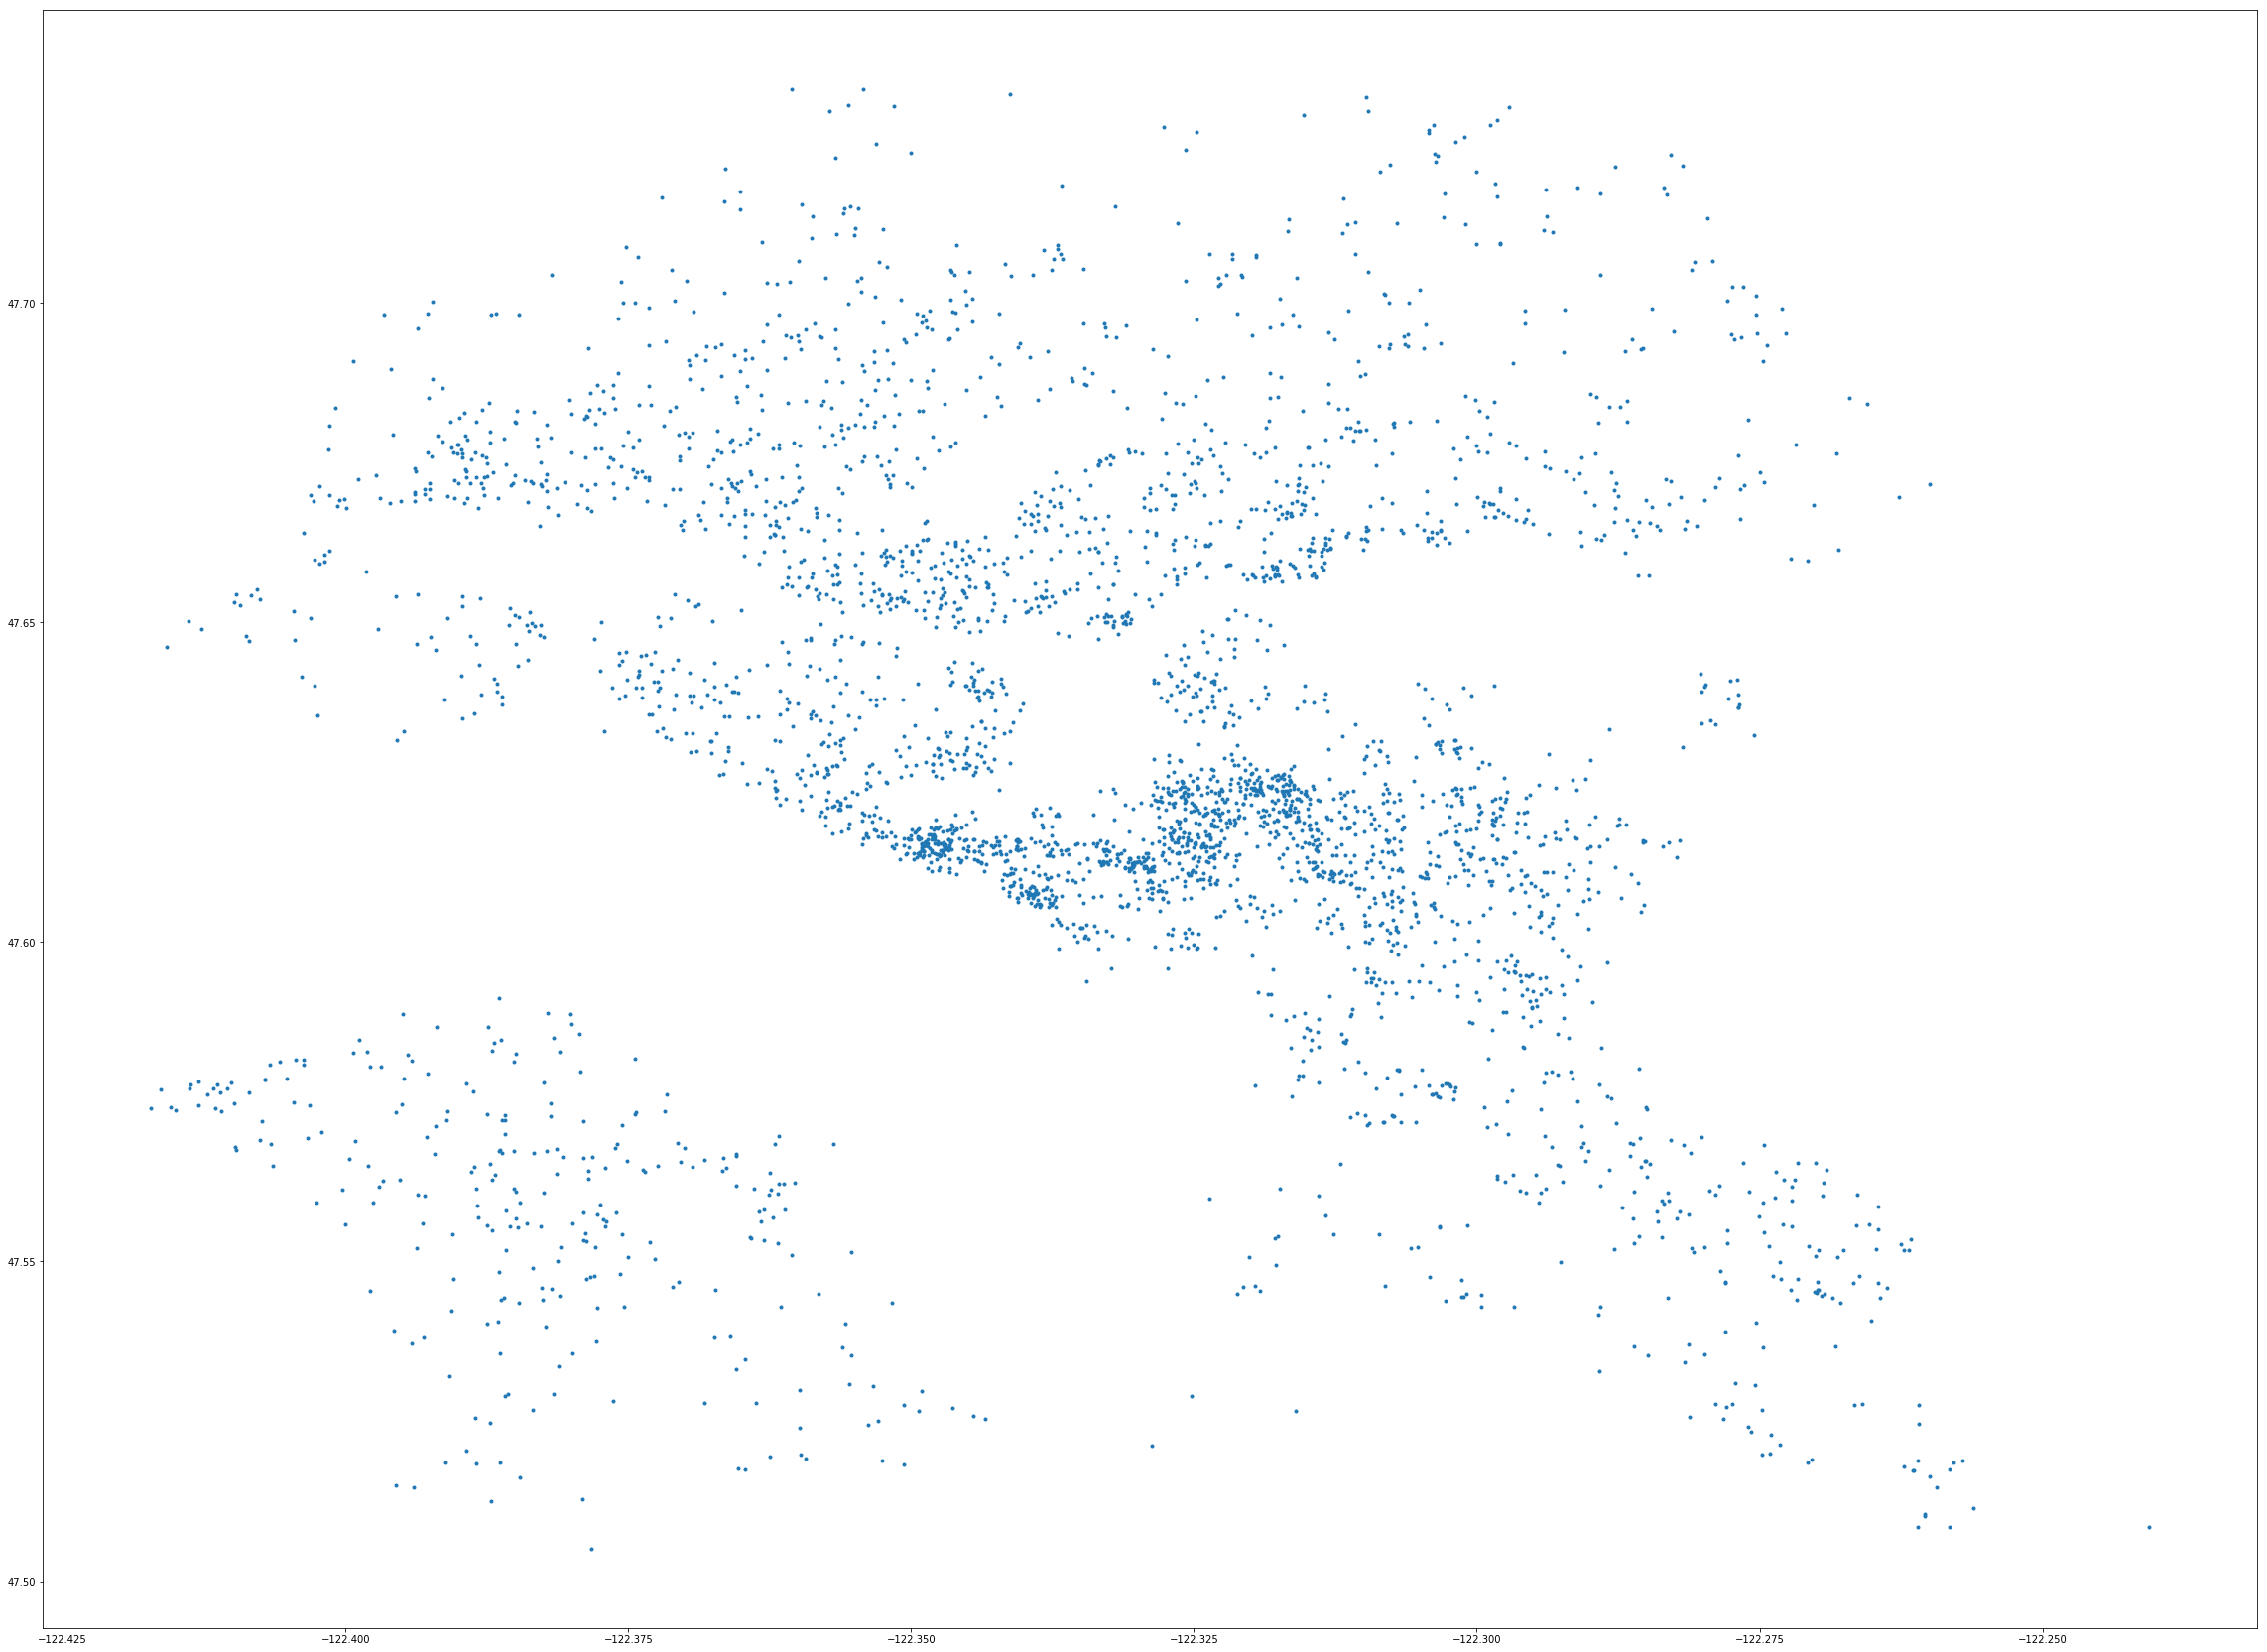

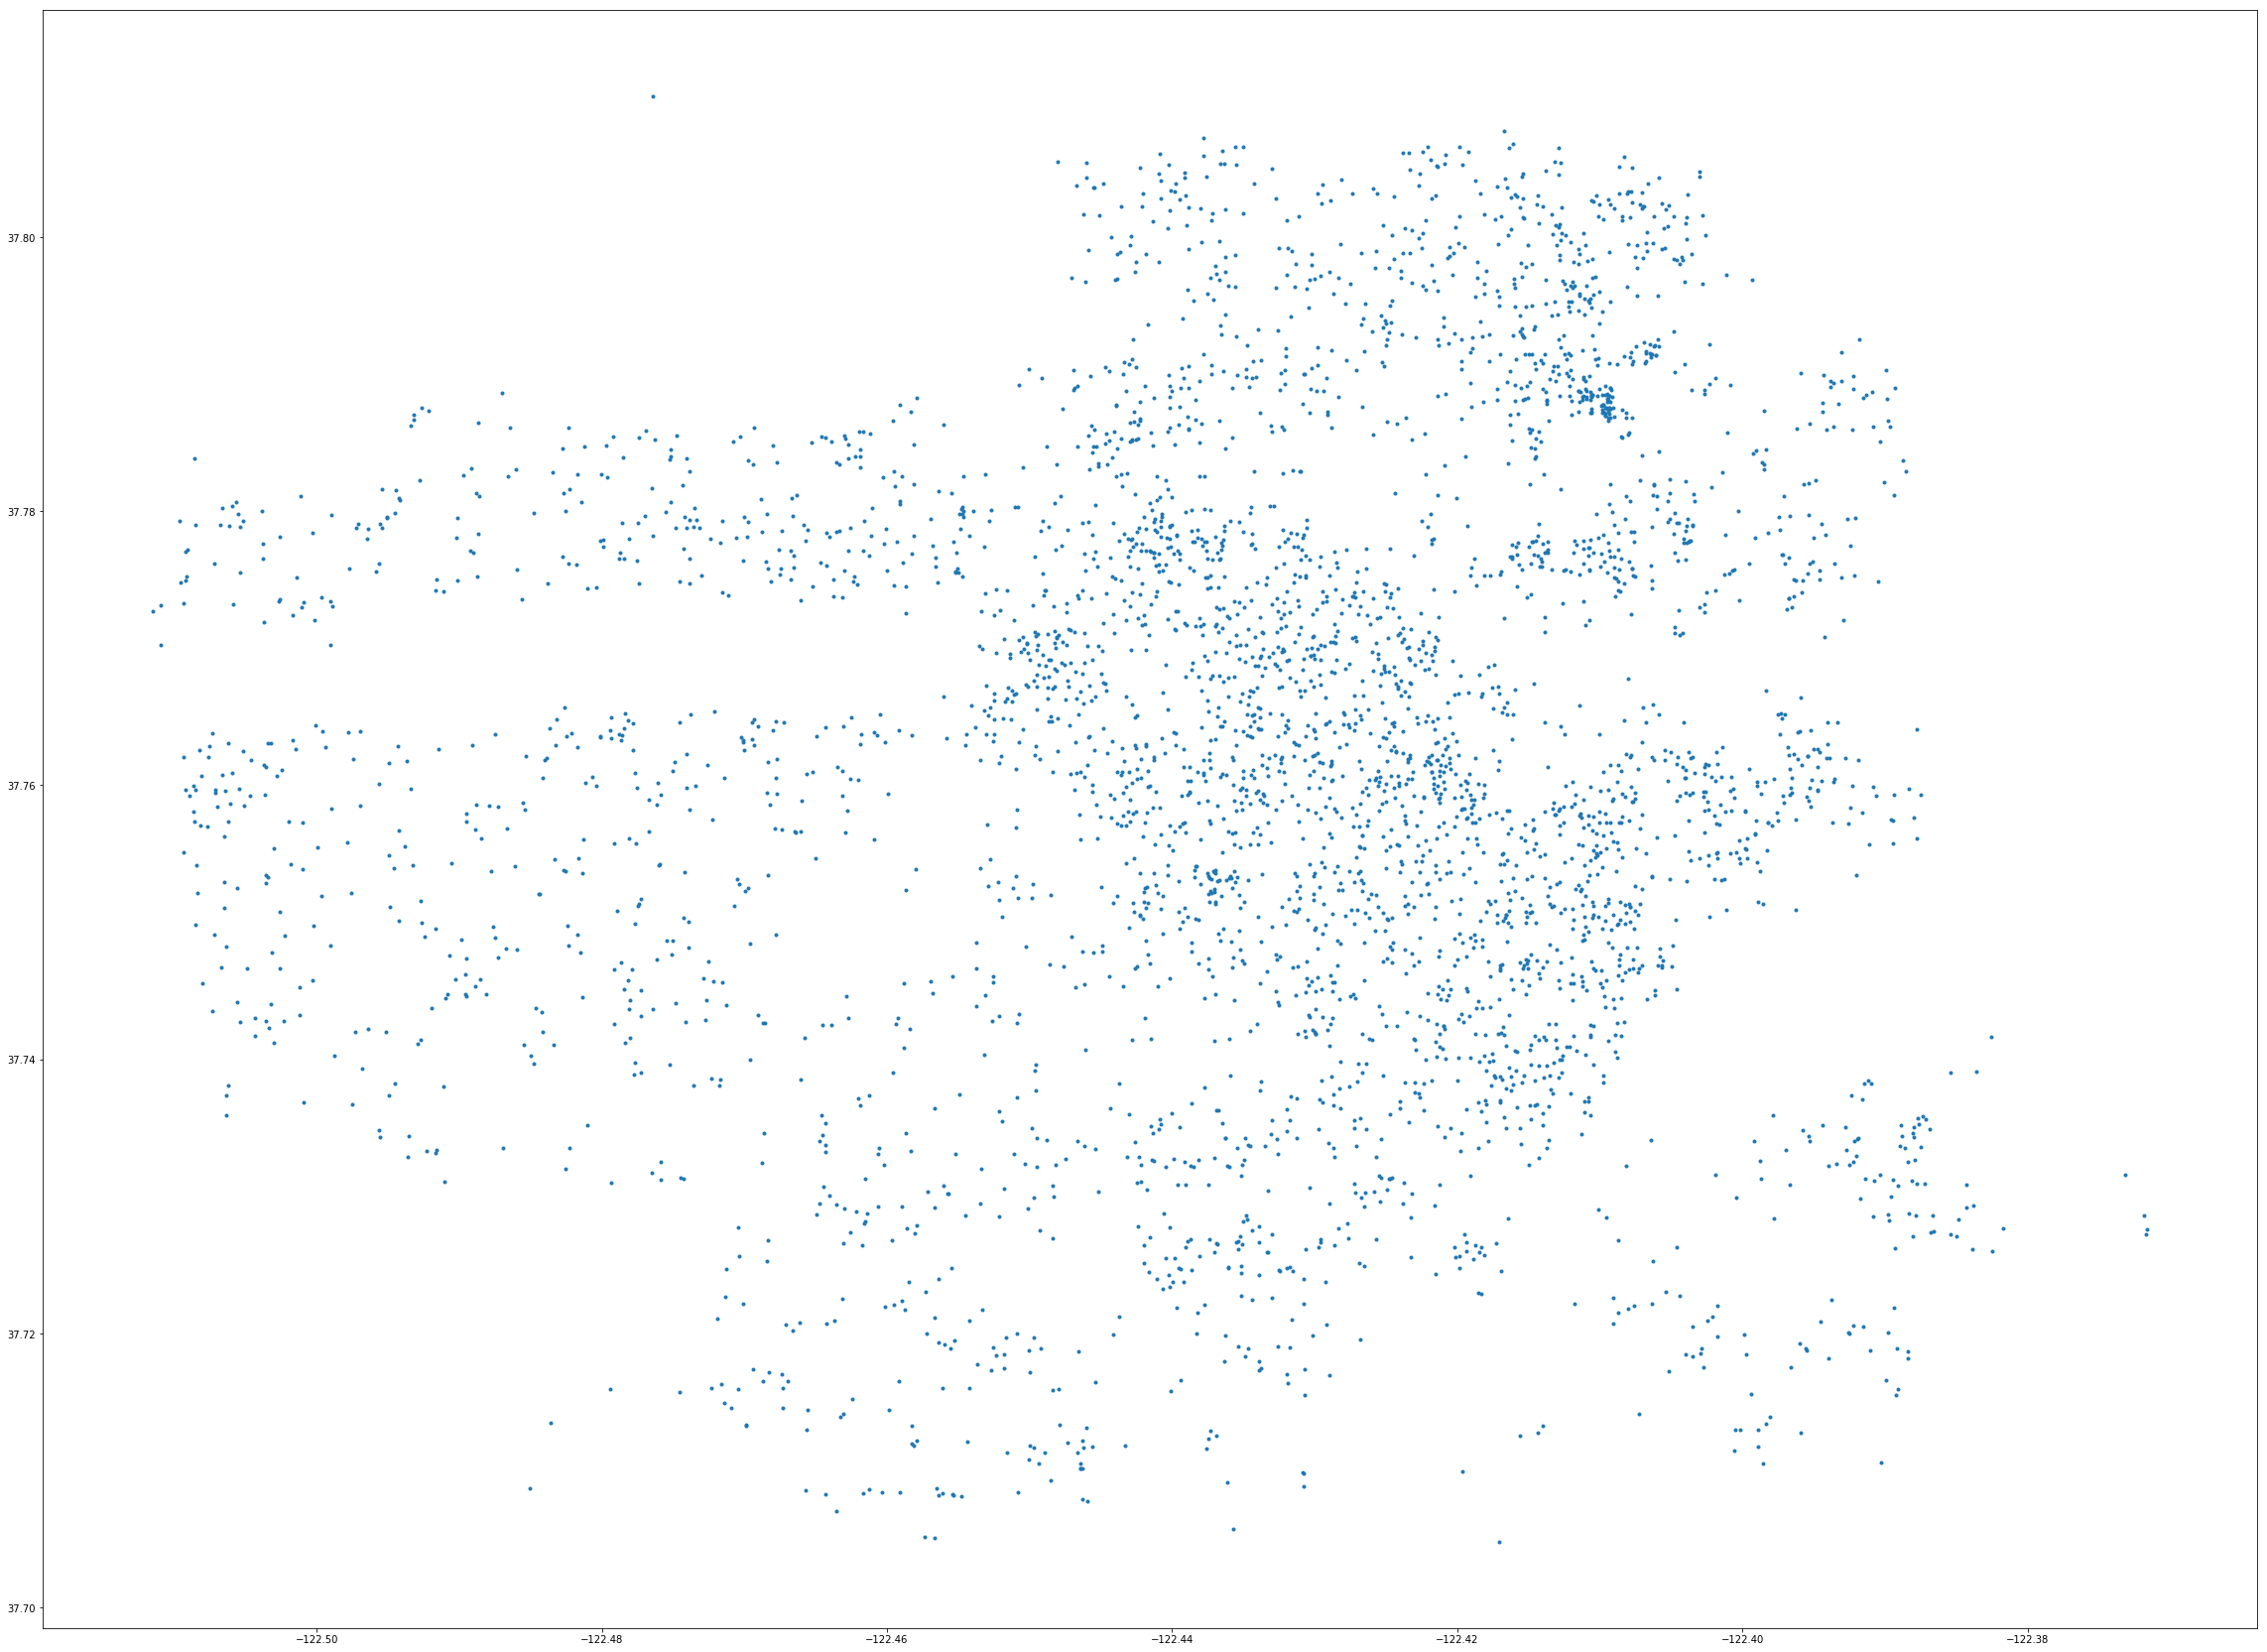

In [4]:
for item in dfl:
    lat = np.array(item.latitude)
    lon = np.array(item.longitude)
    plt.figure(figsize = (40,30))
    plt.scatter(lon, lat, marker = '.');

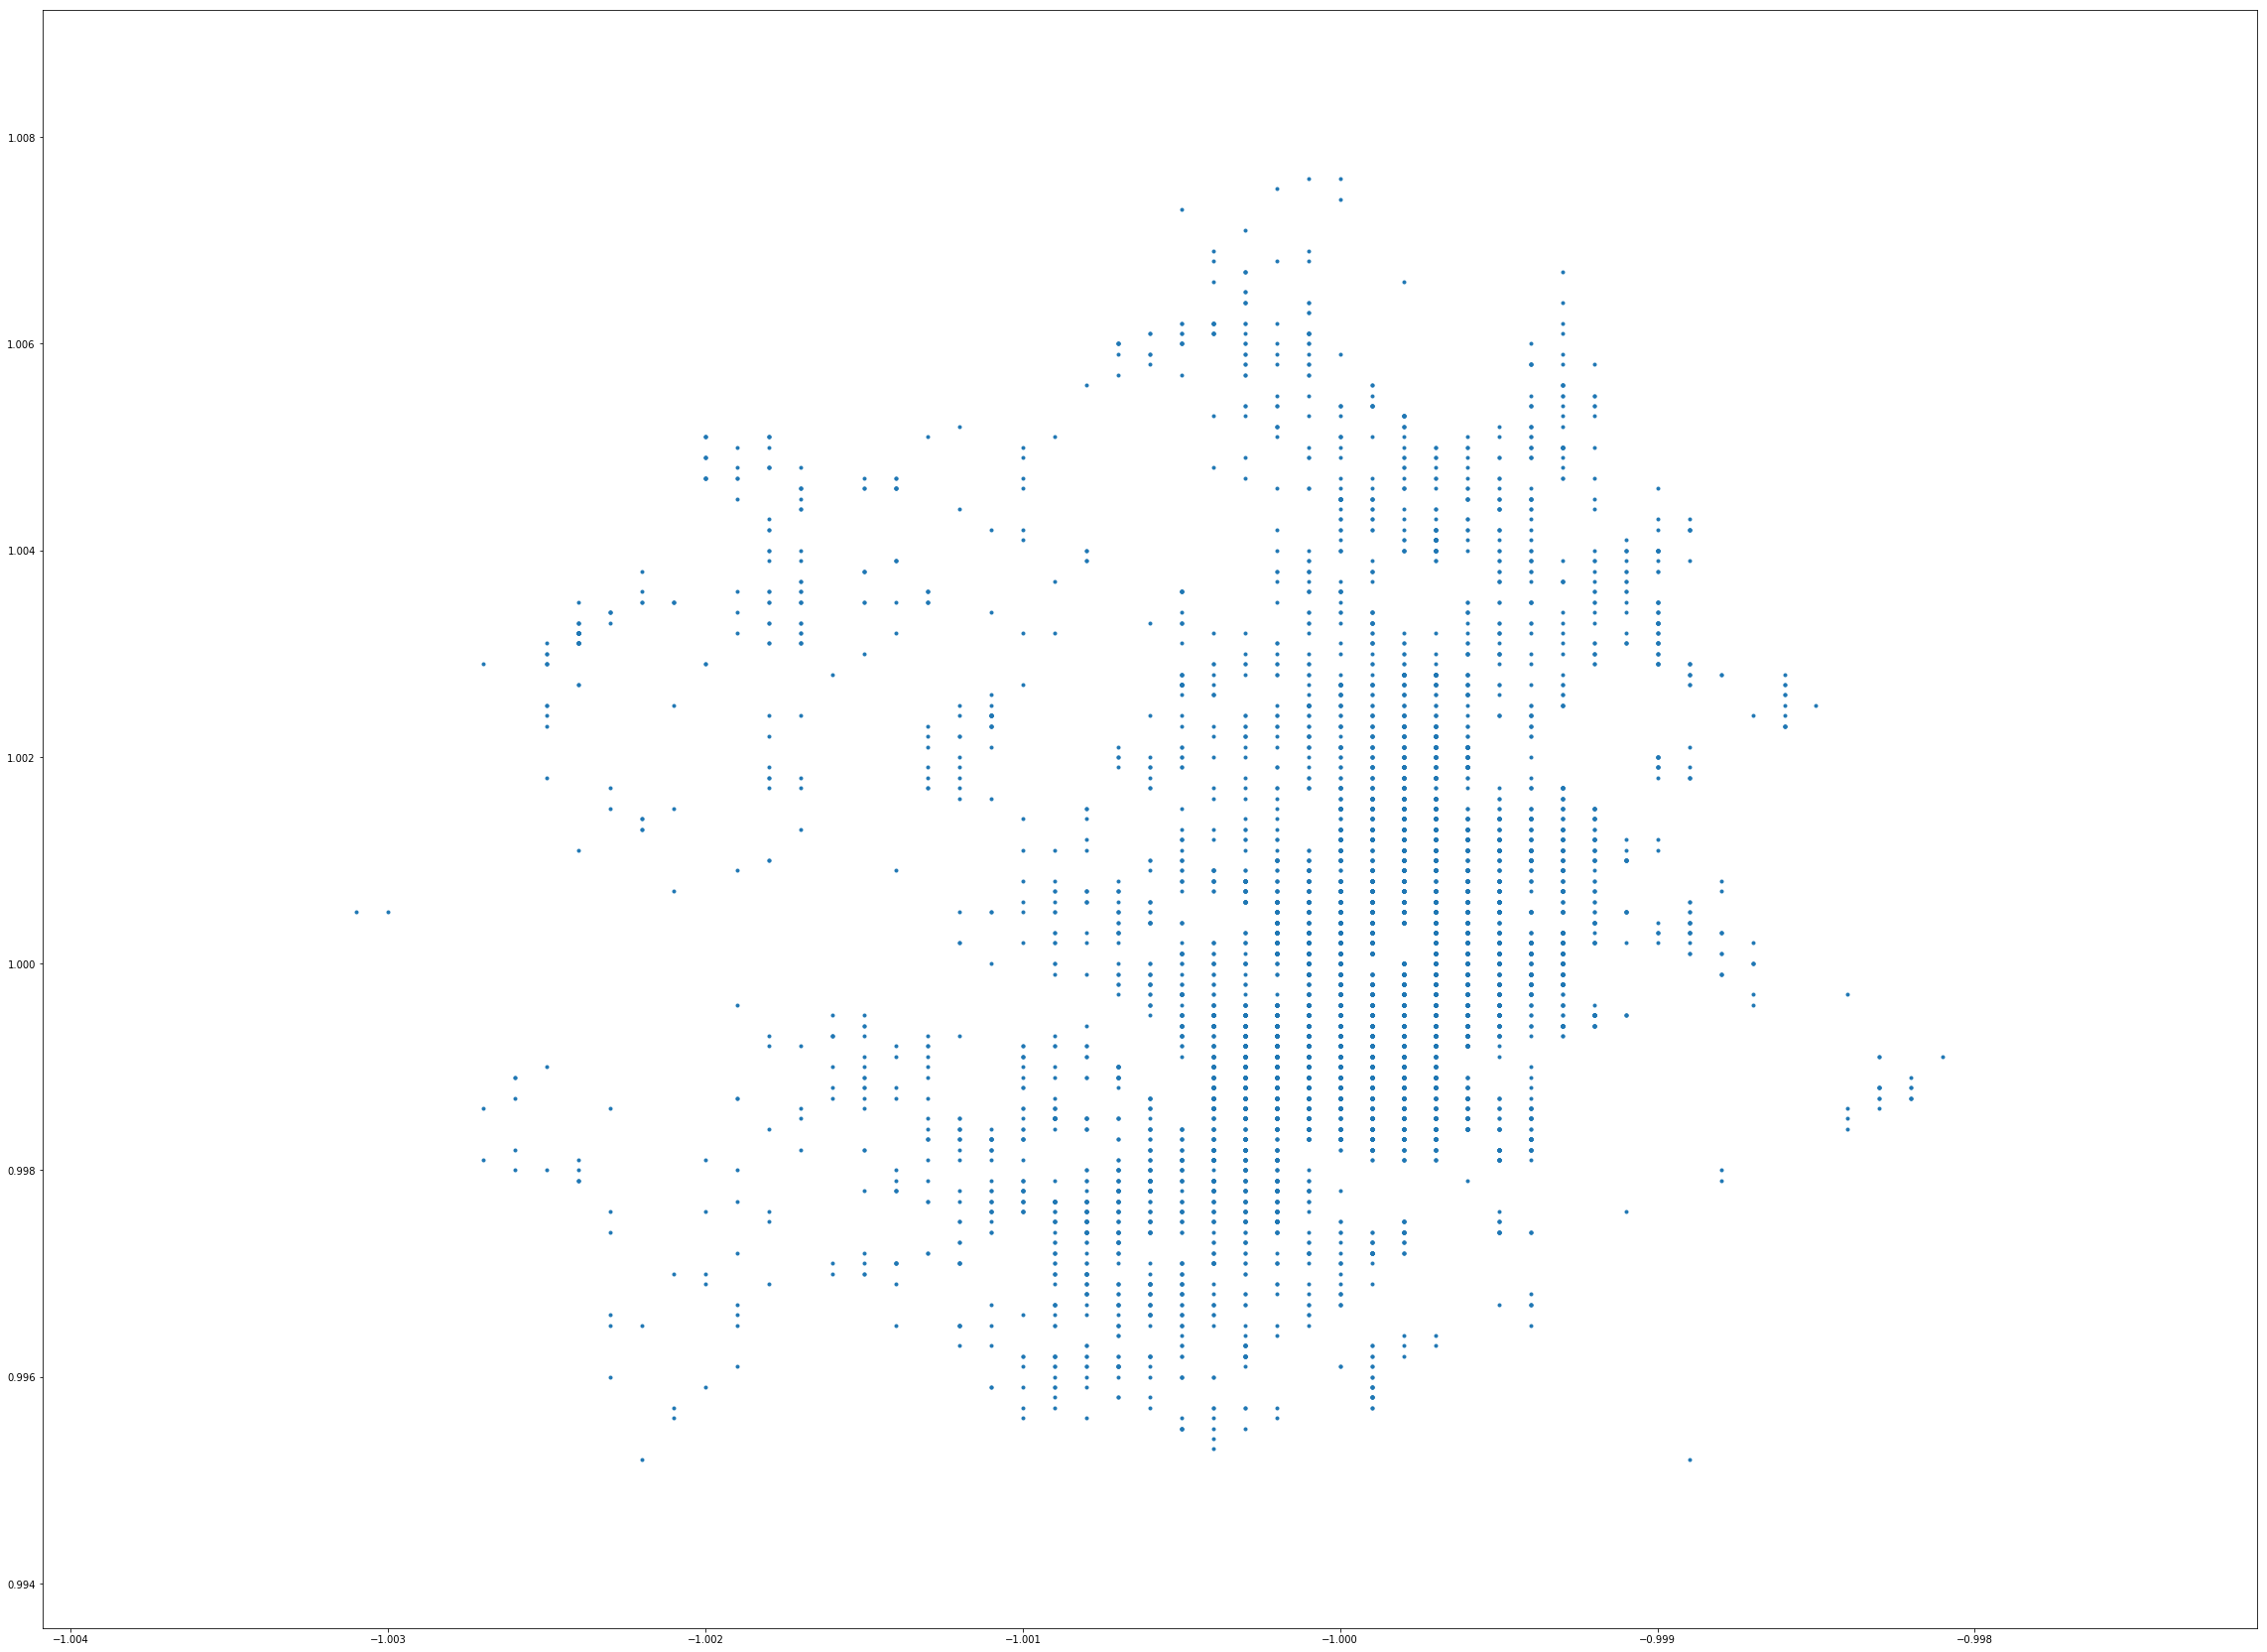

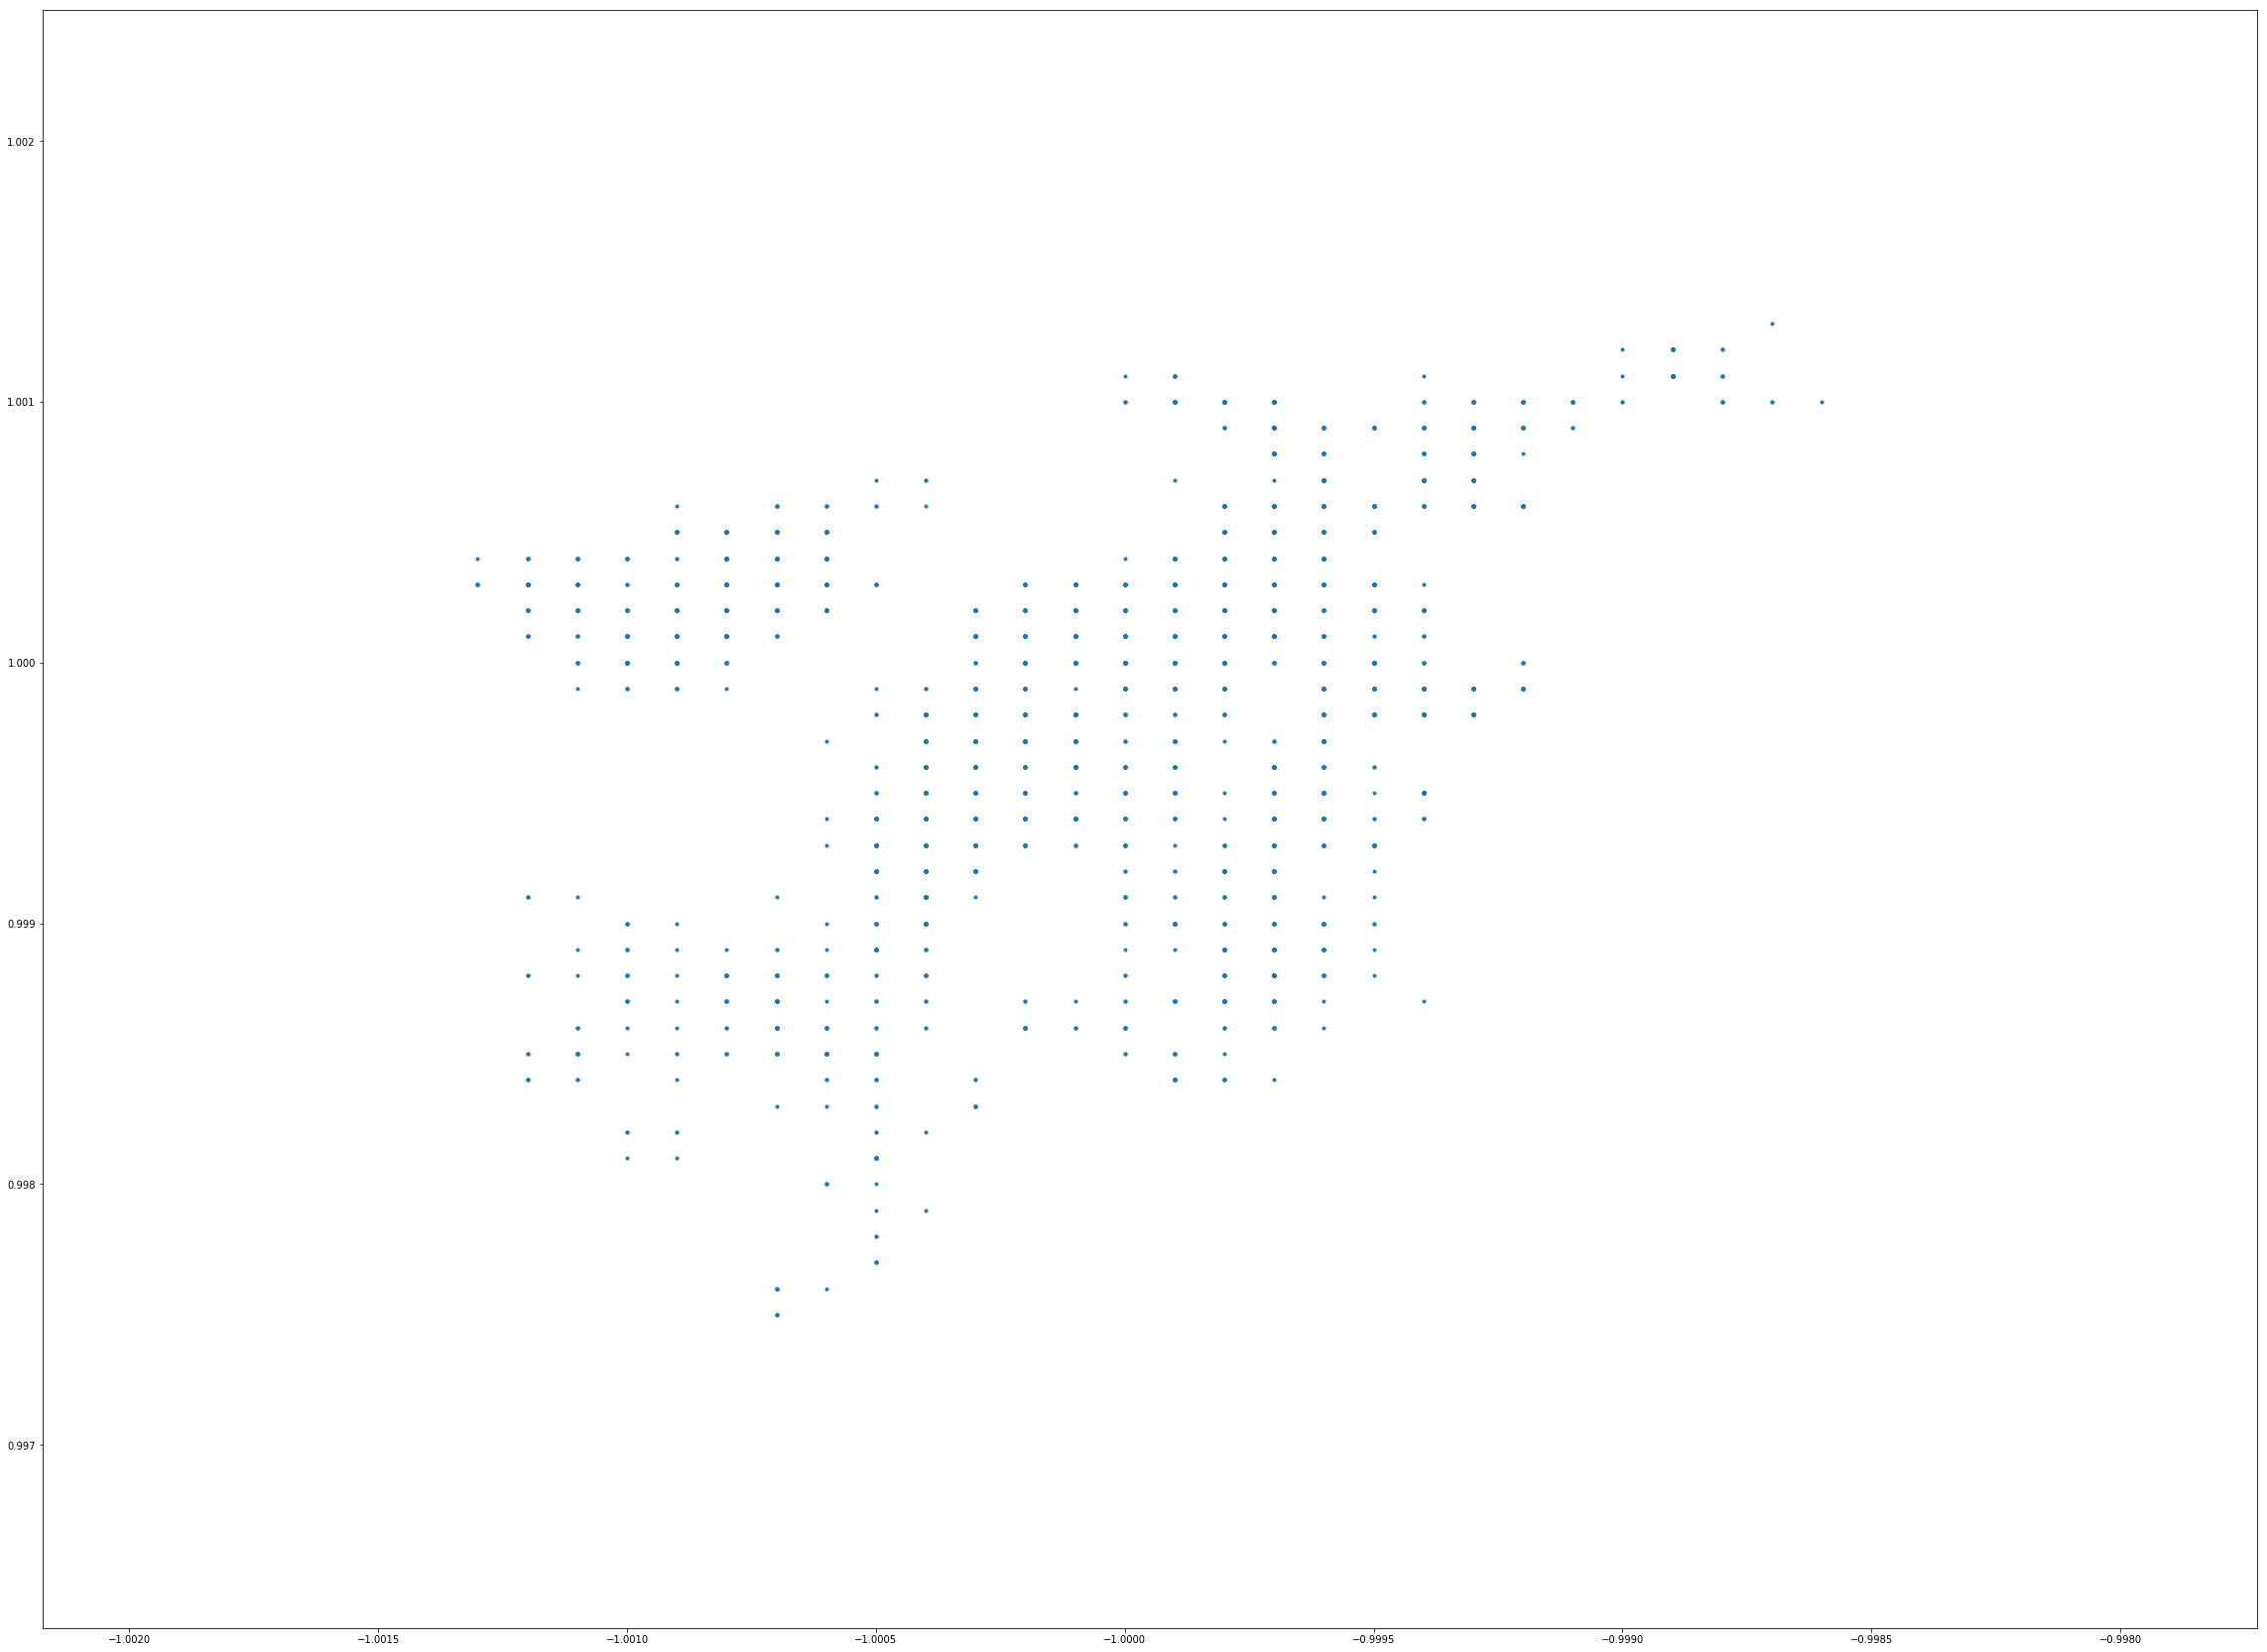

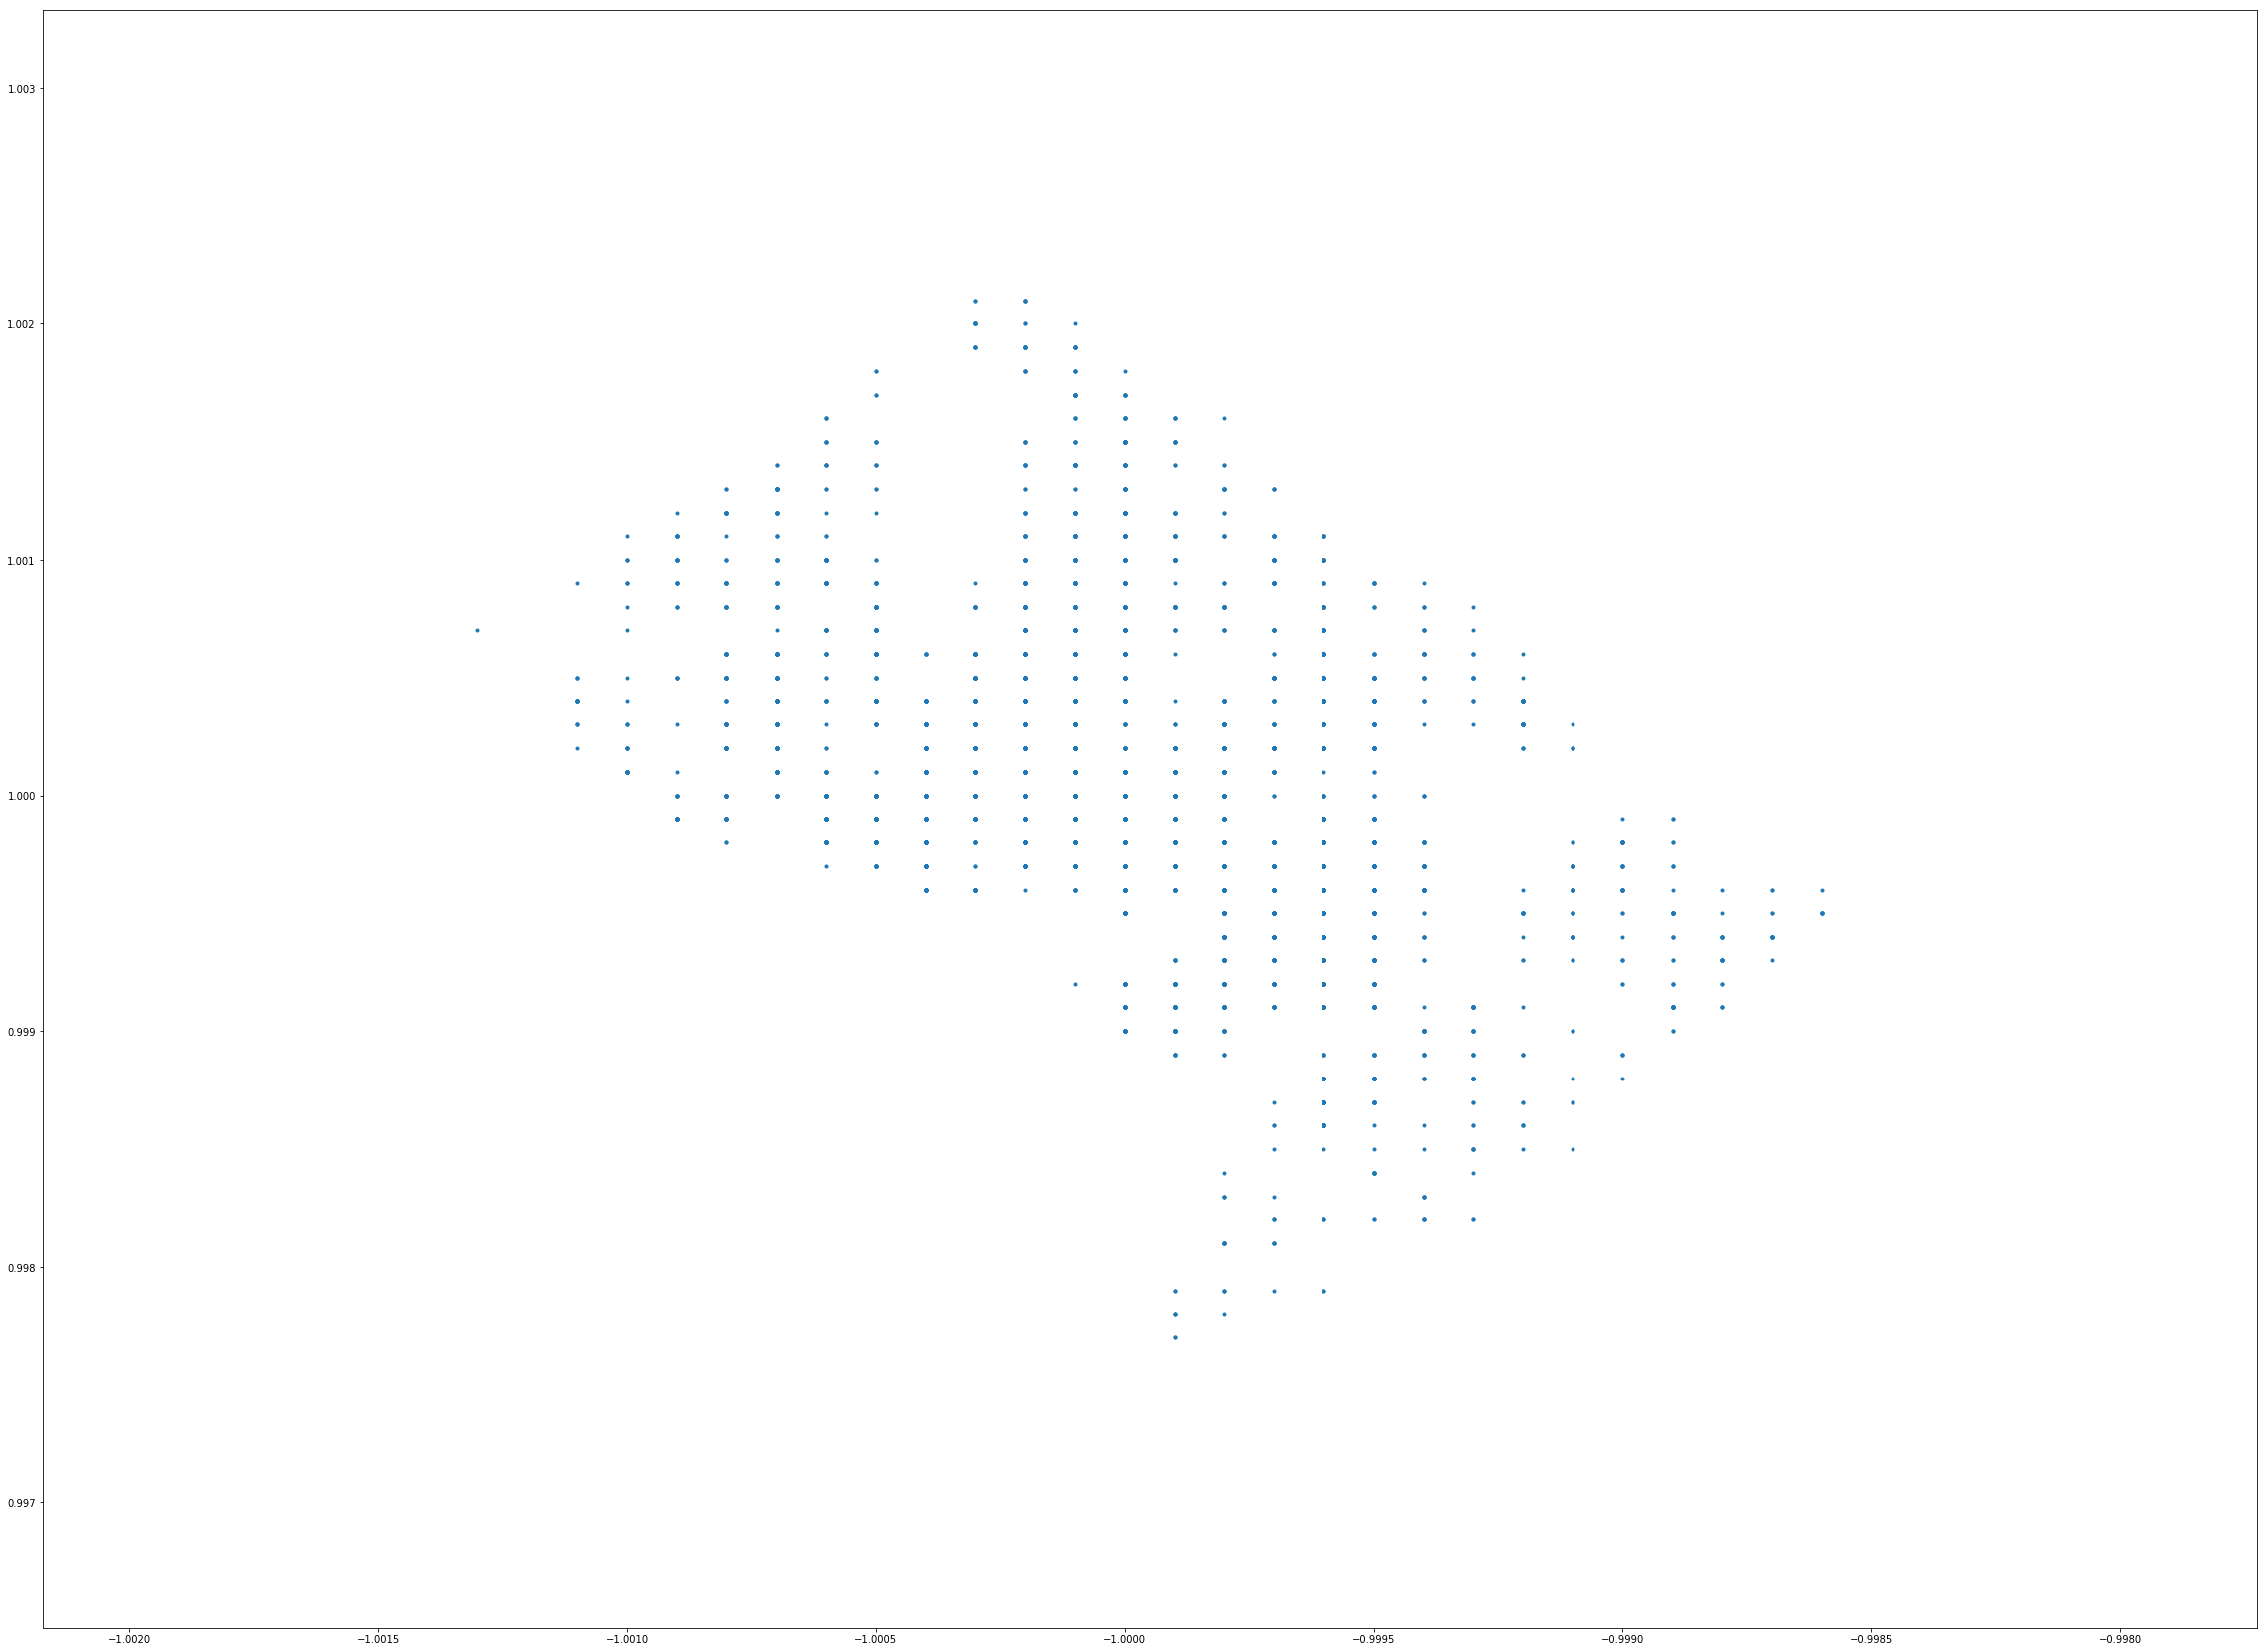

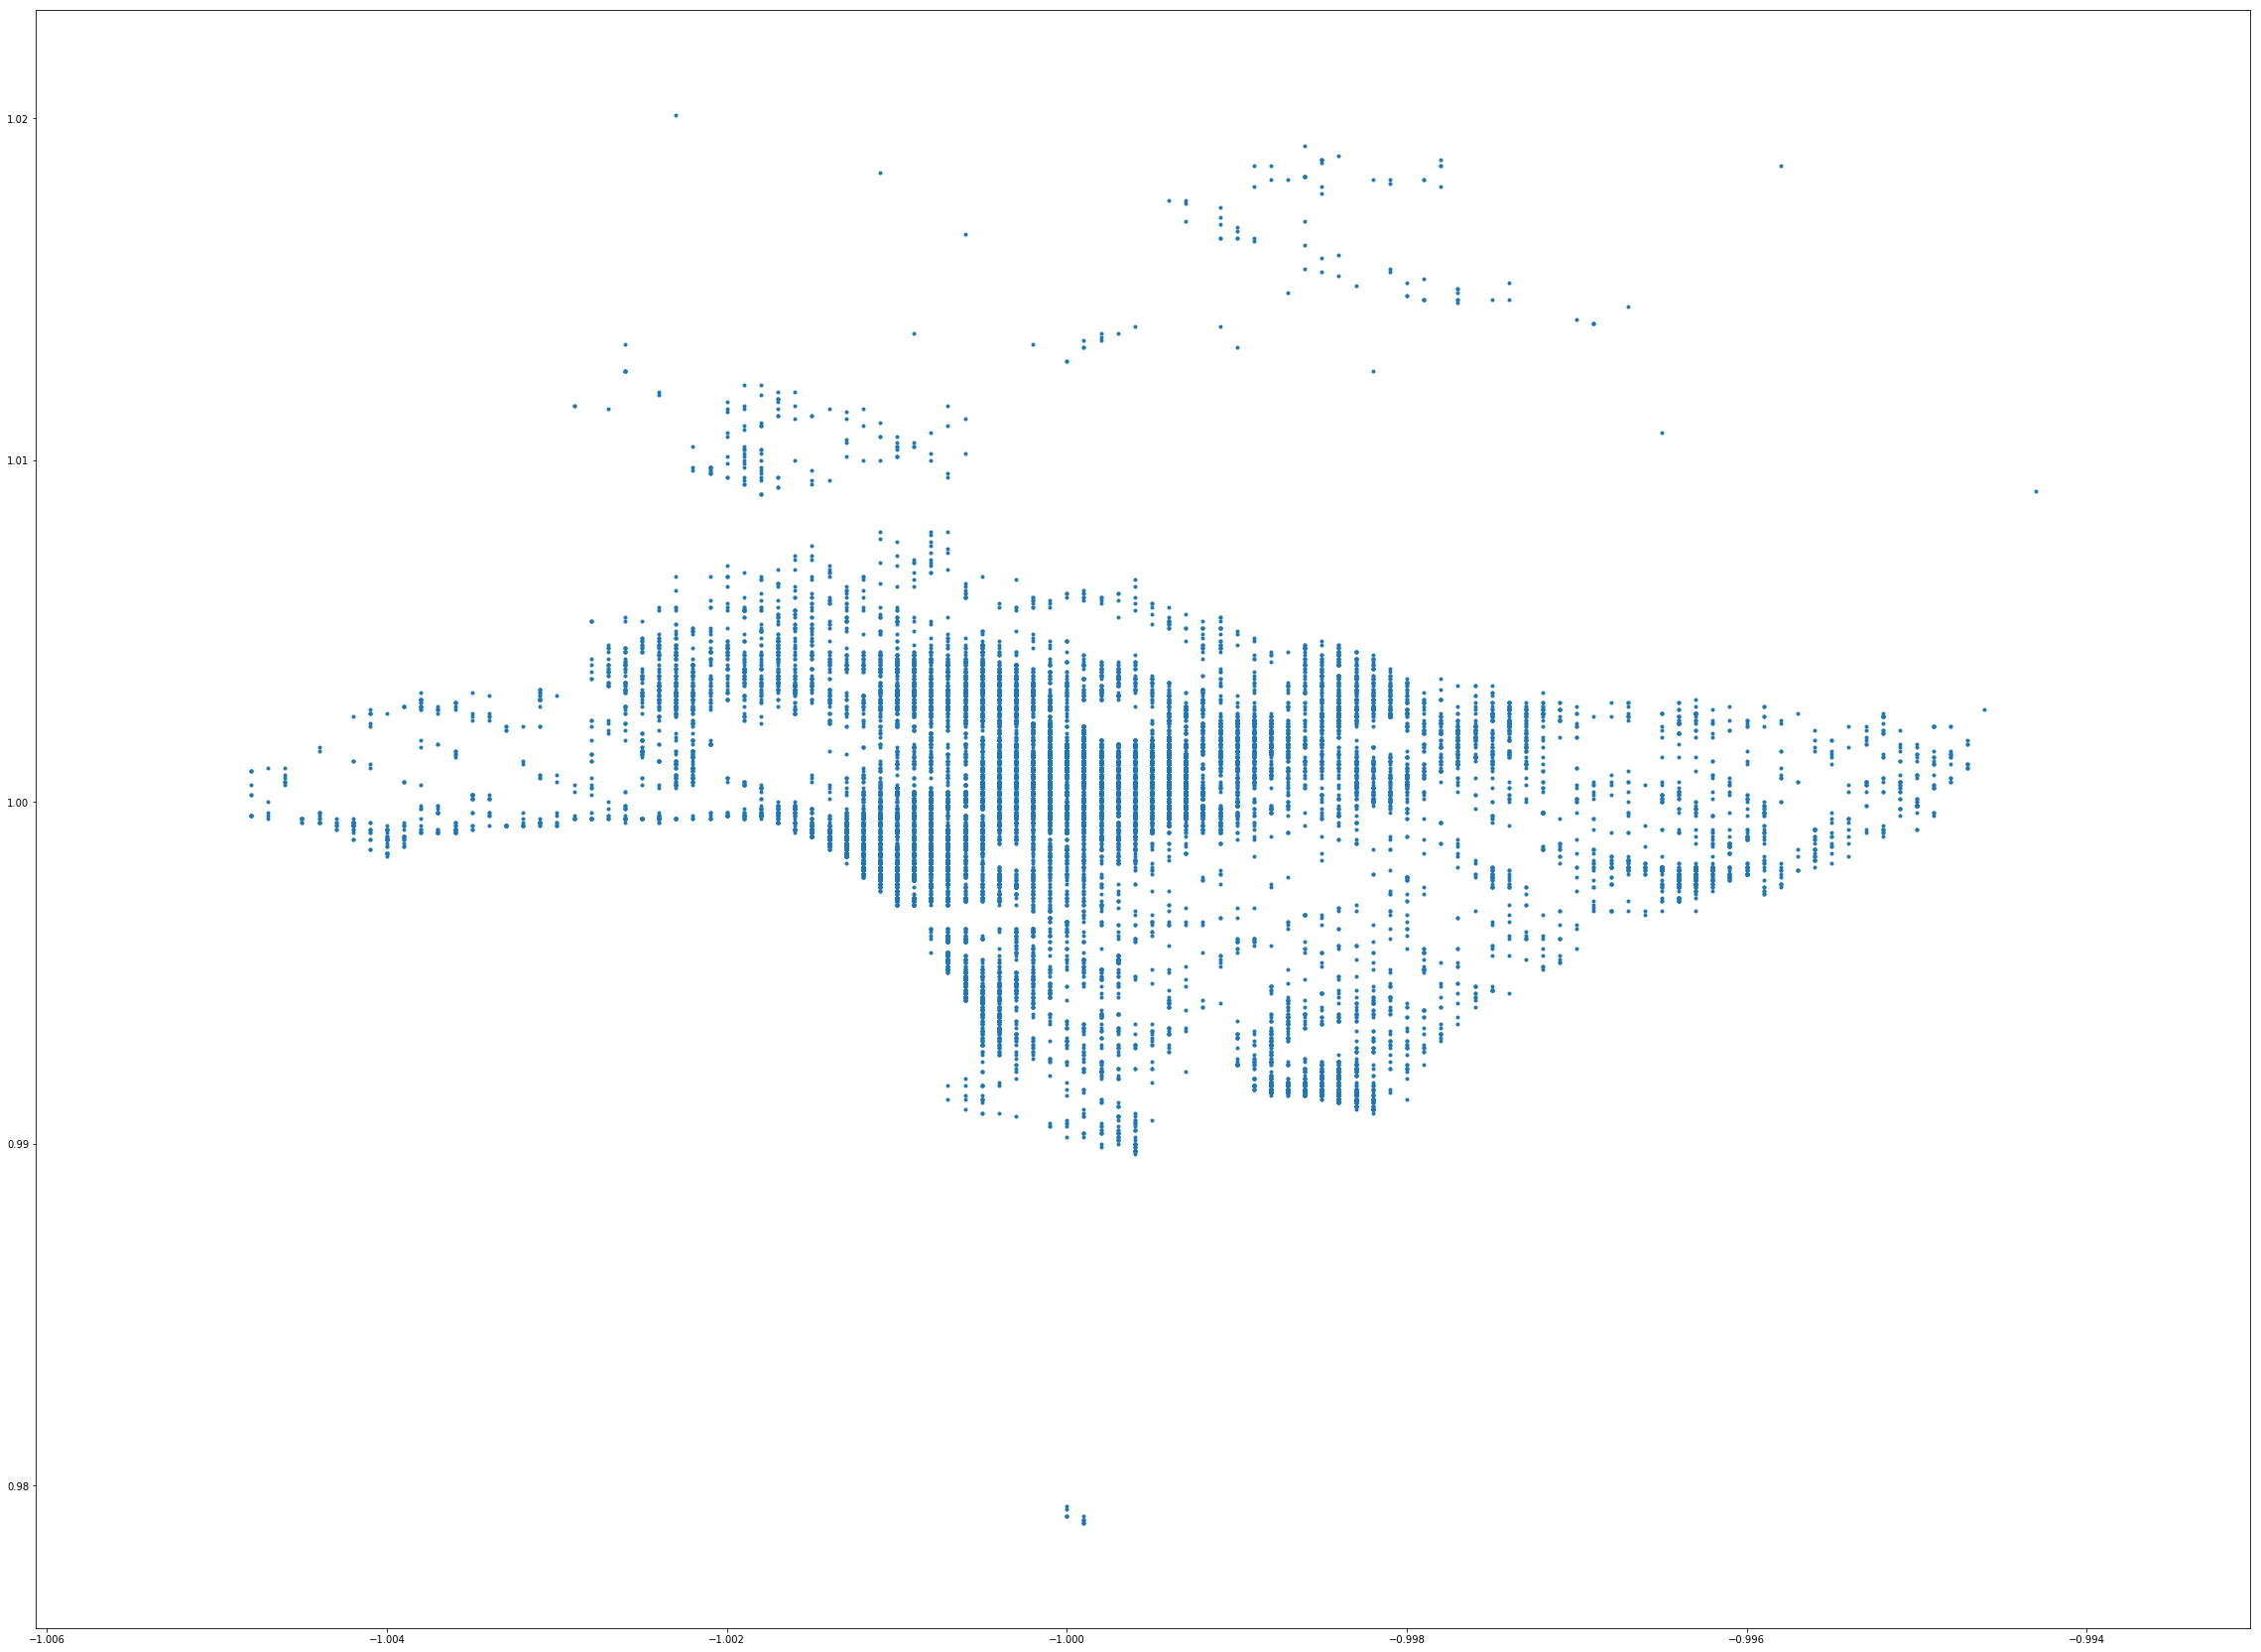

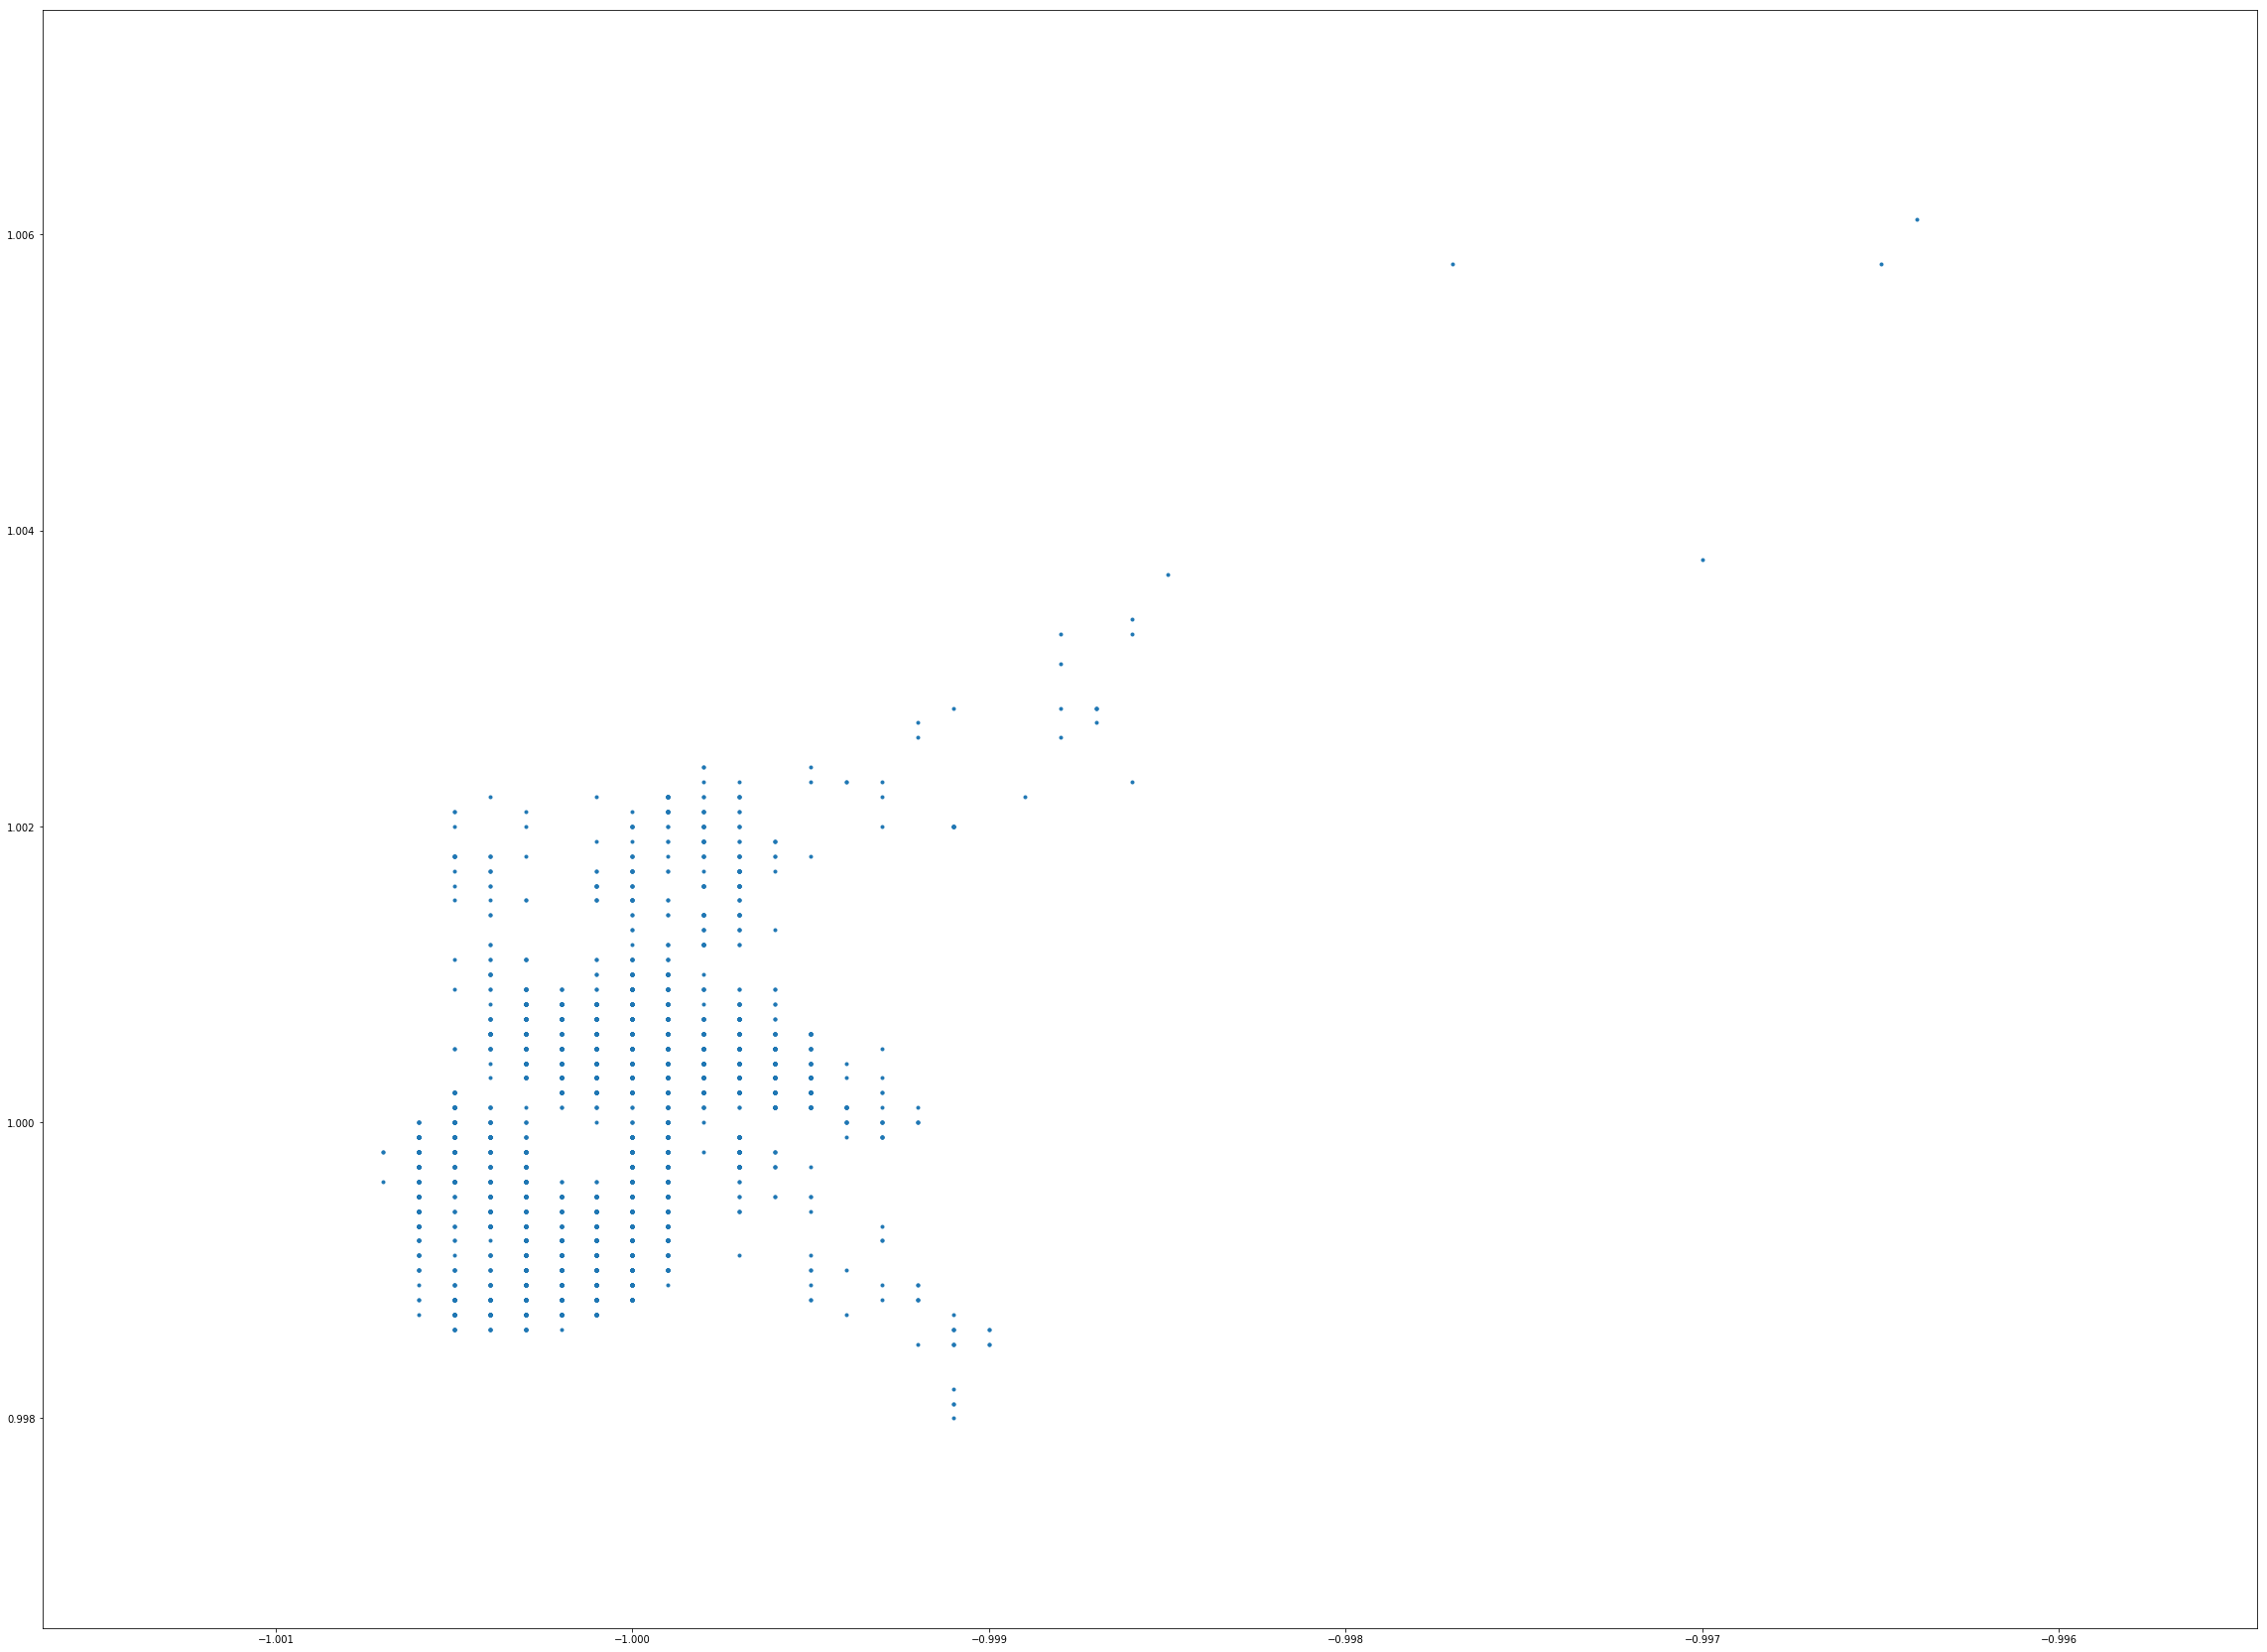

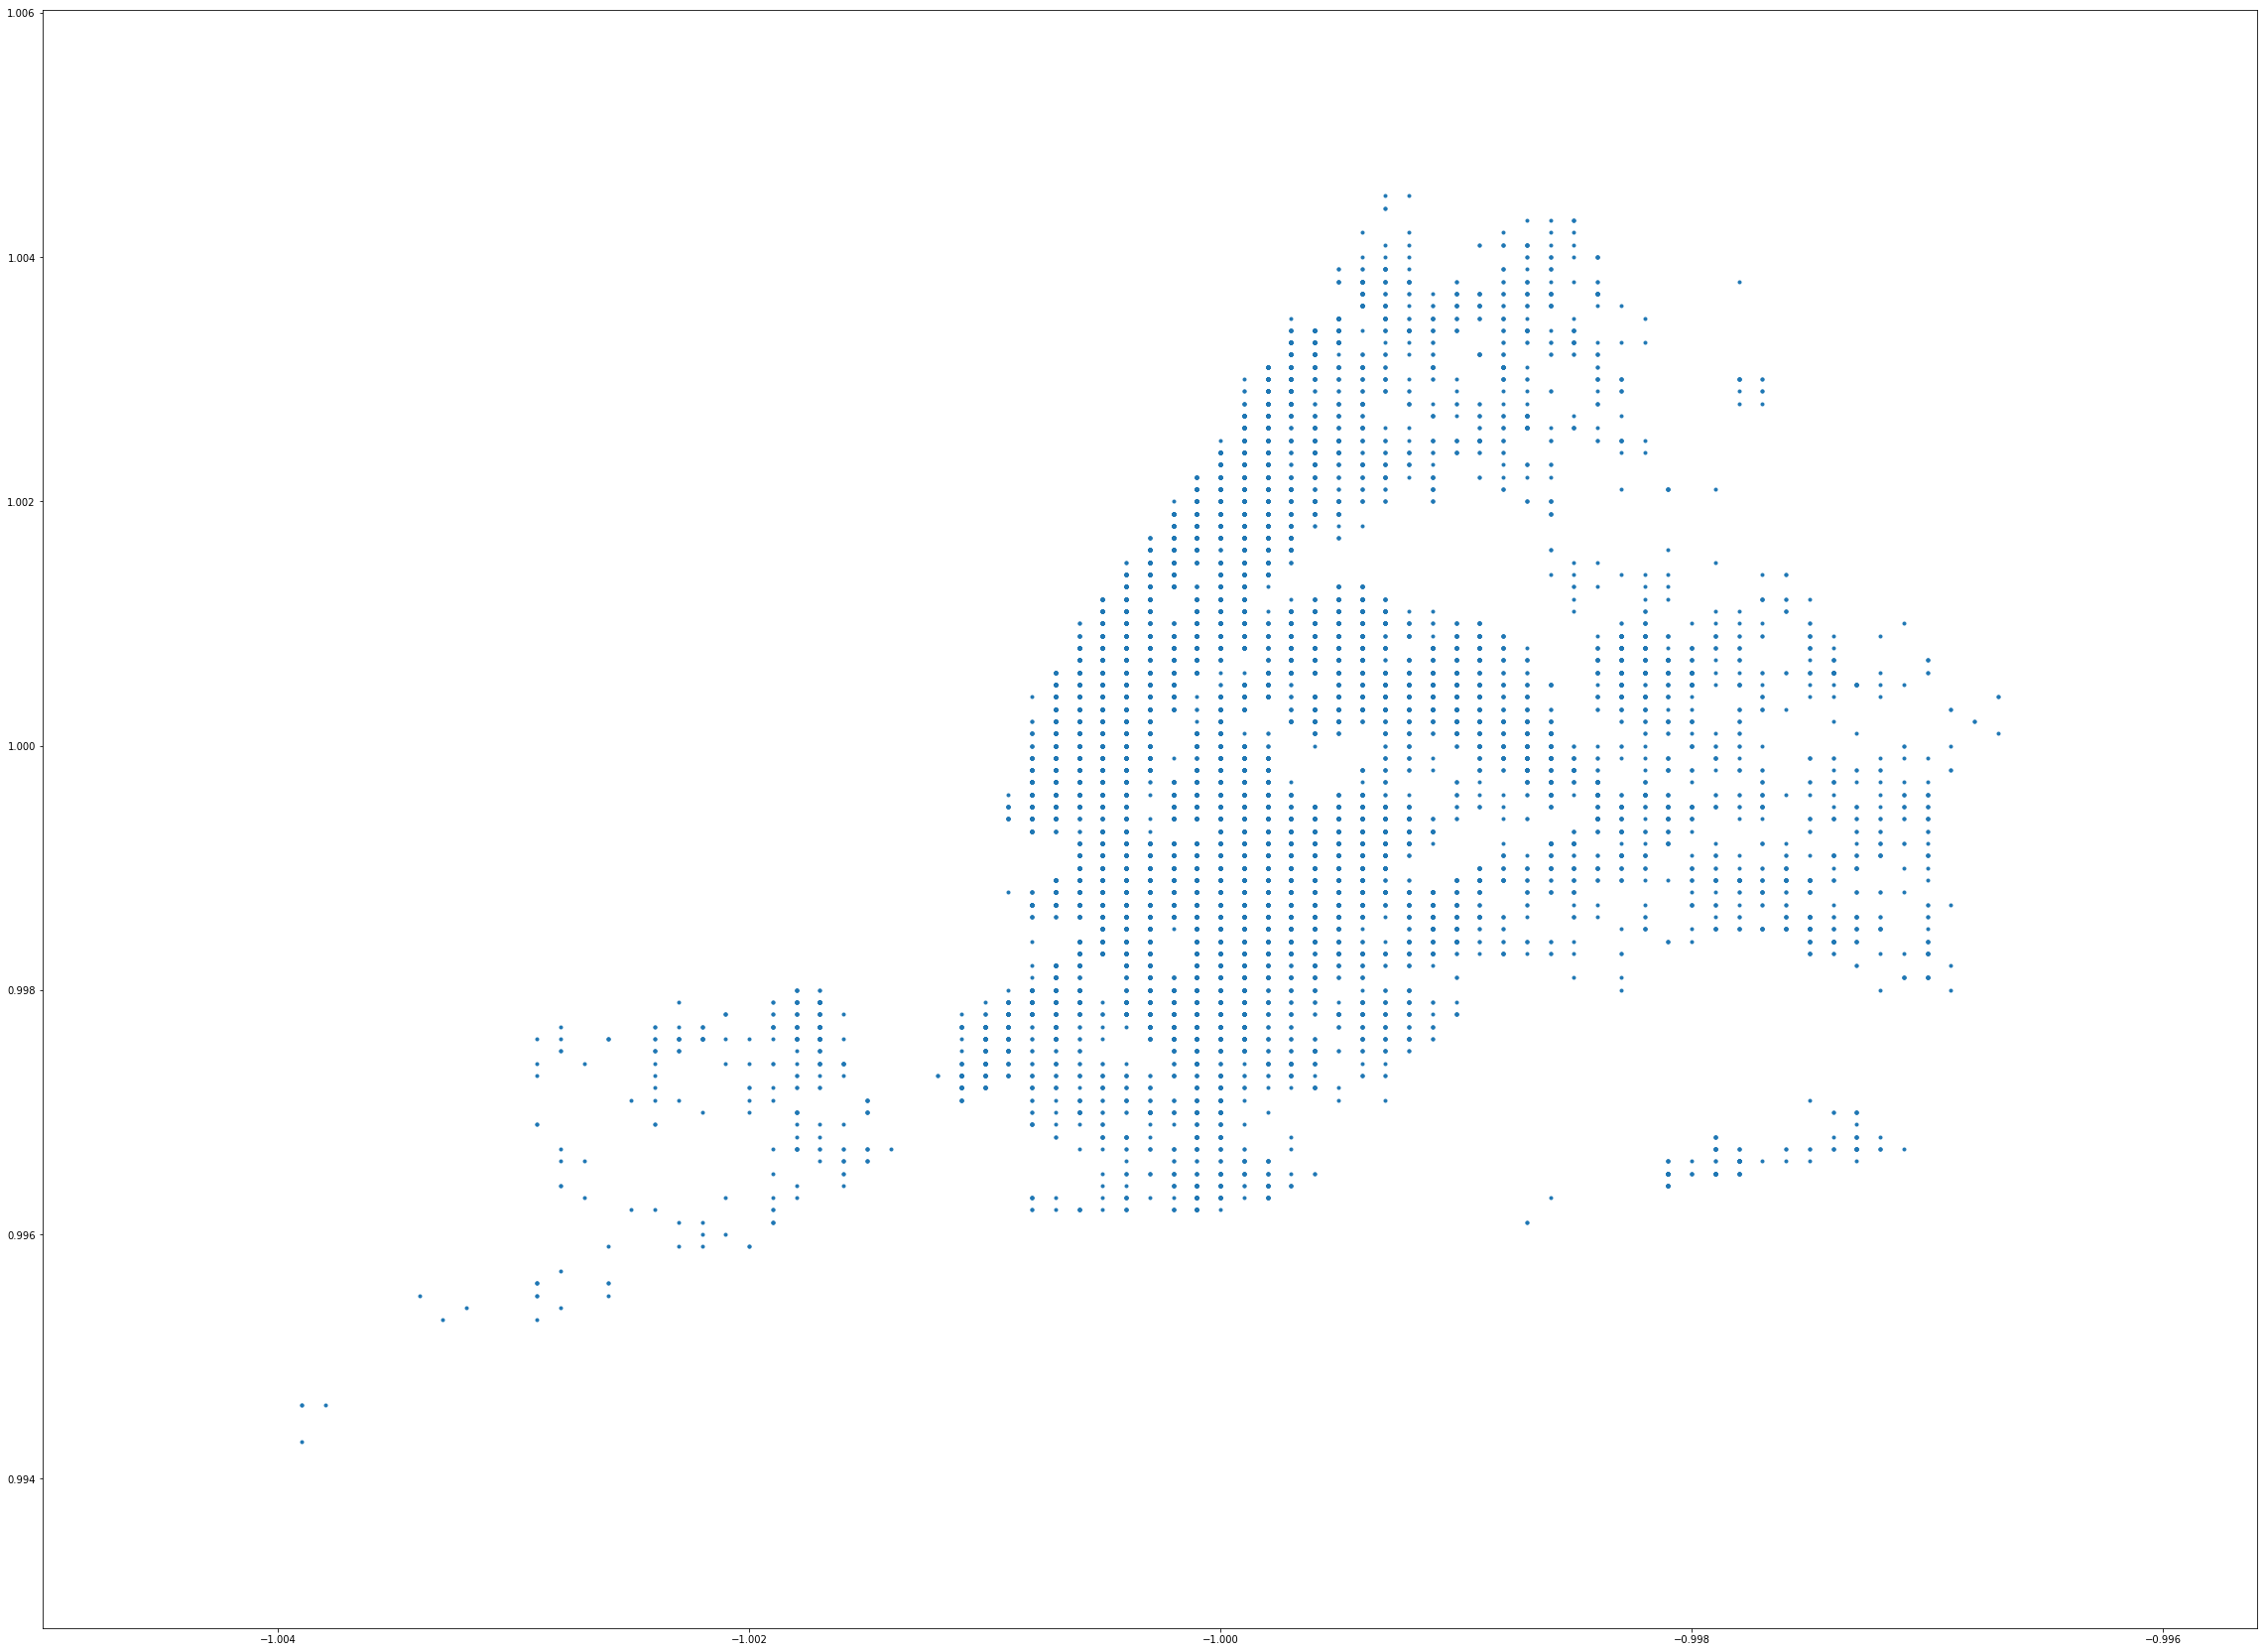

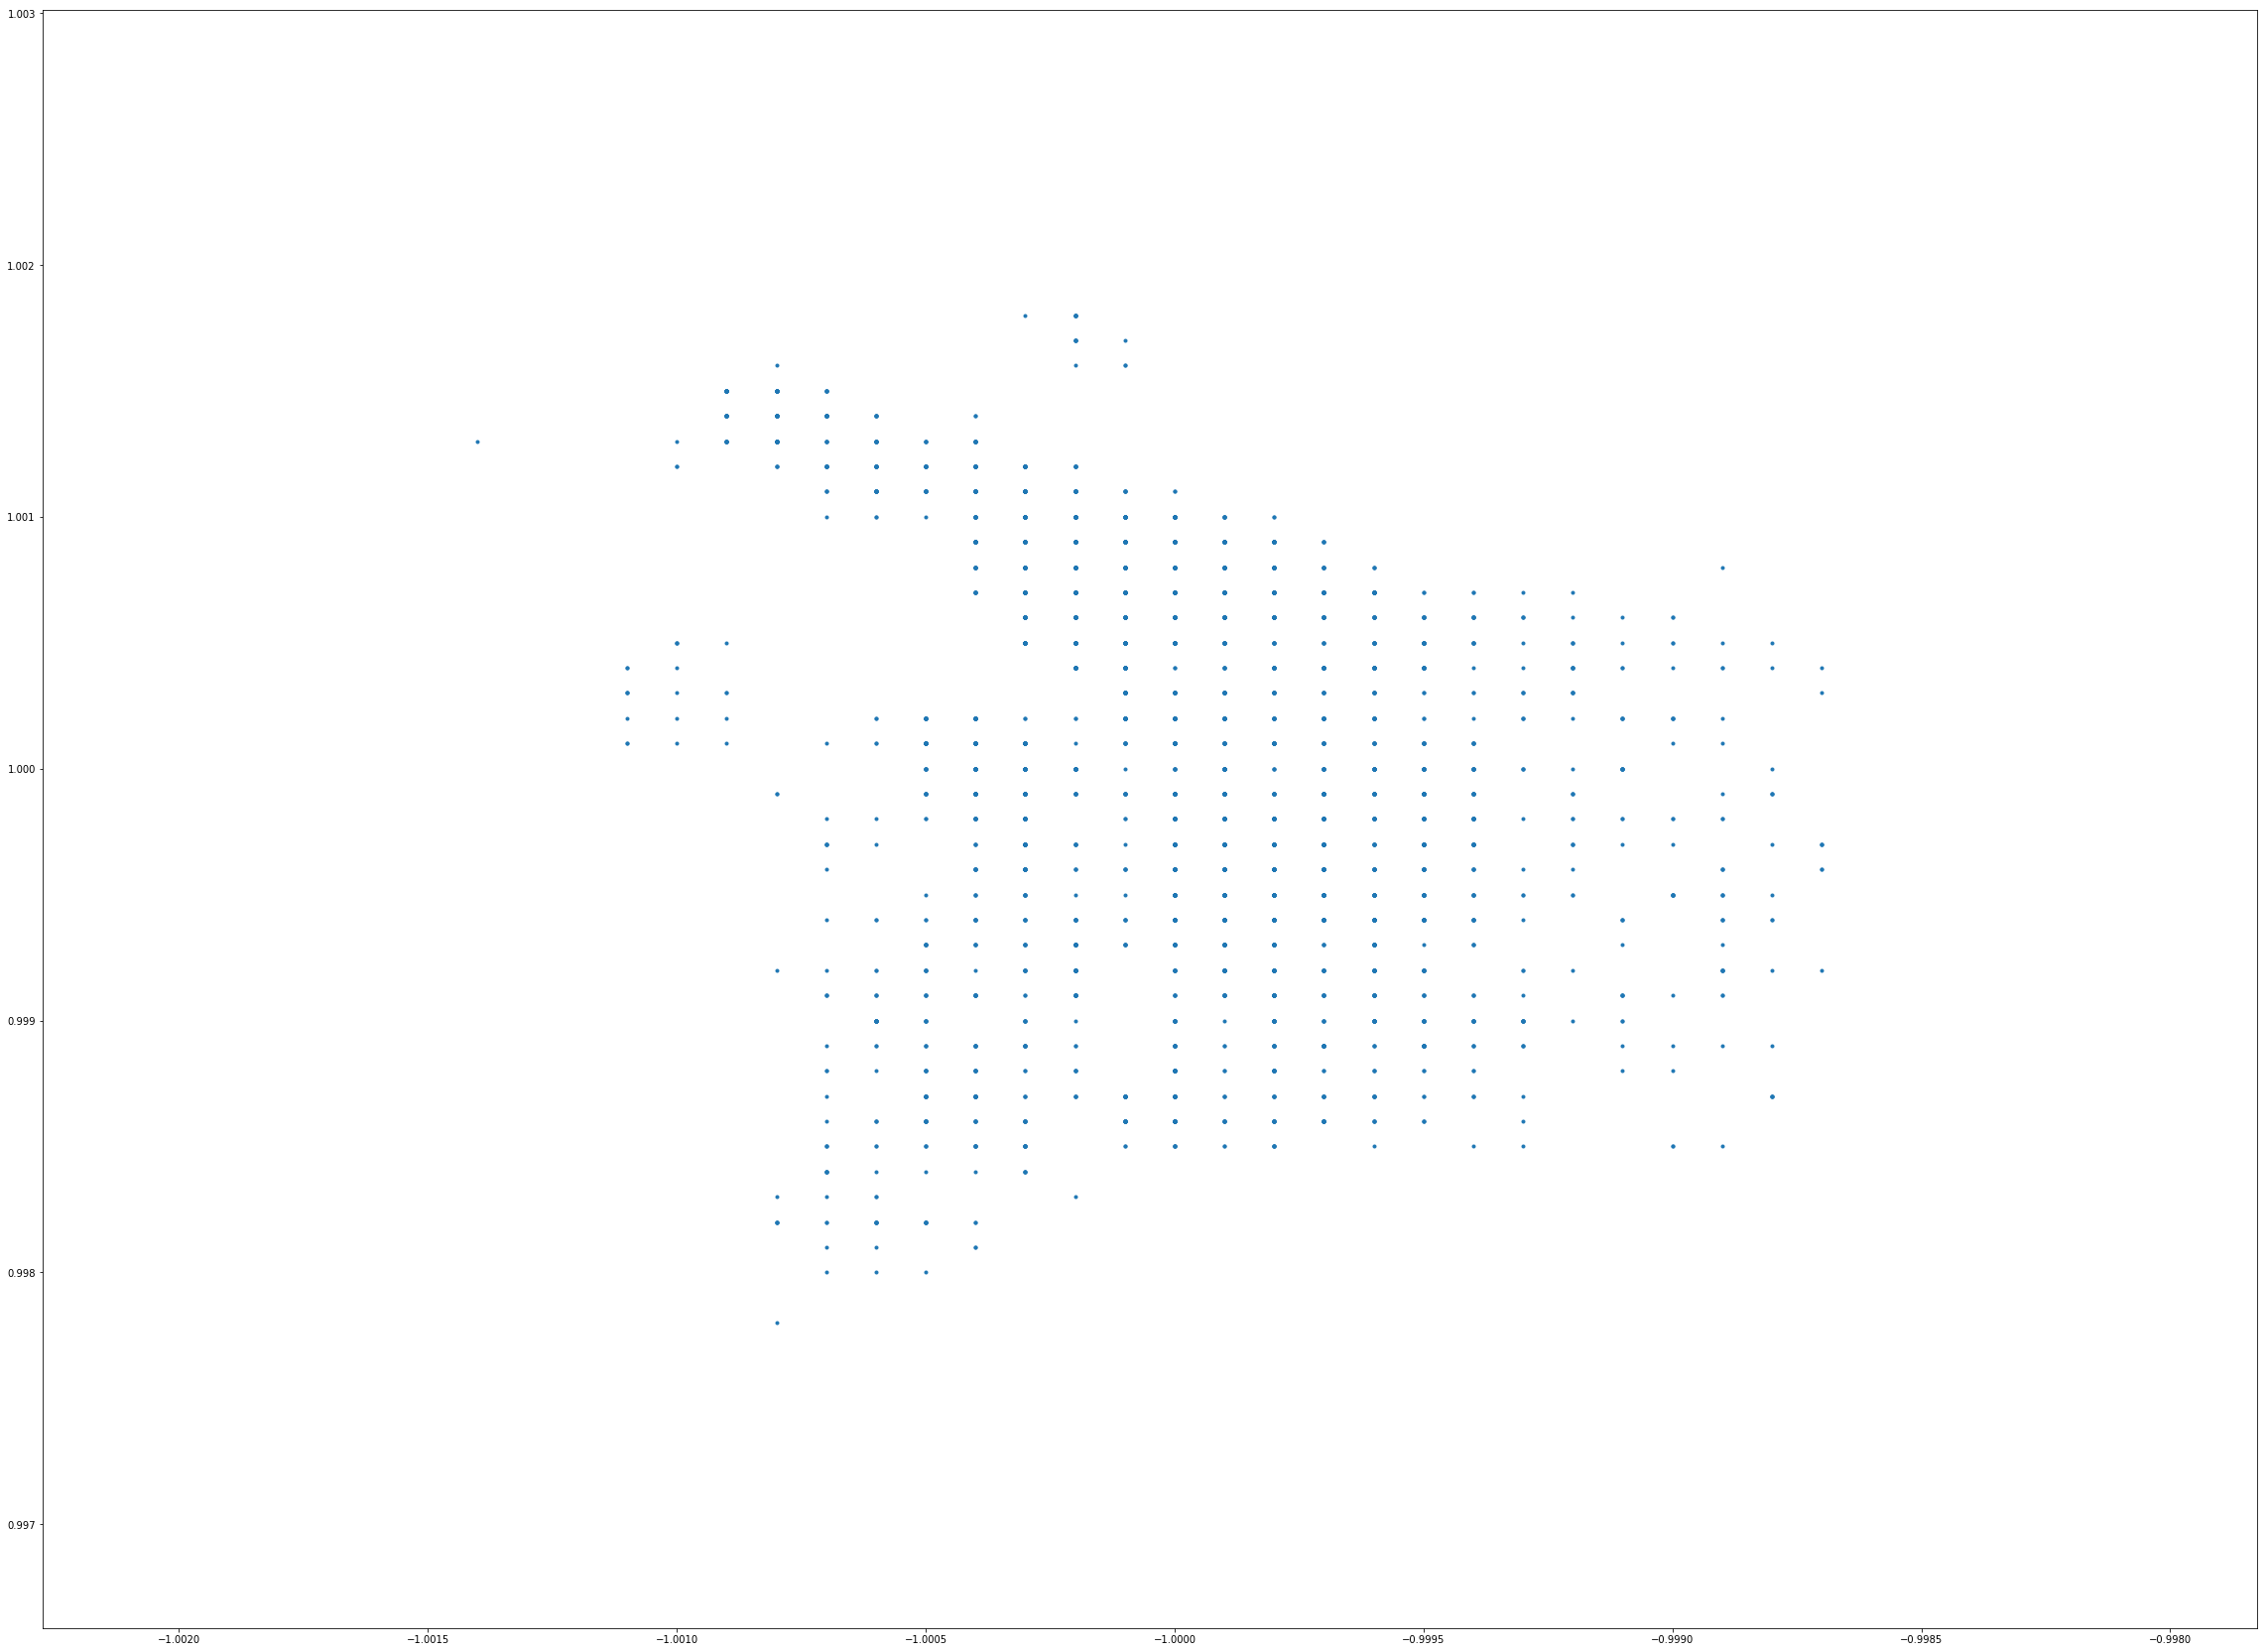

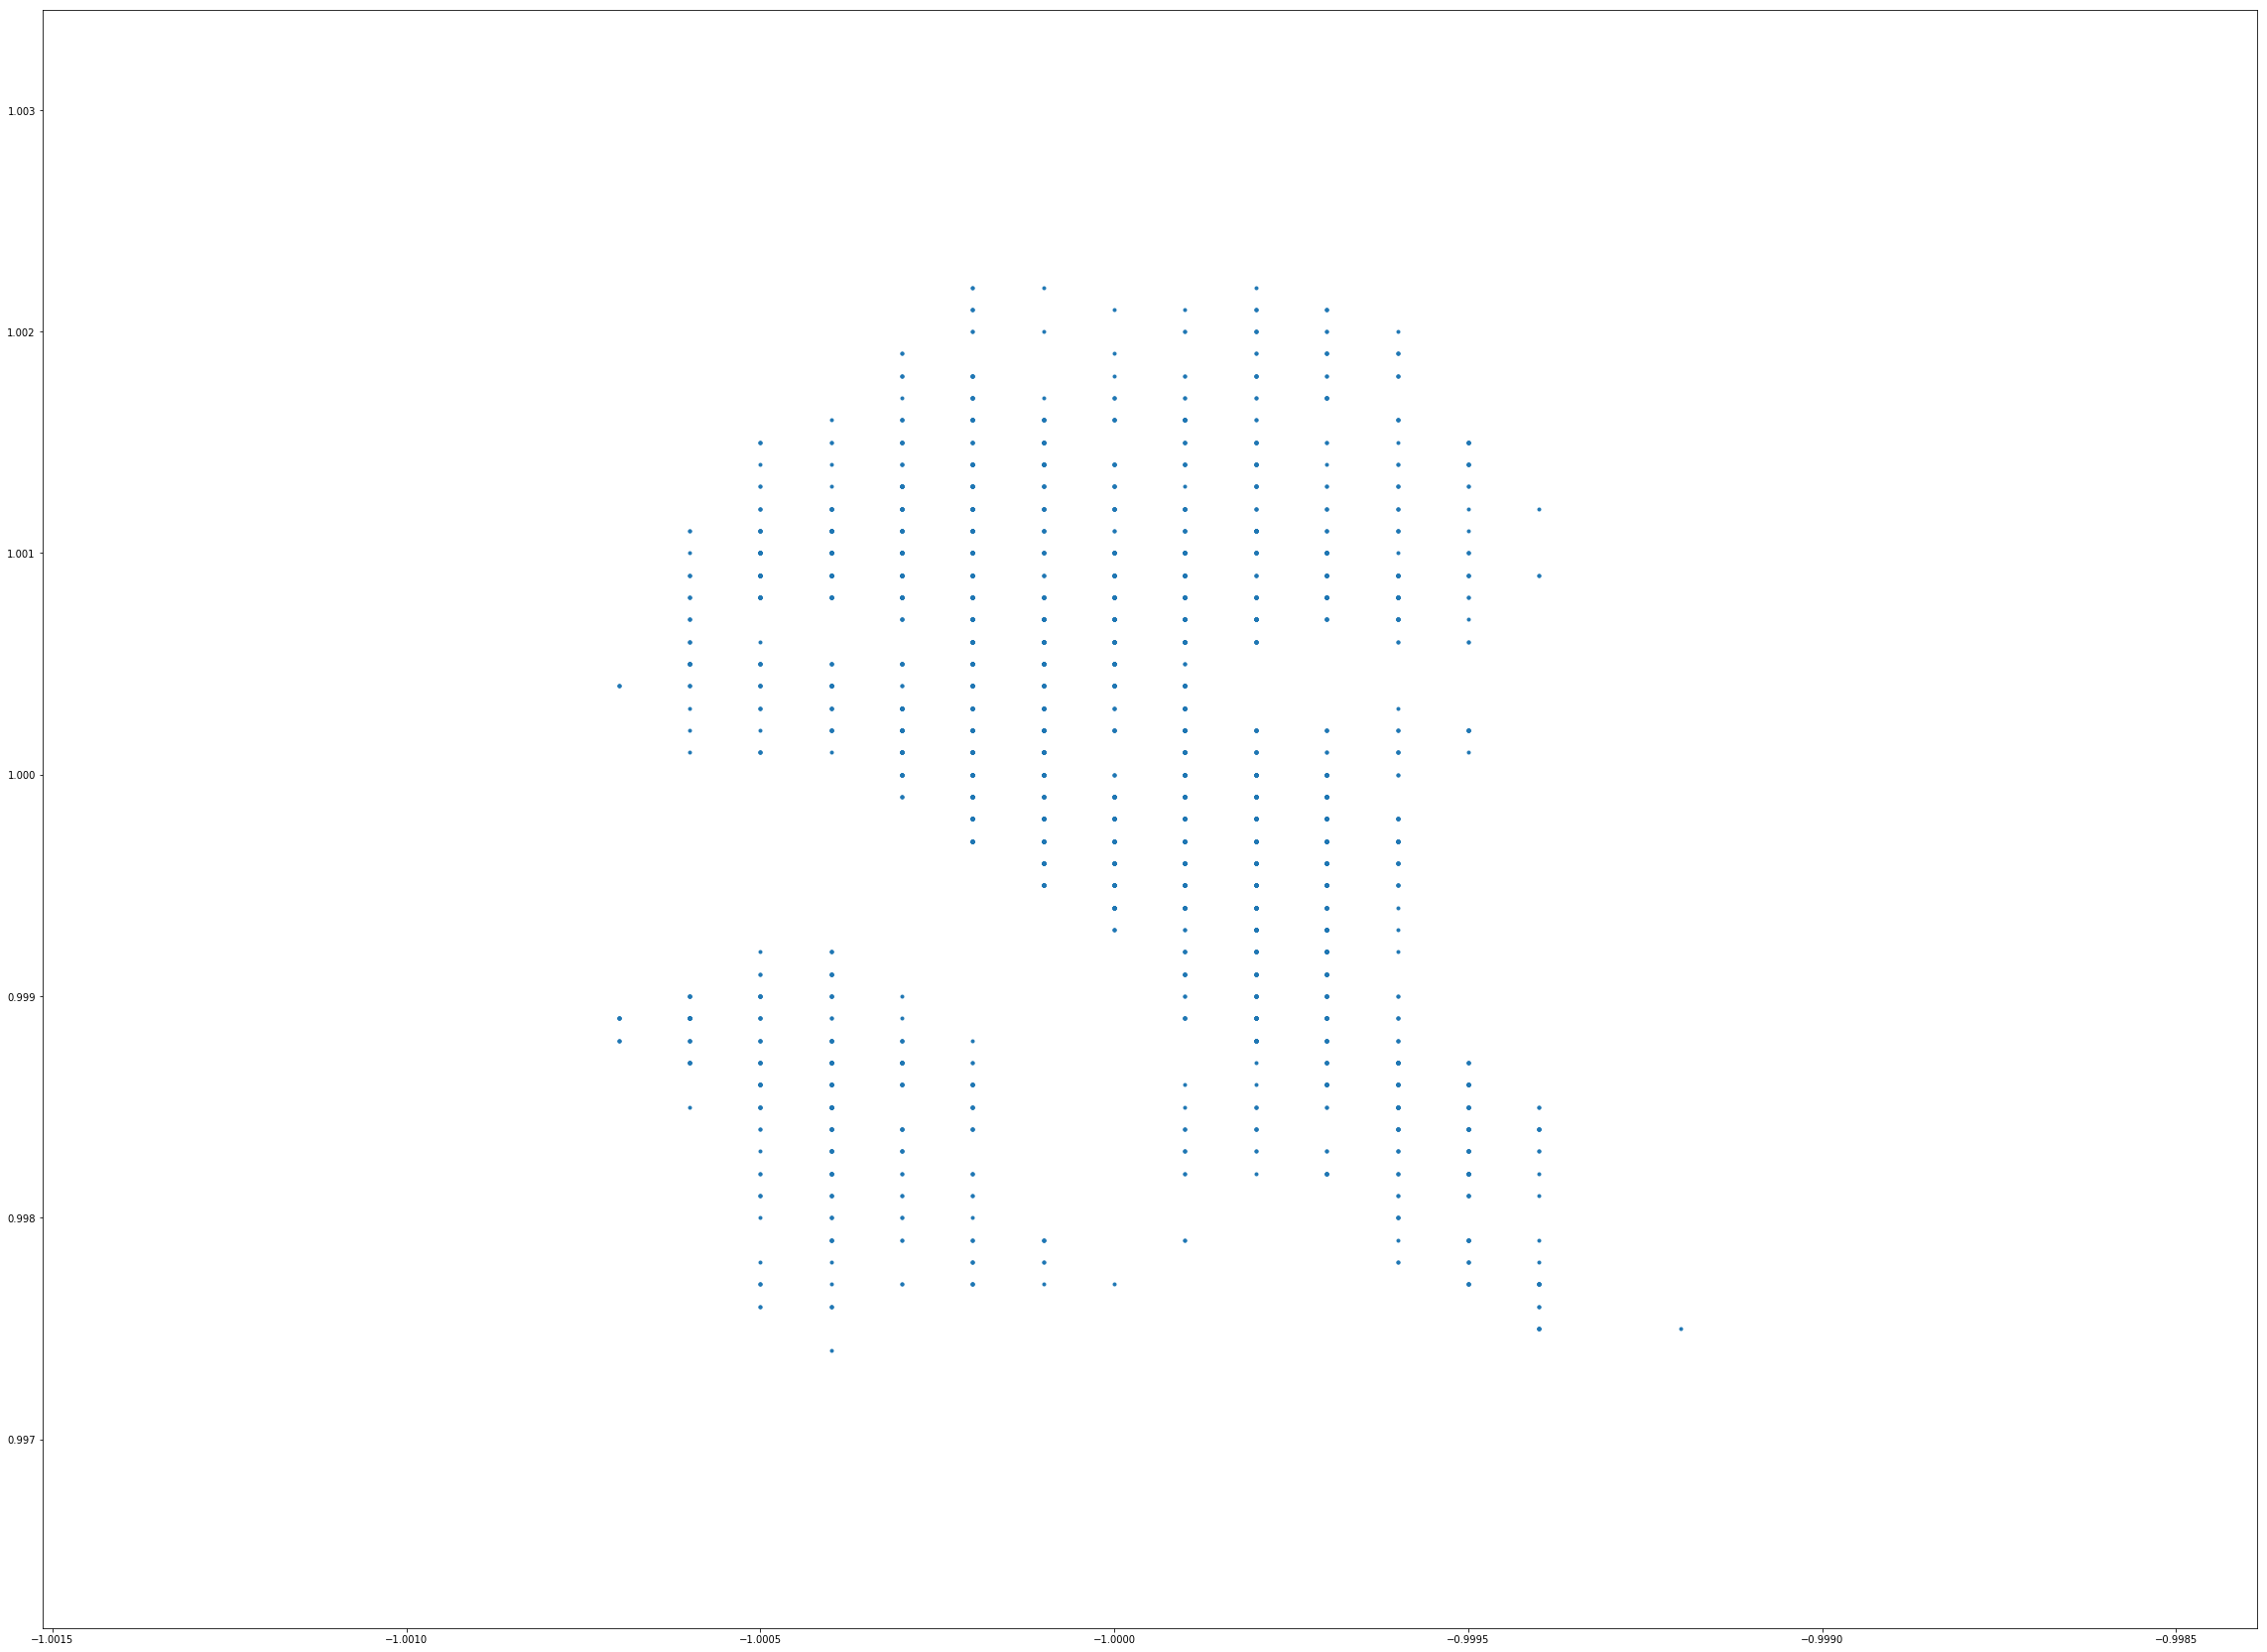

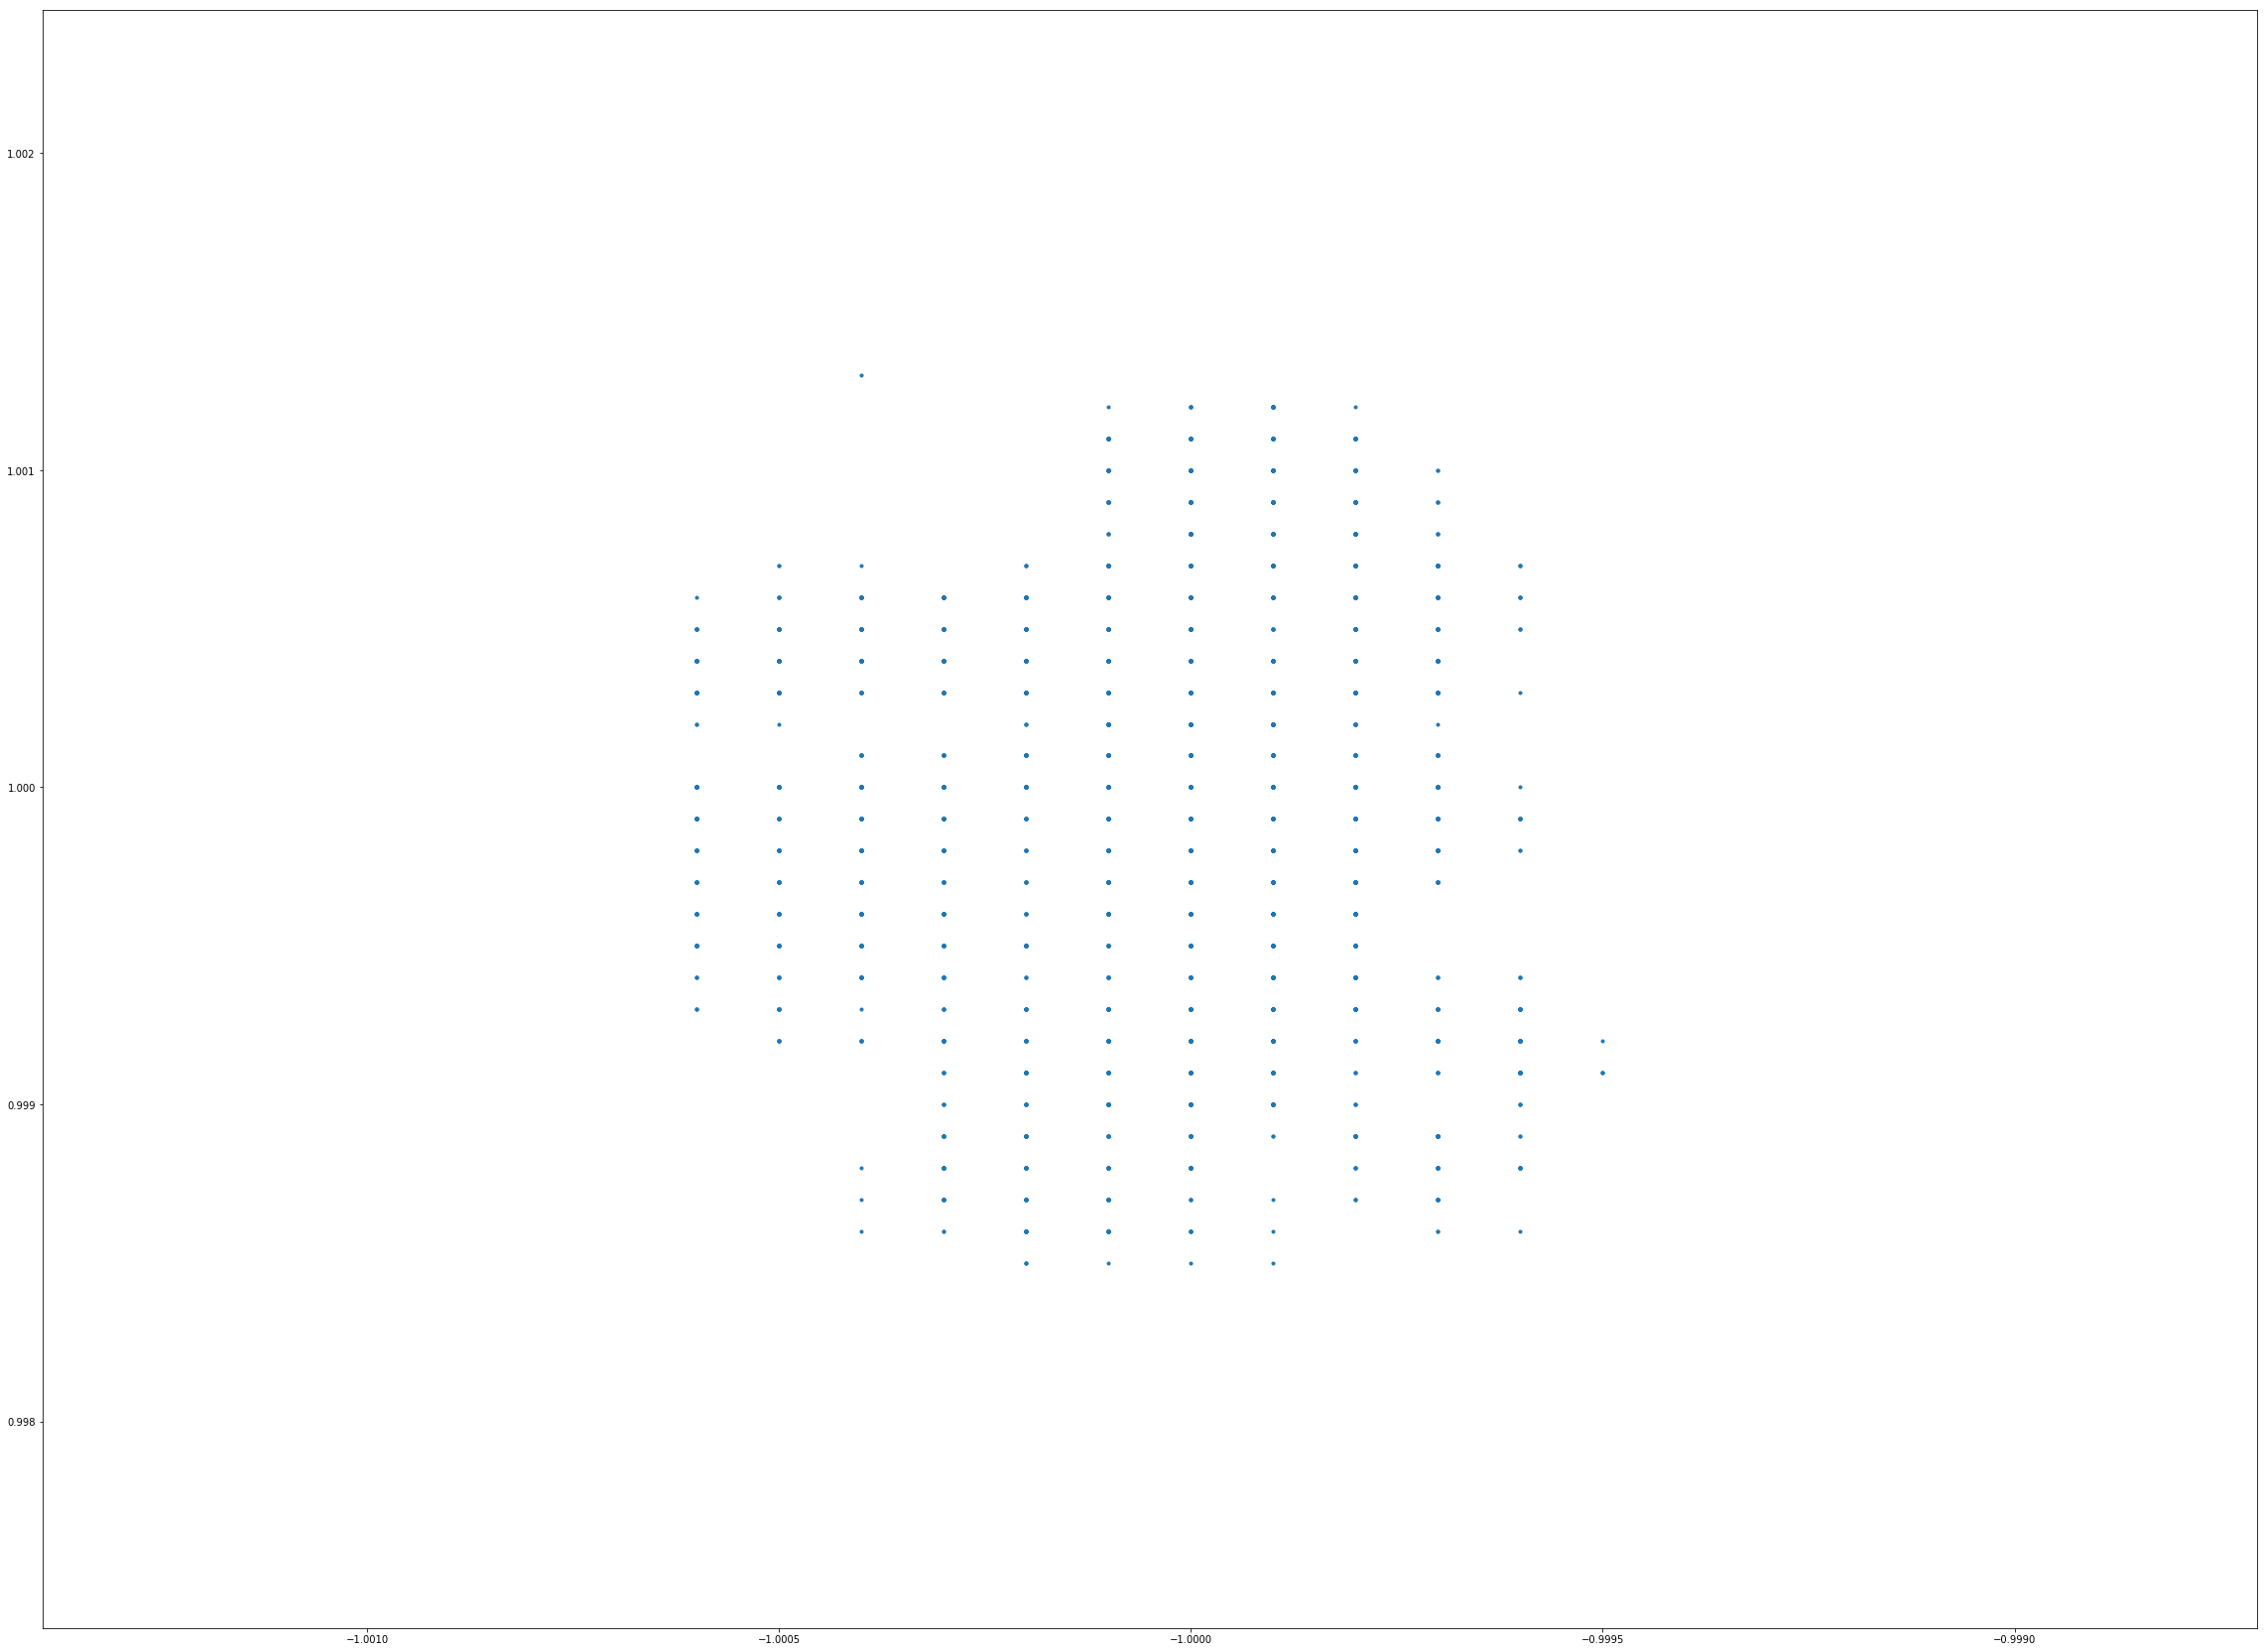

In [5]:
for item in dfl:
    latnorm = (np.array(item.latitude))/(np.mean(np.array(item.latitude)))
    lonnorm = (np.array(item.longitude))/(np.mean(np.array(item.longitude)))
    rdlat = np.round(latnorm, 4)
    rdlon = np.round(lonnorm, 4)
    plt.figure(figsize = (40,30))
    plt.scatter(rdlon*-1, rdlat, marker = '.');

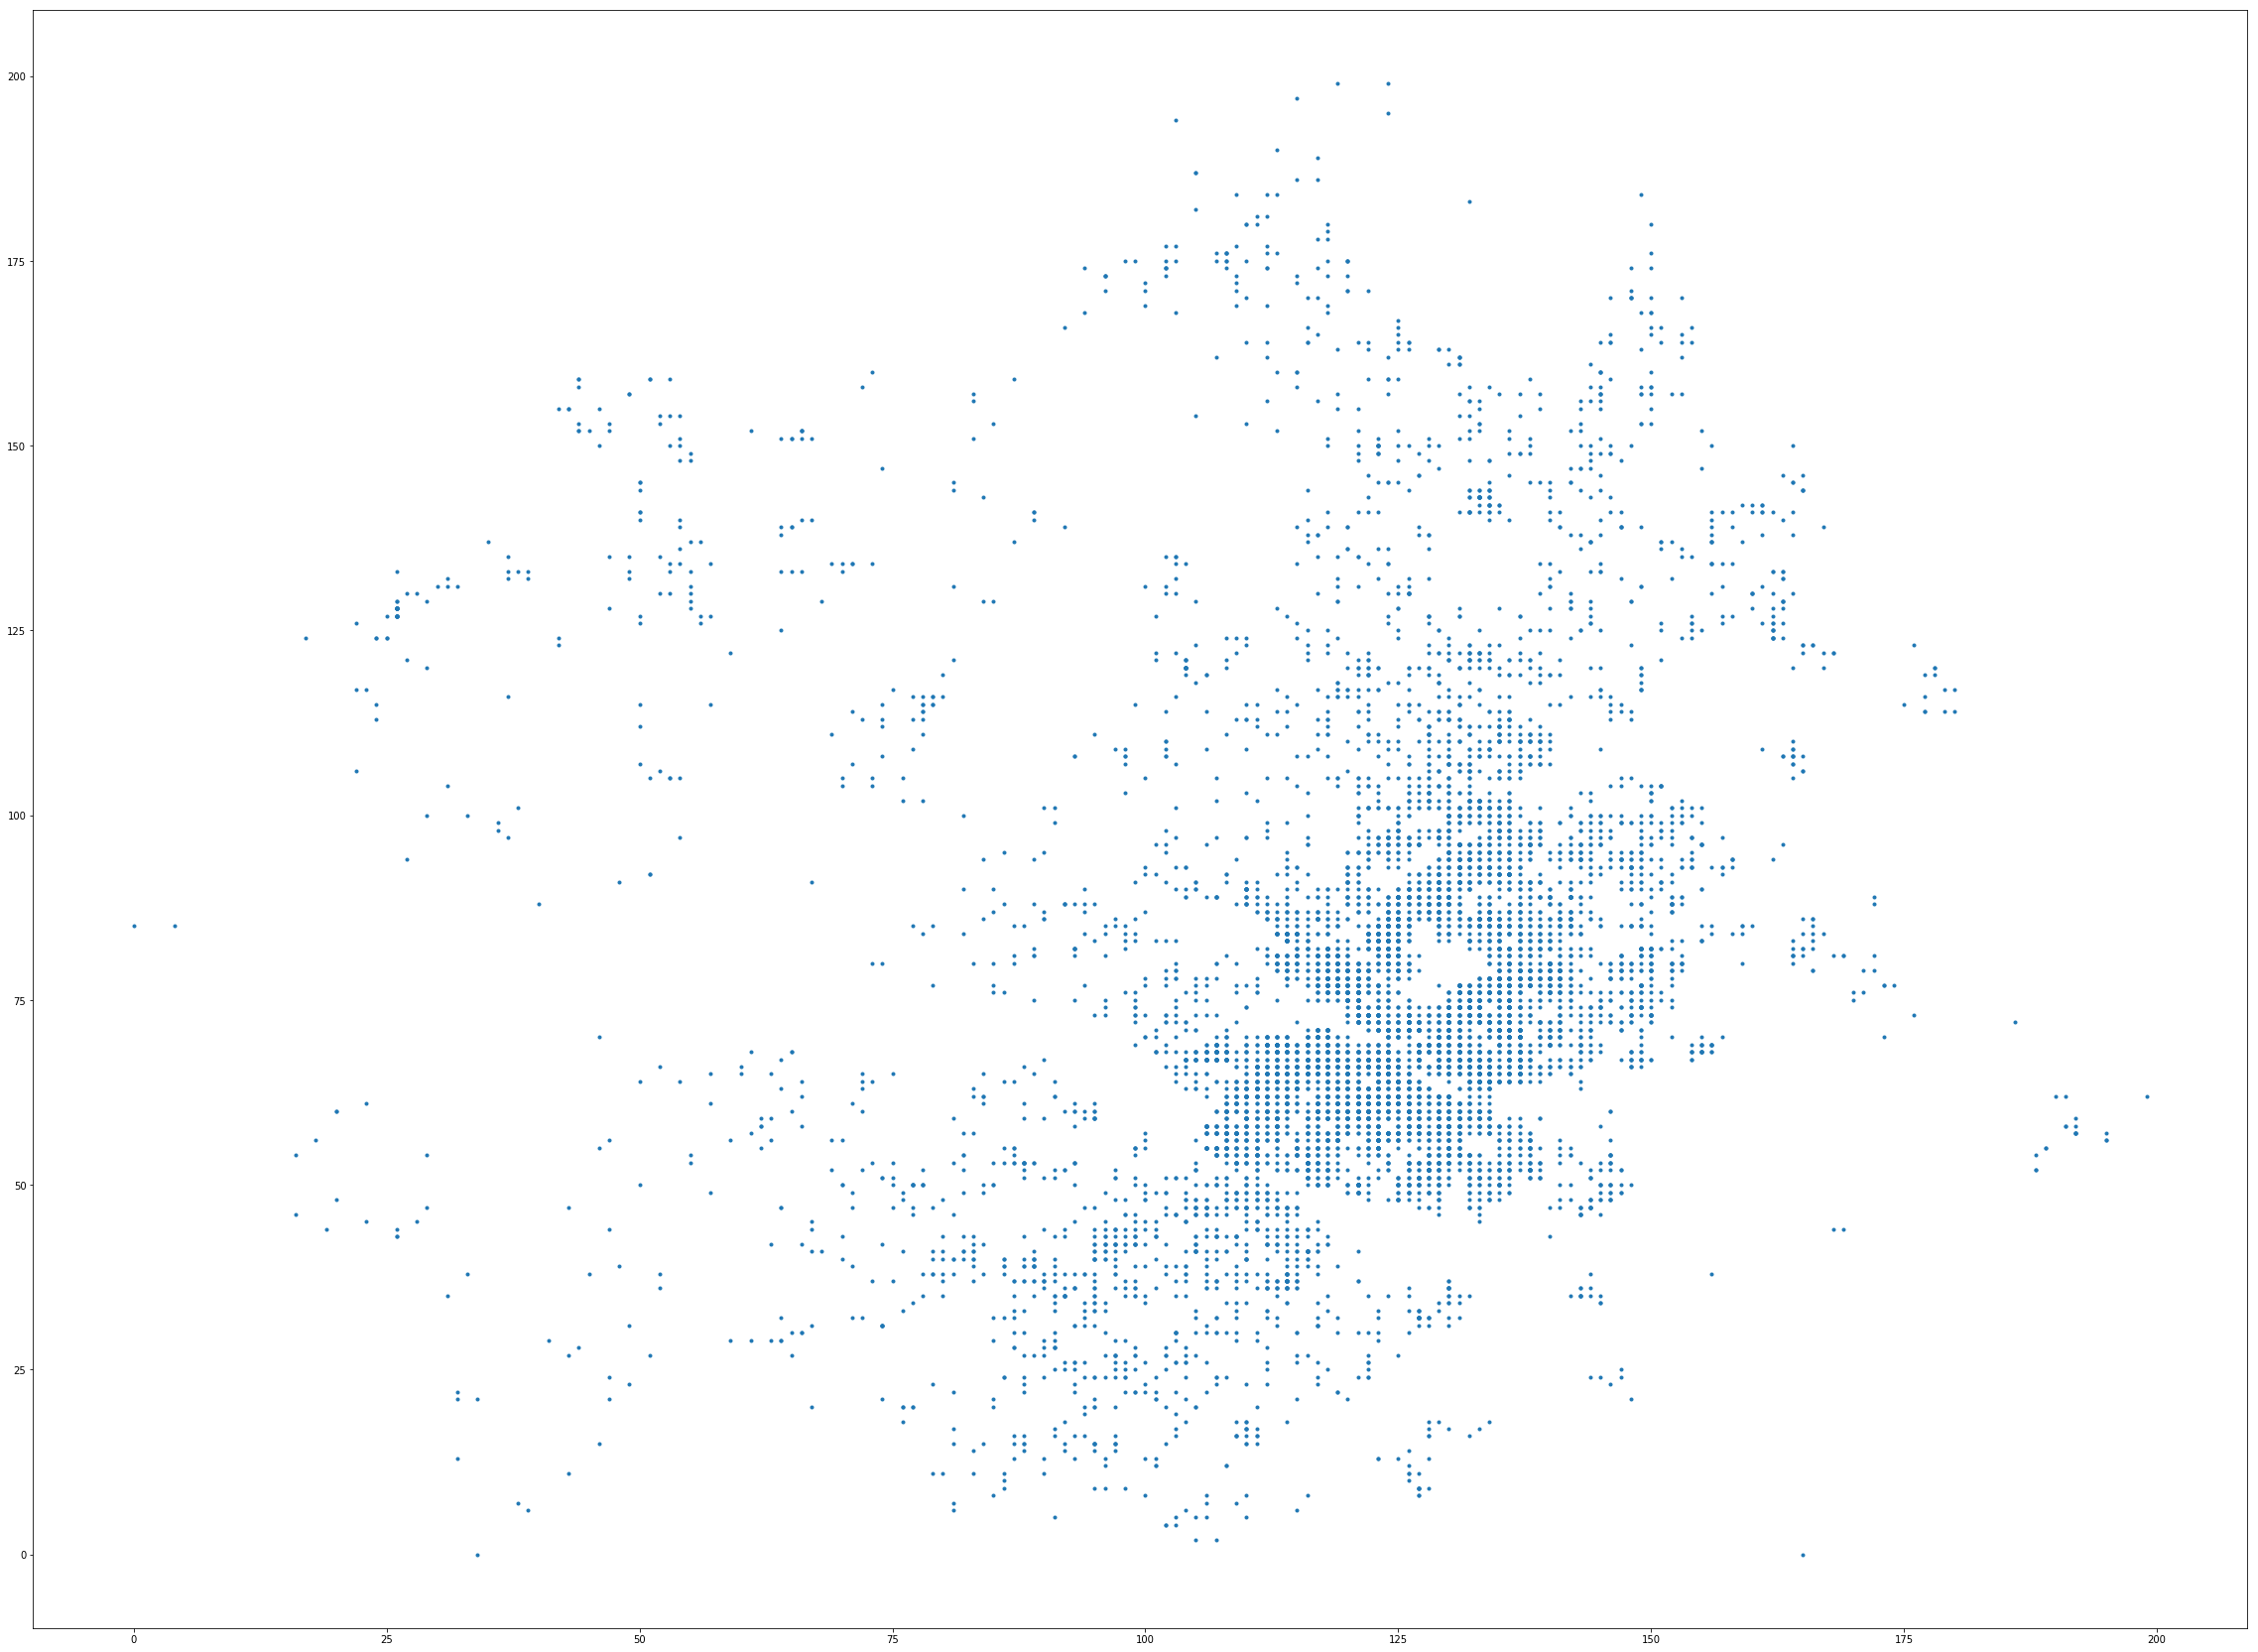

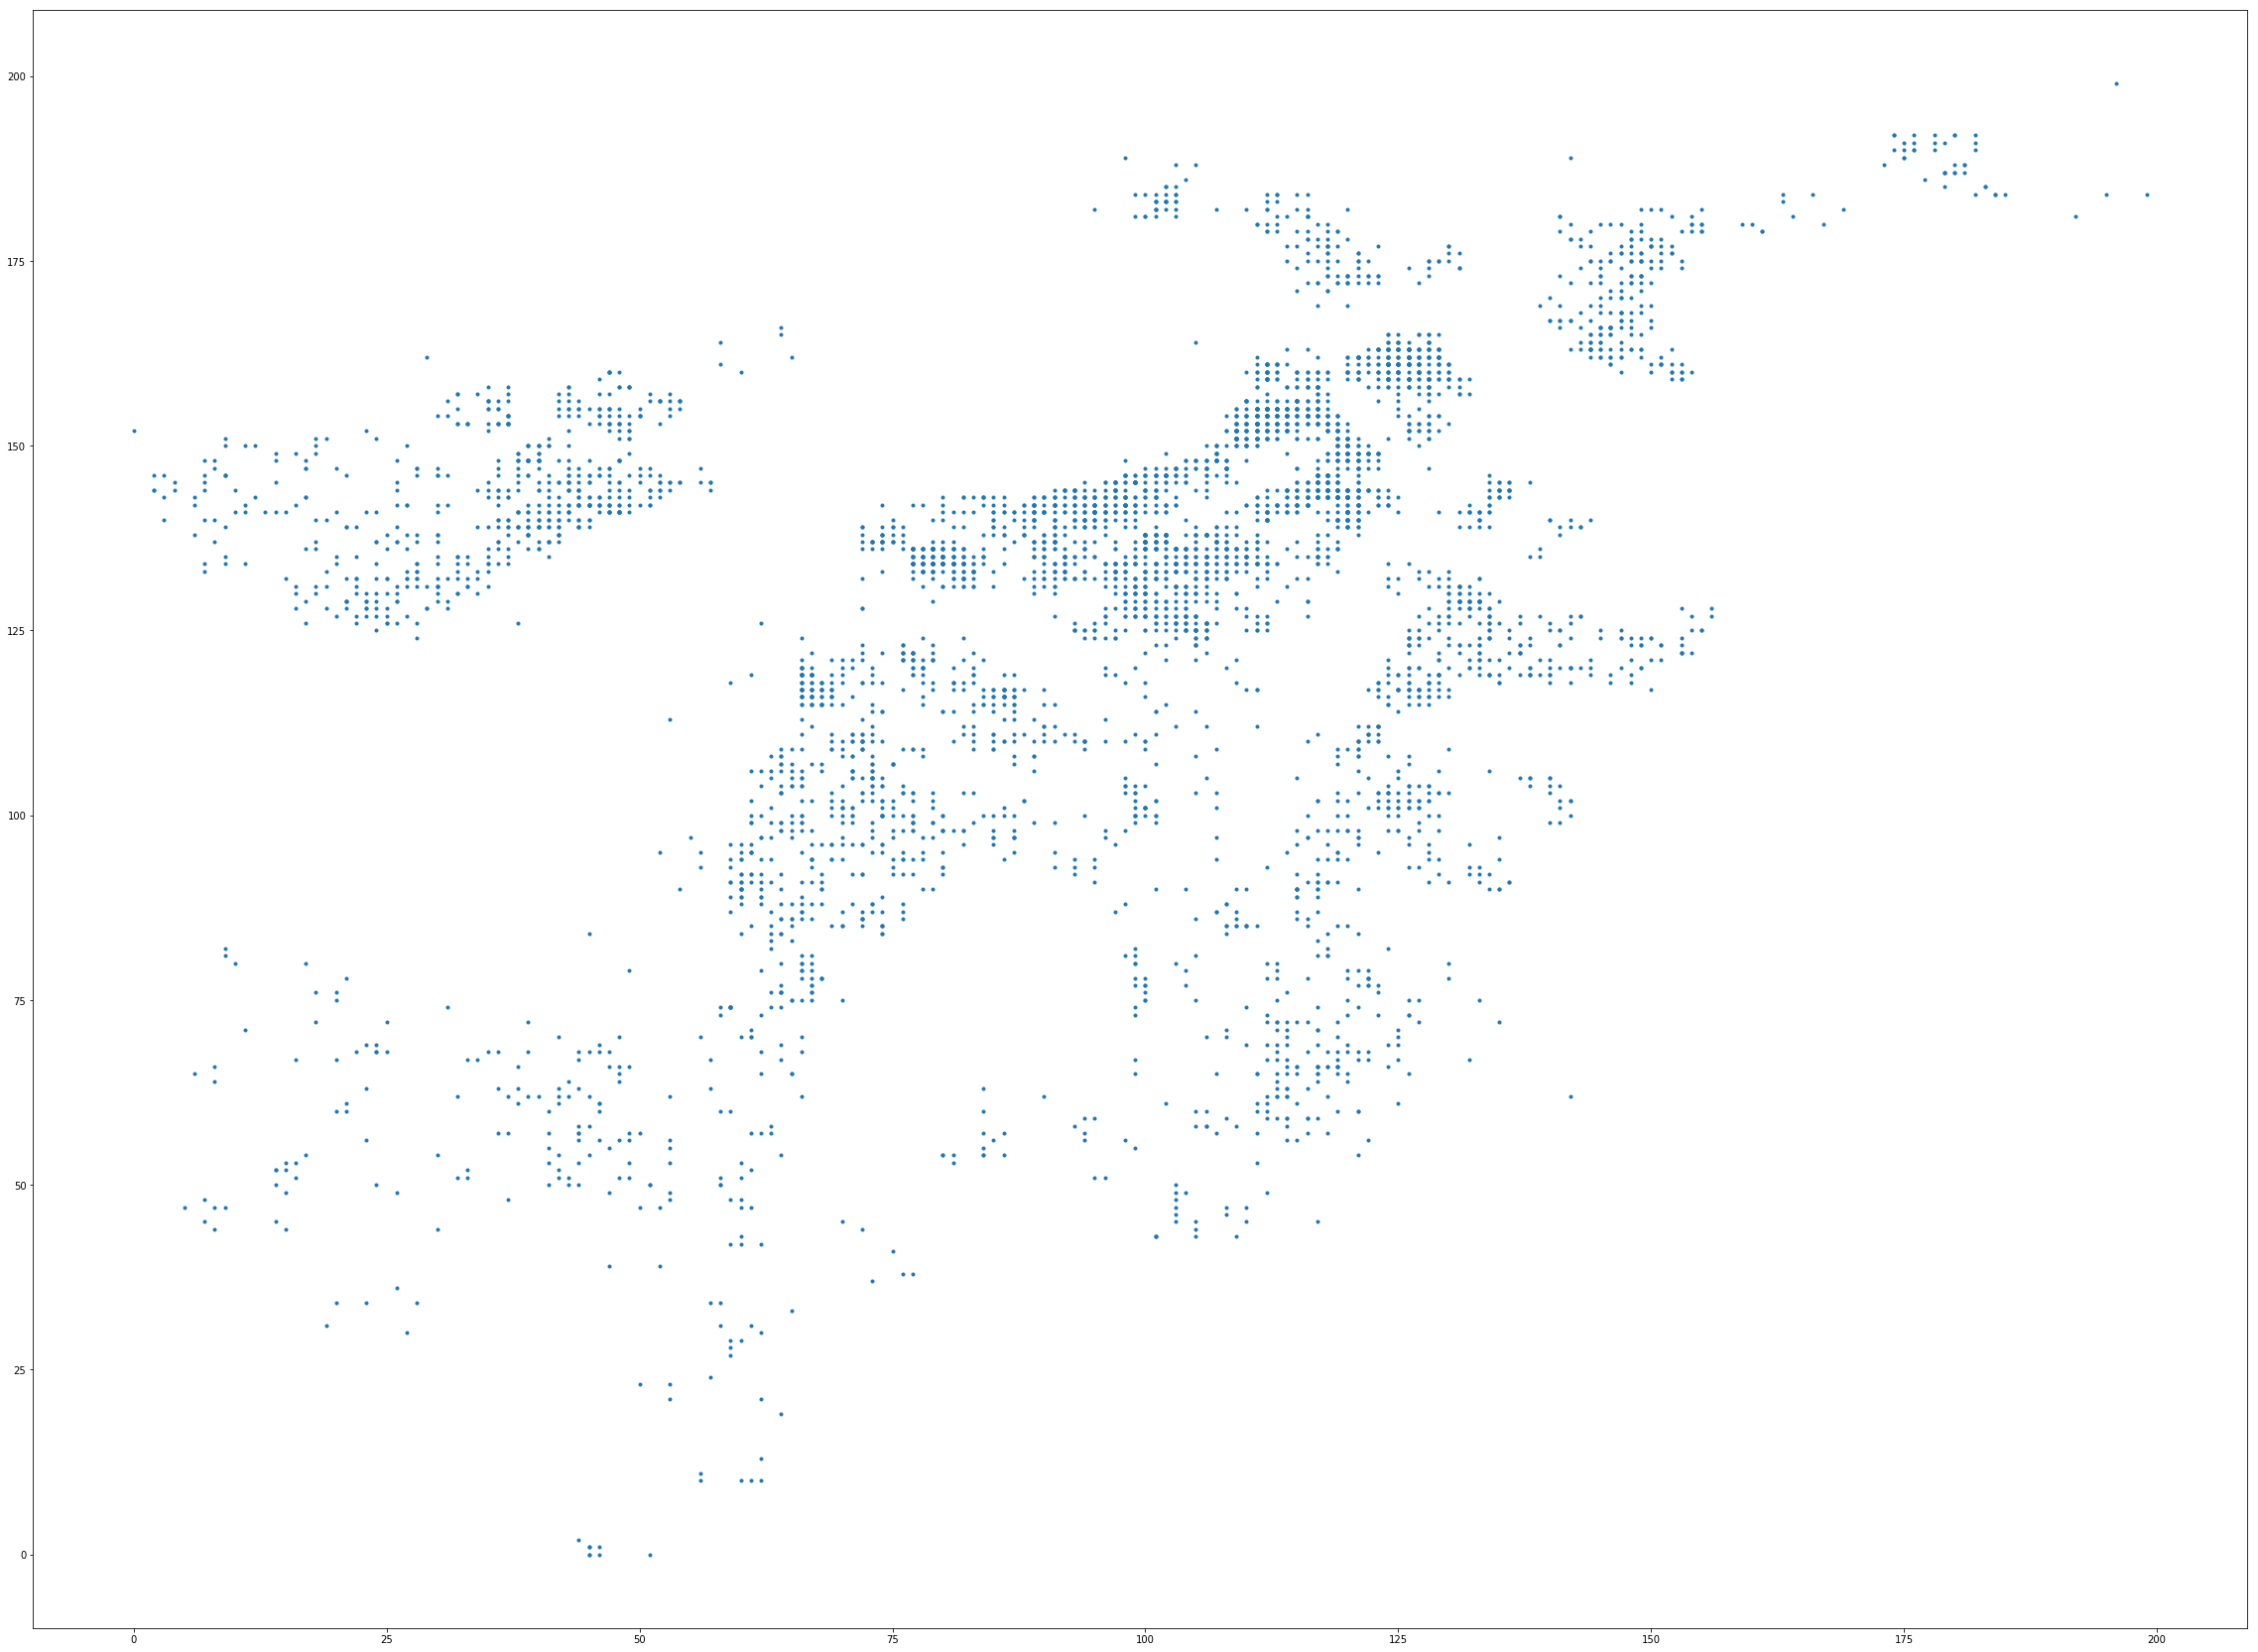

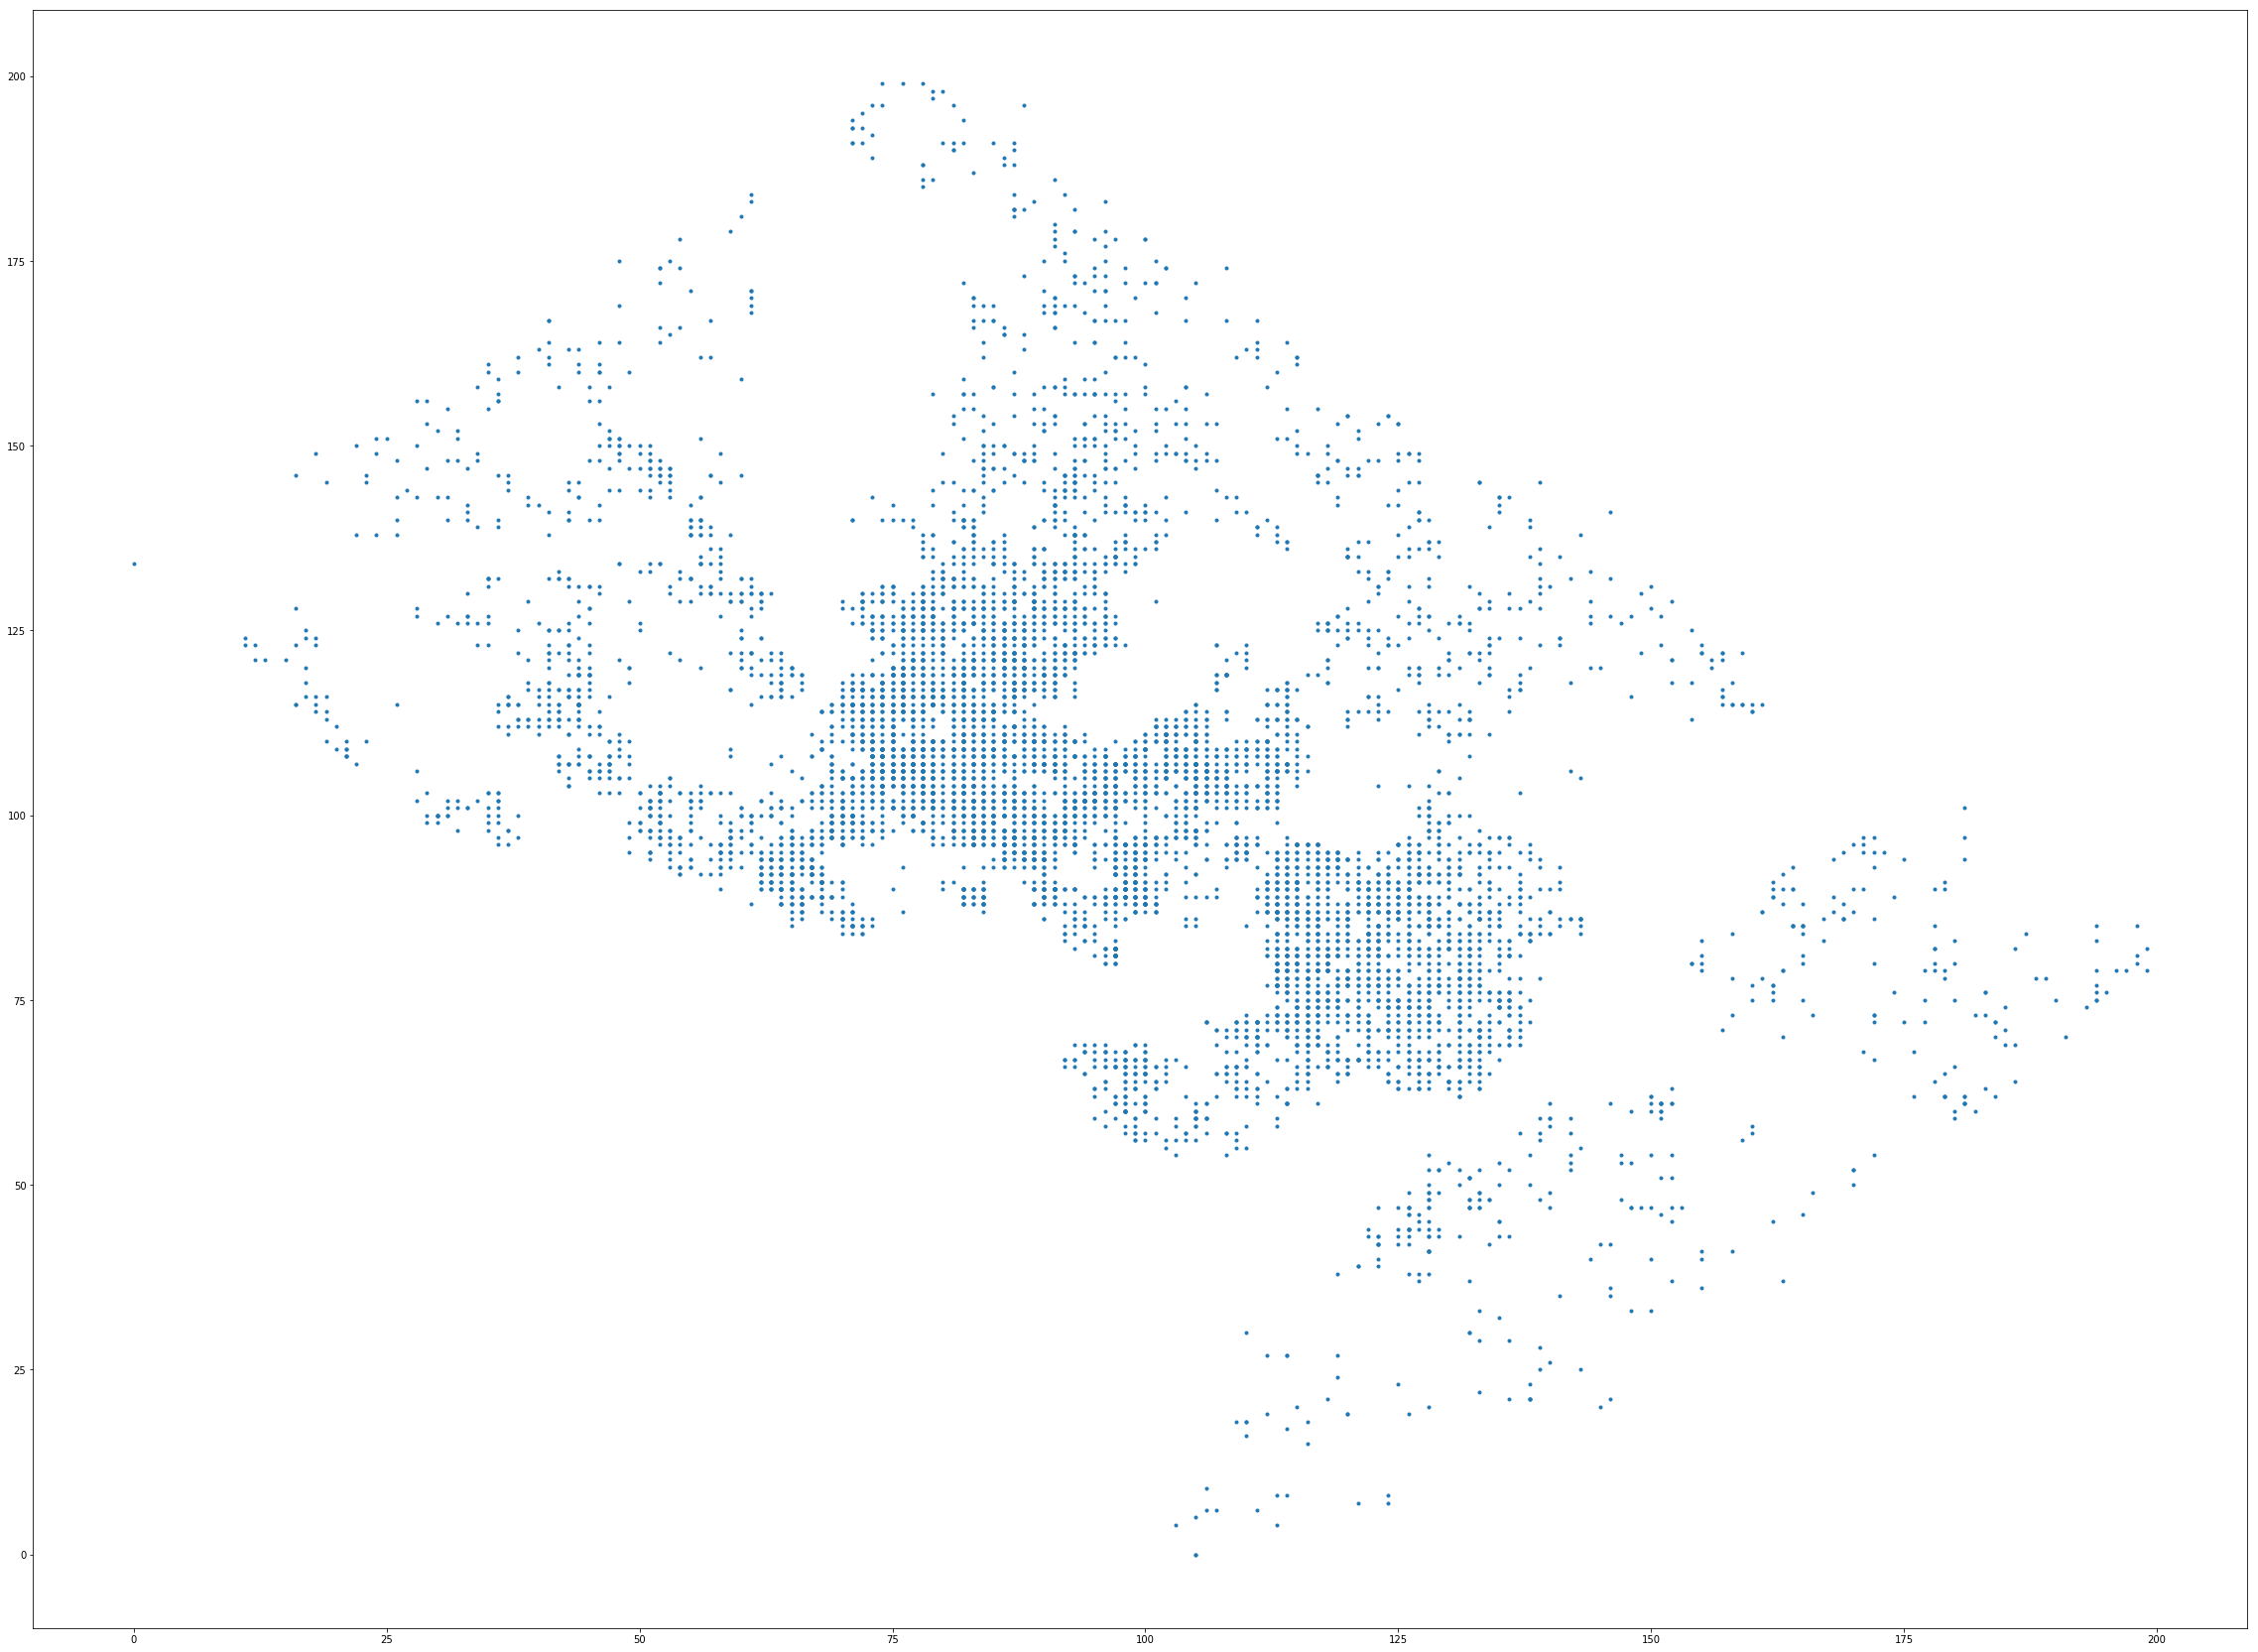

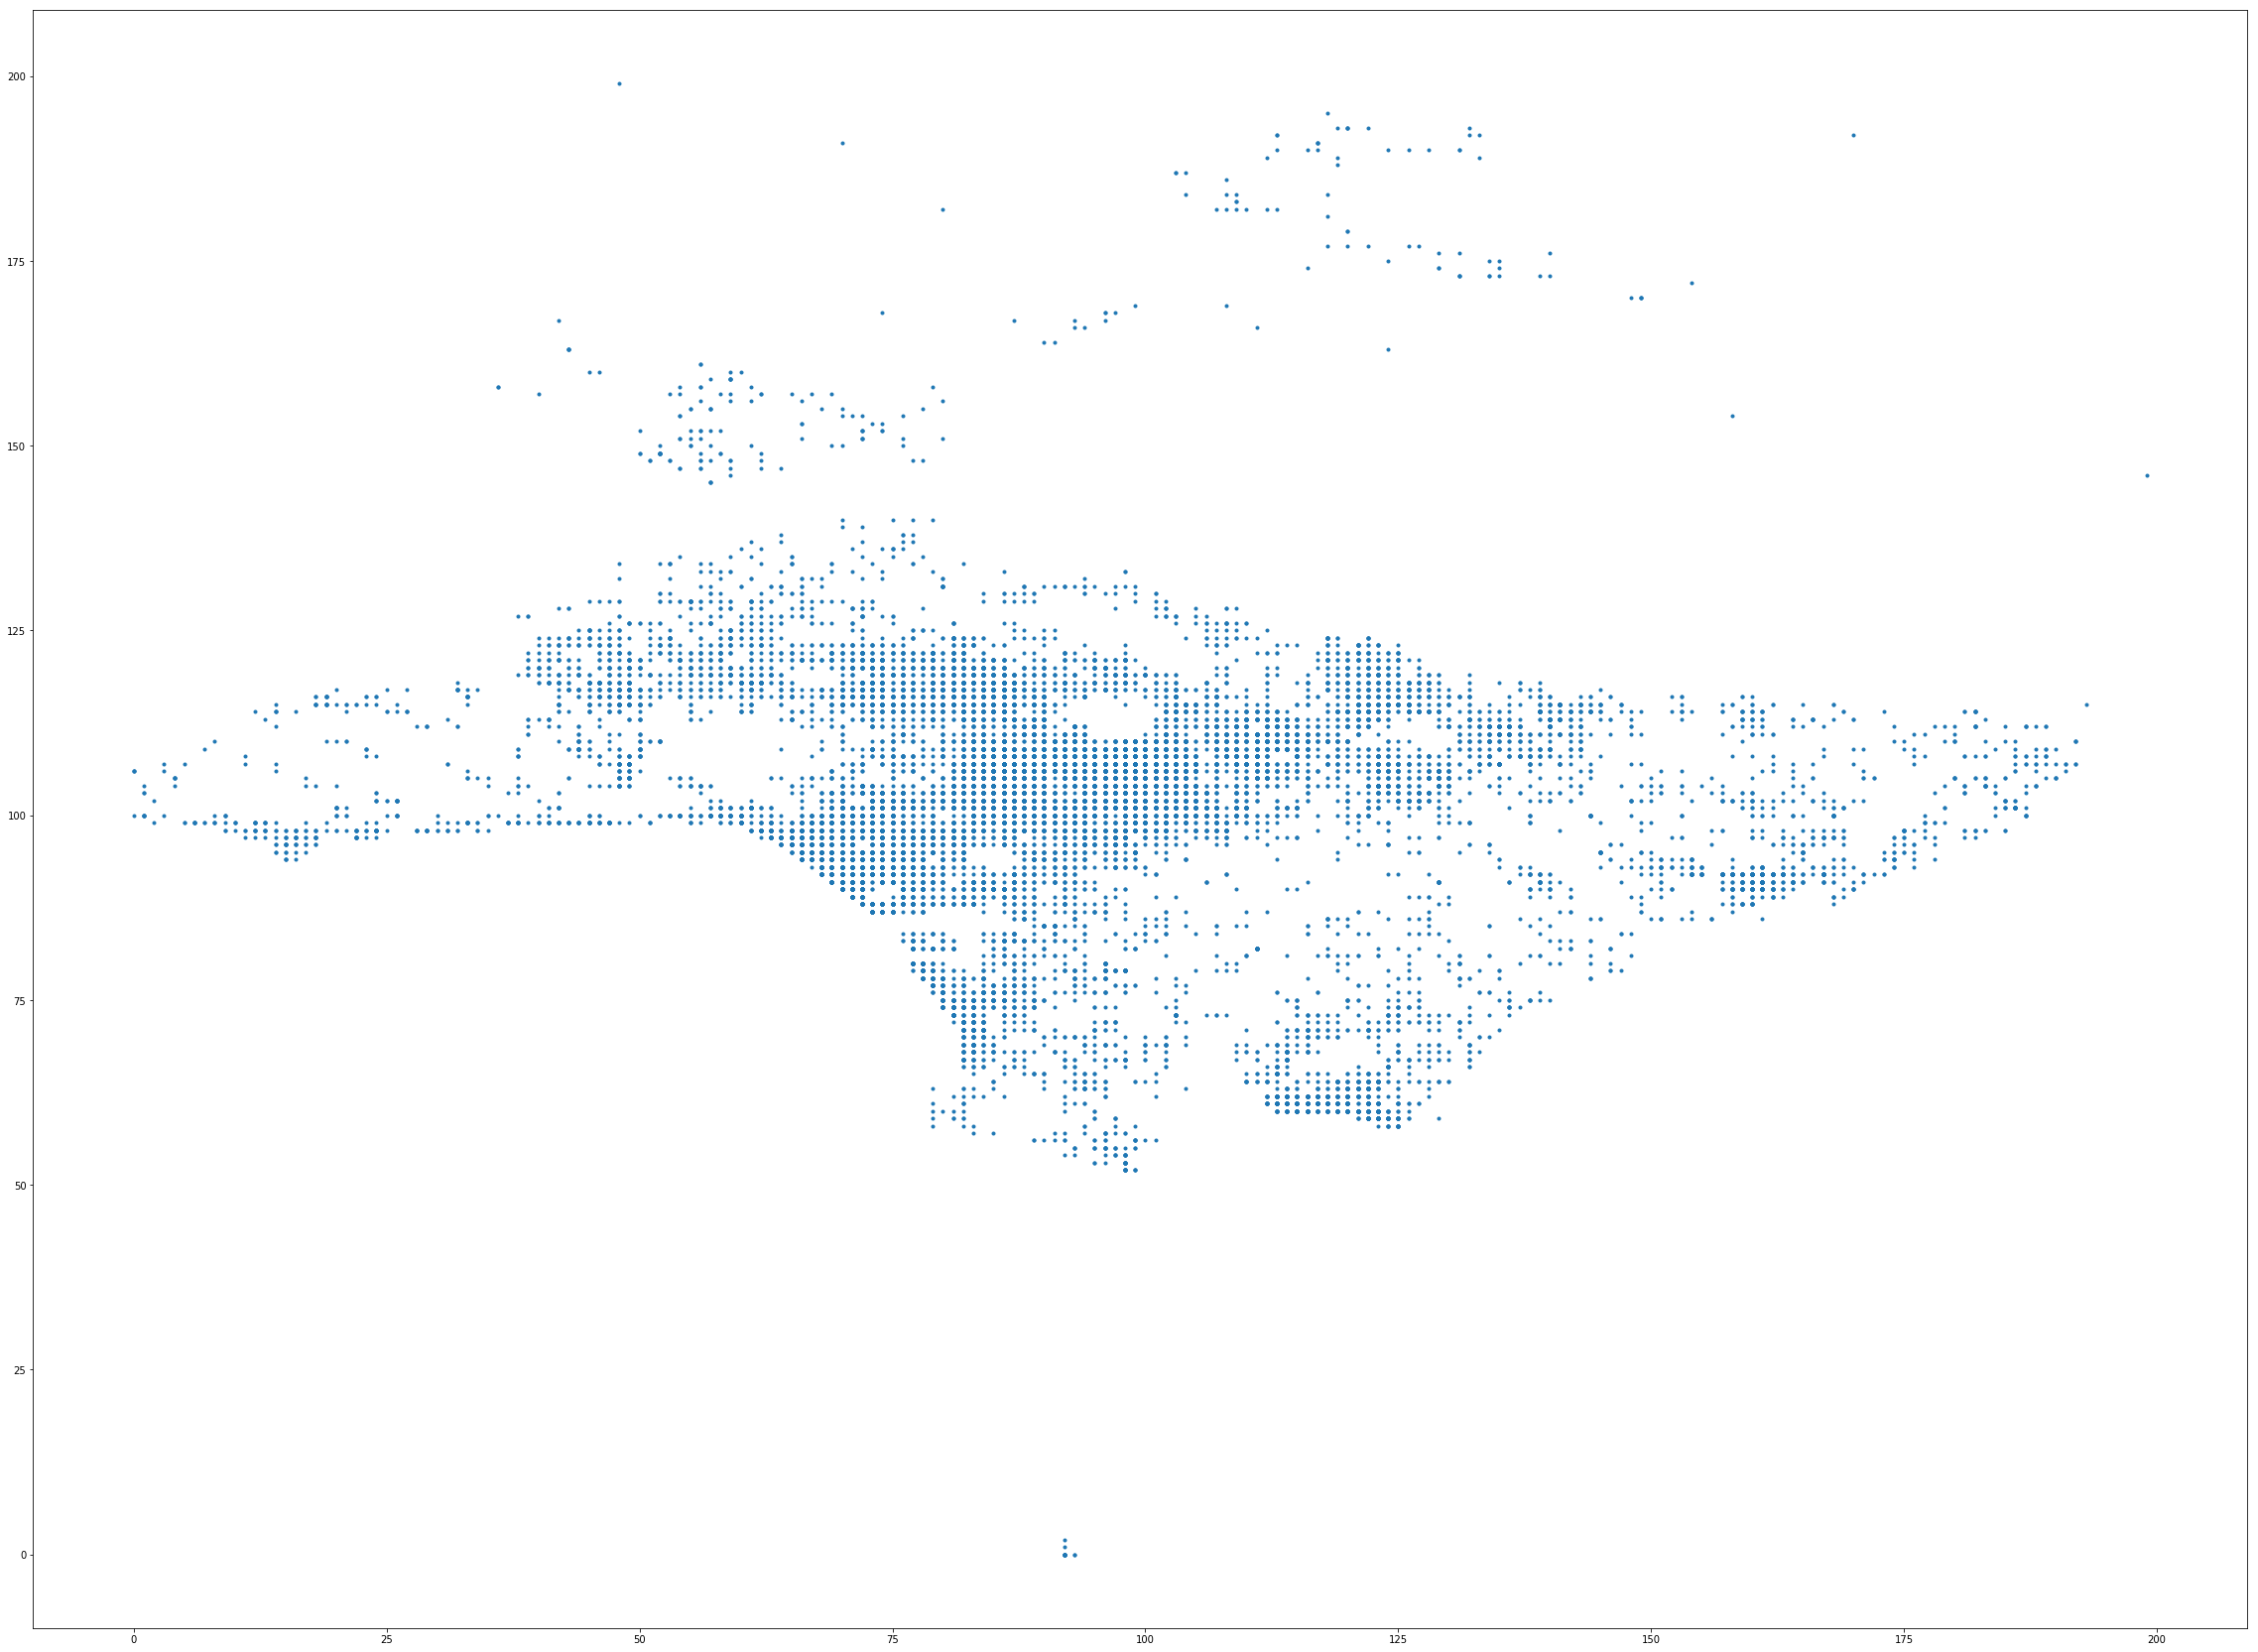

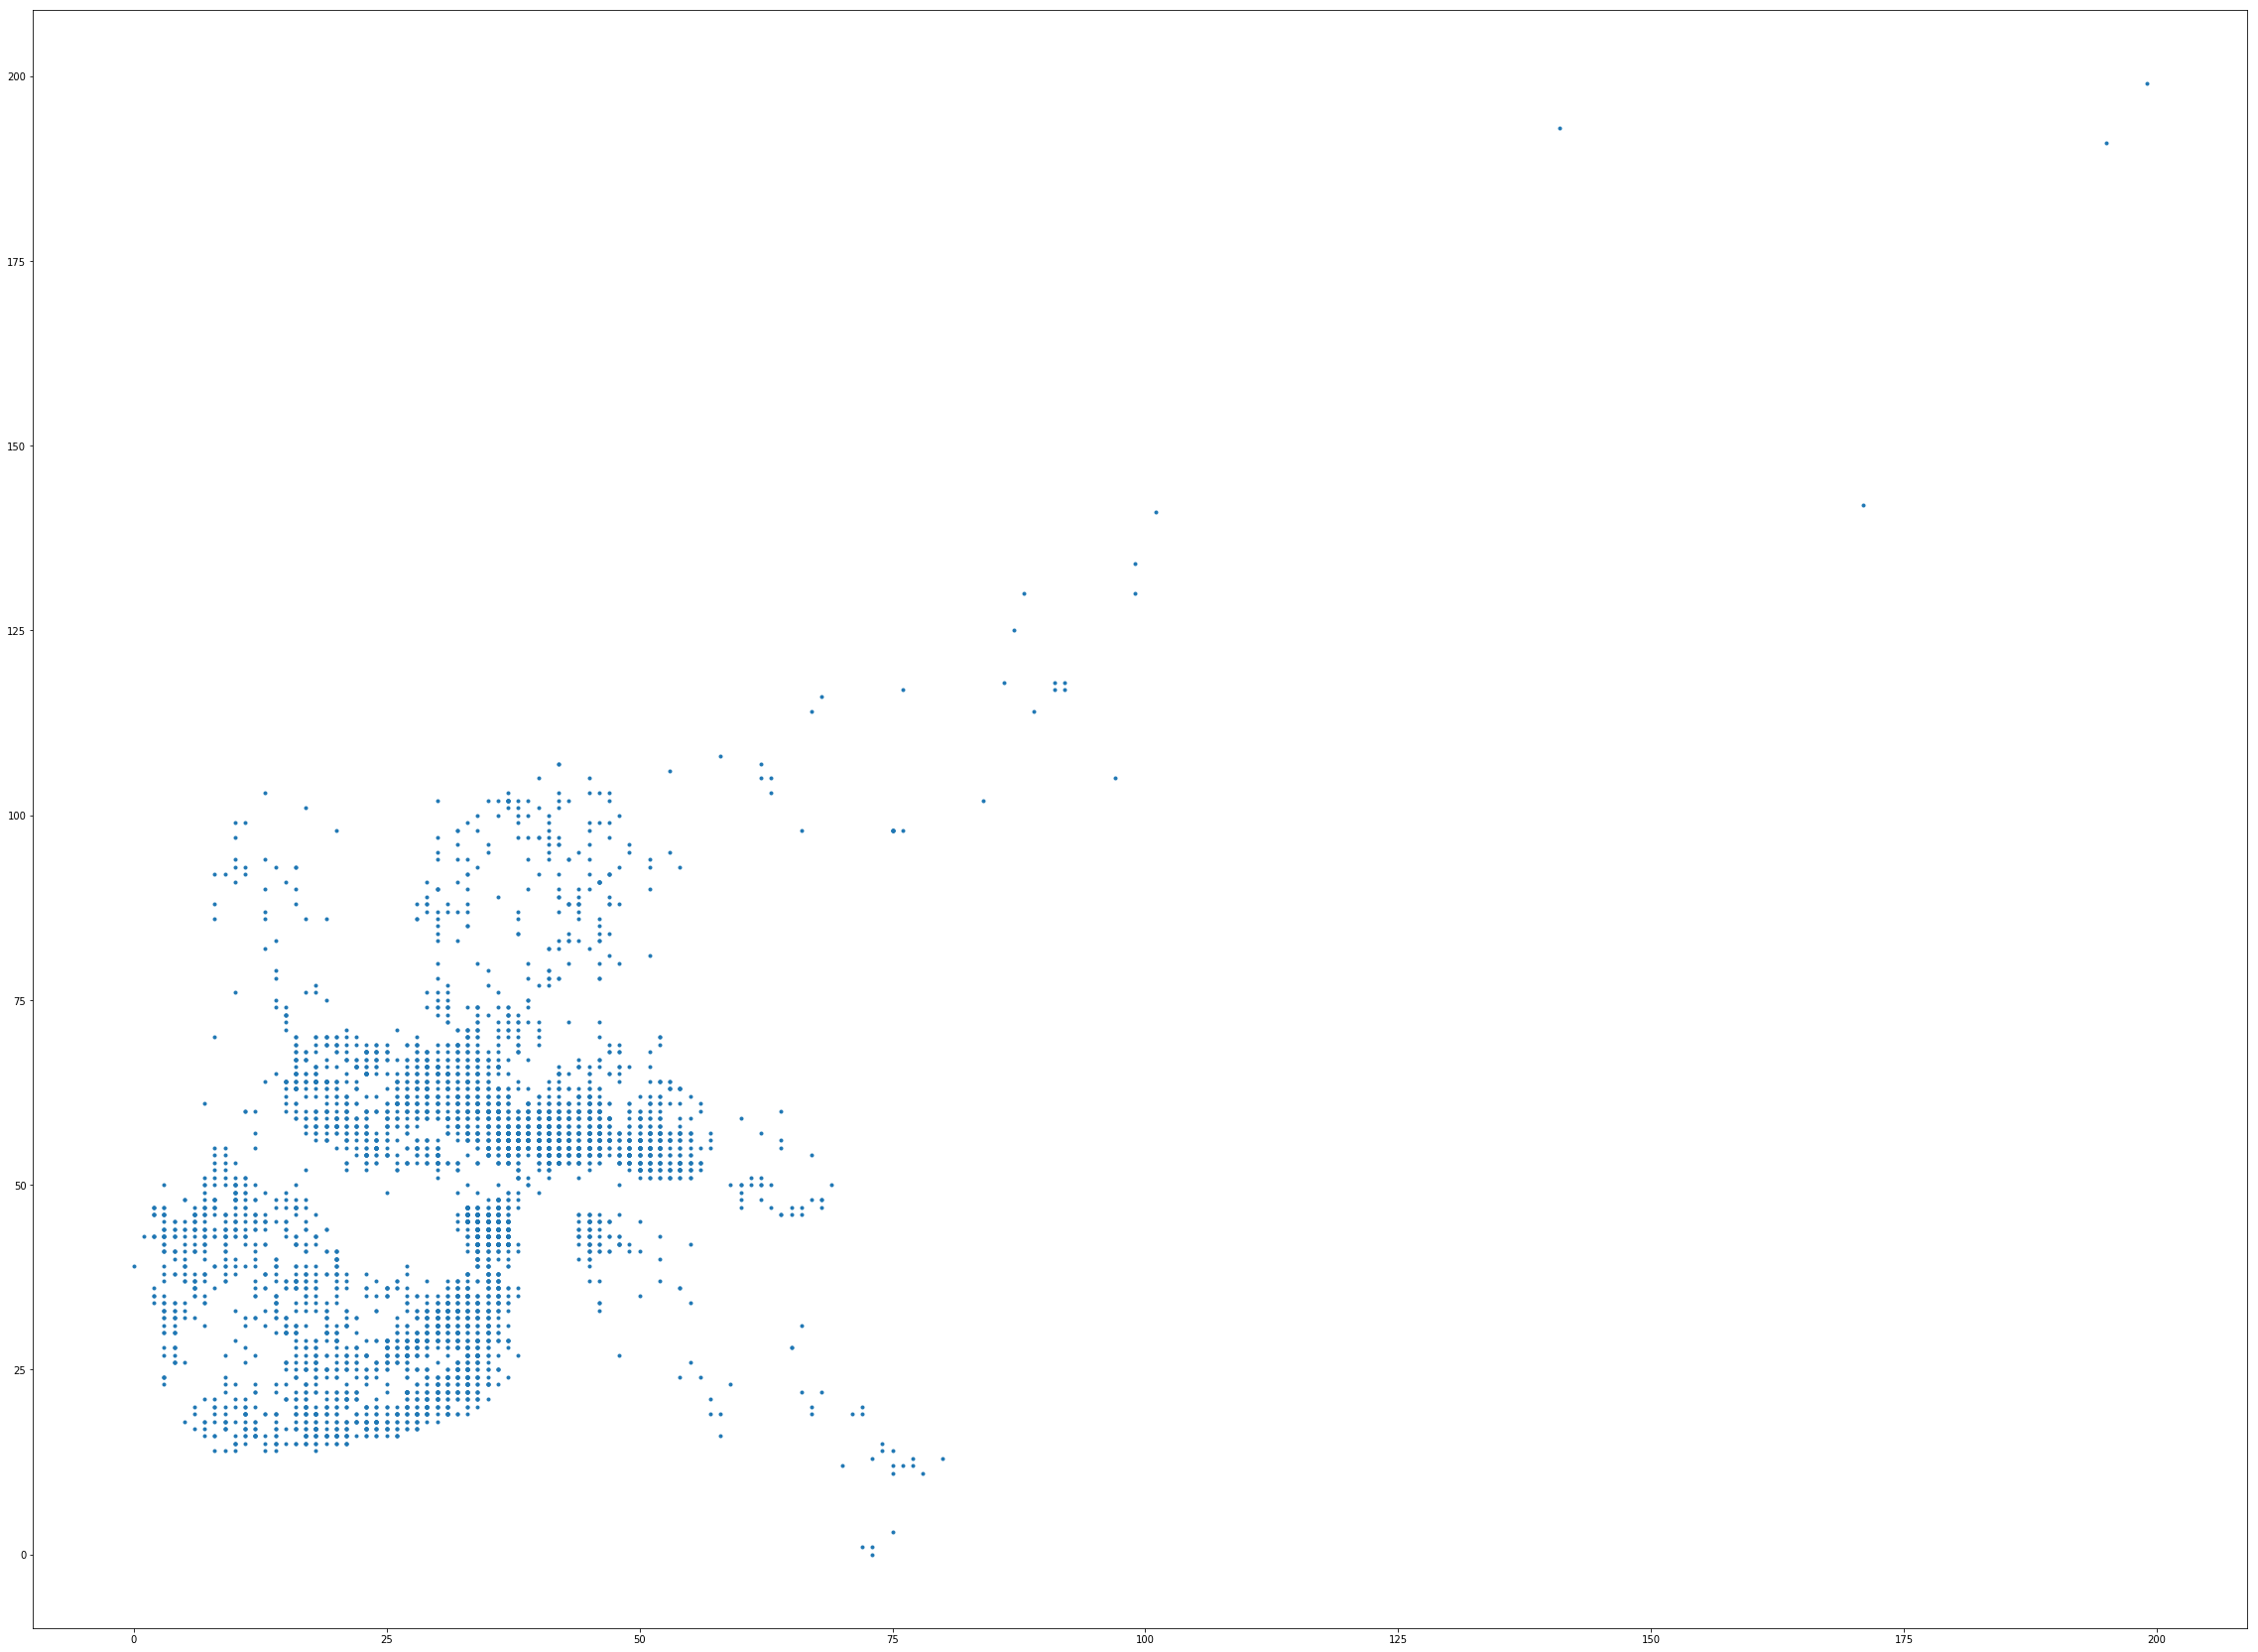

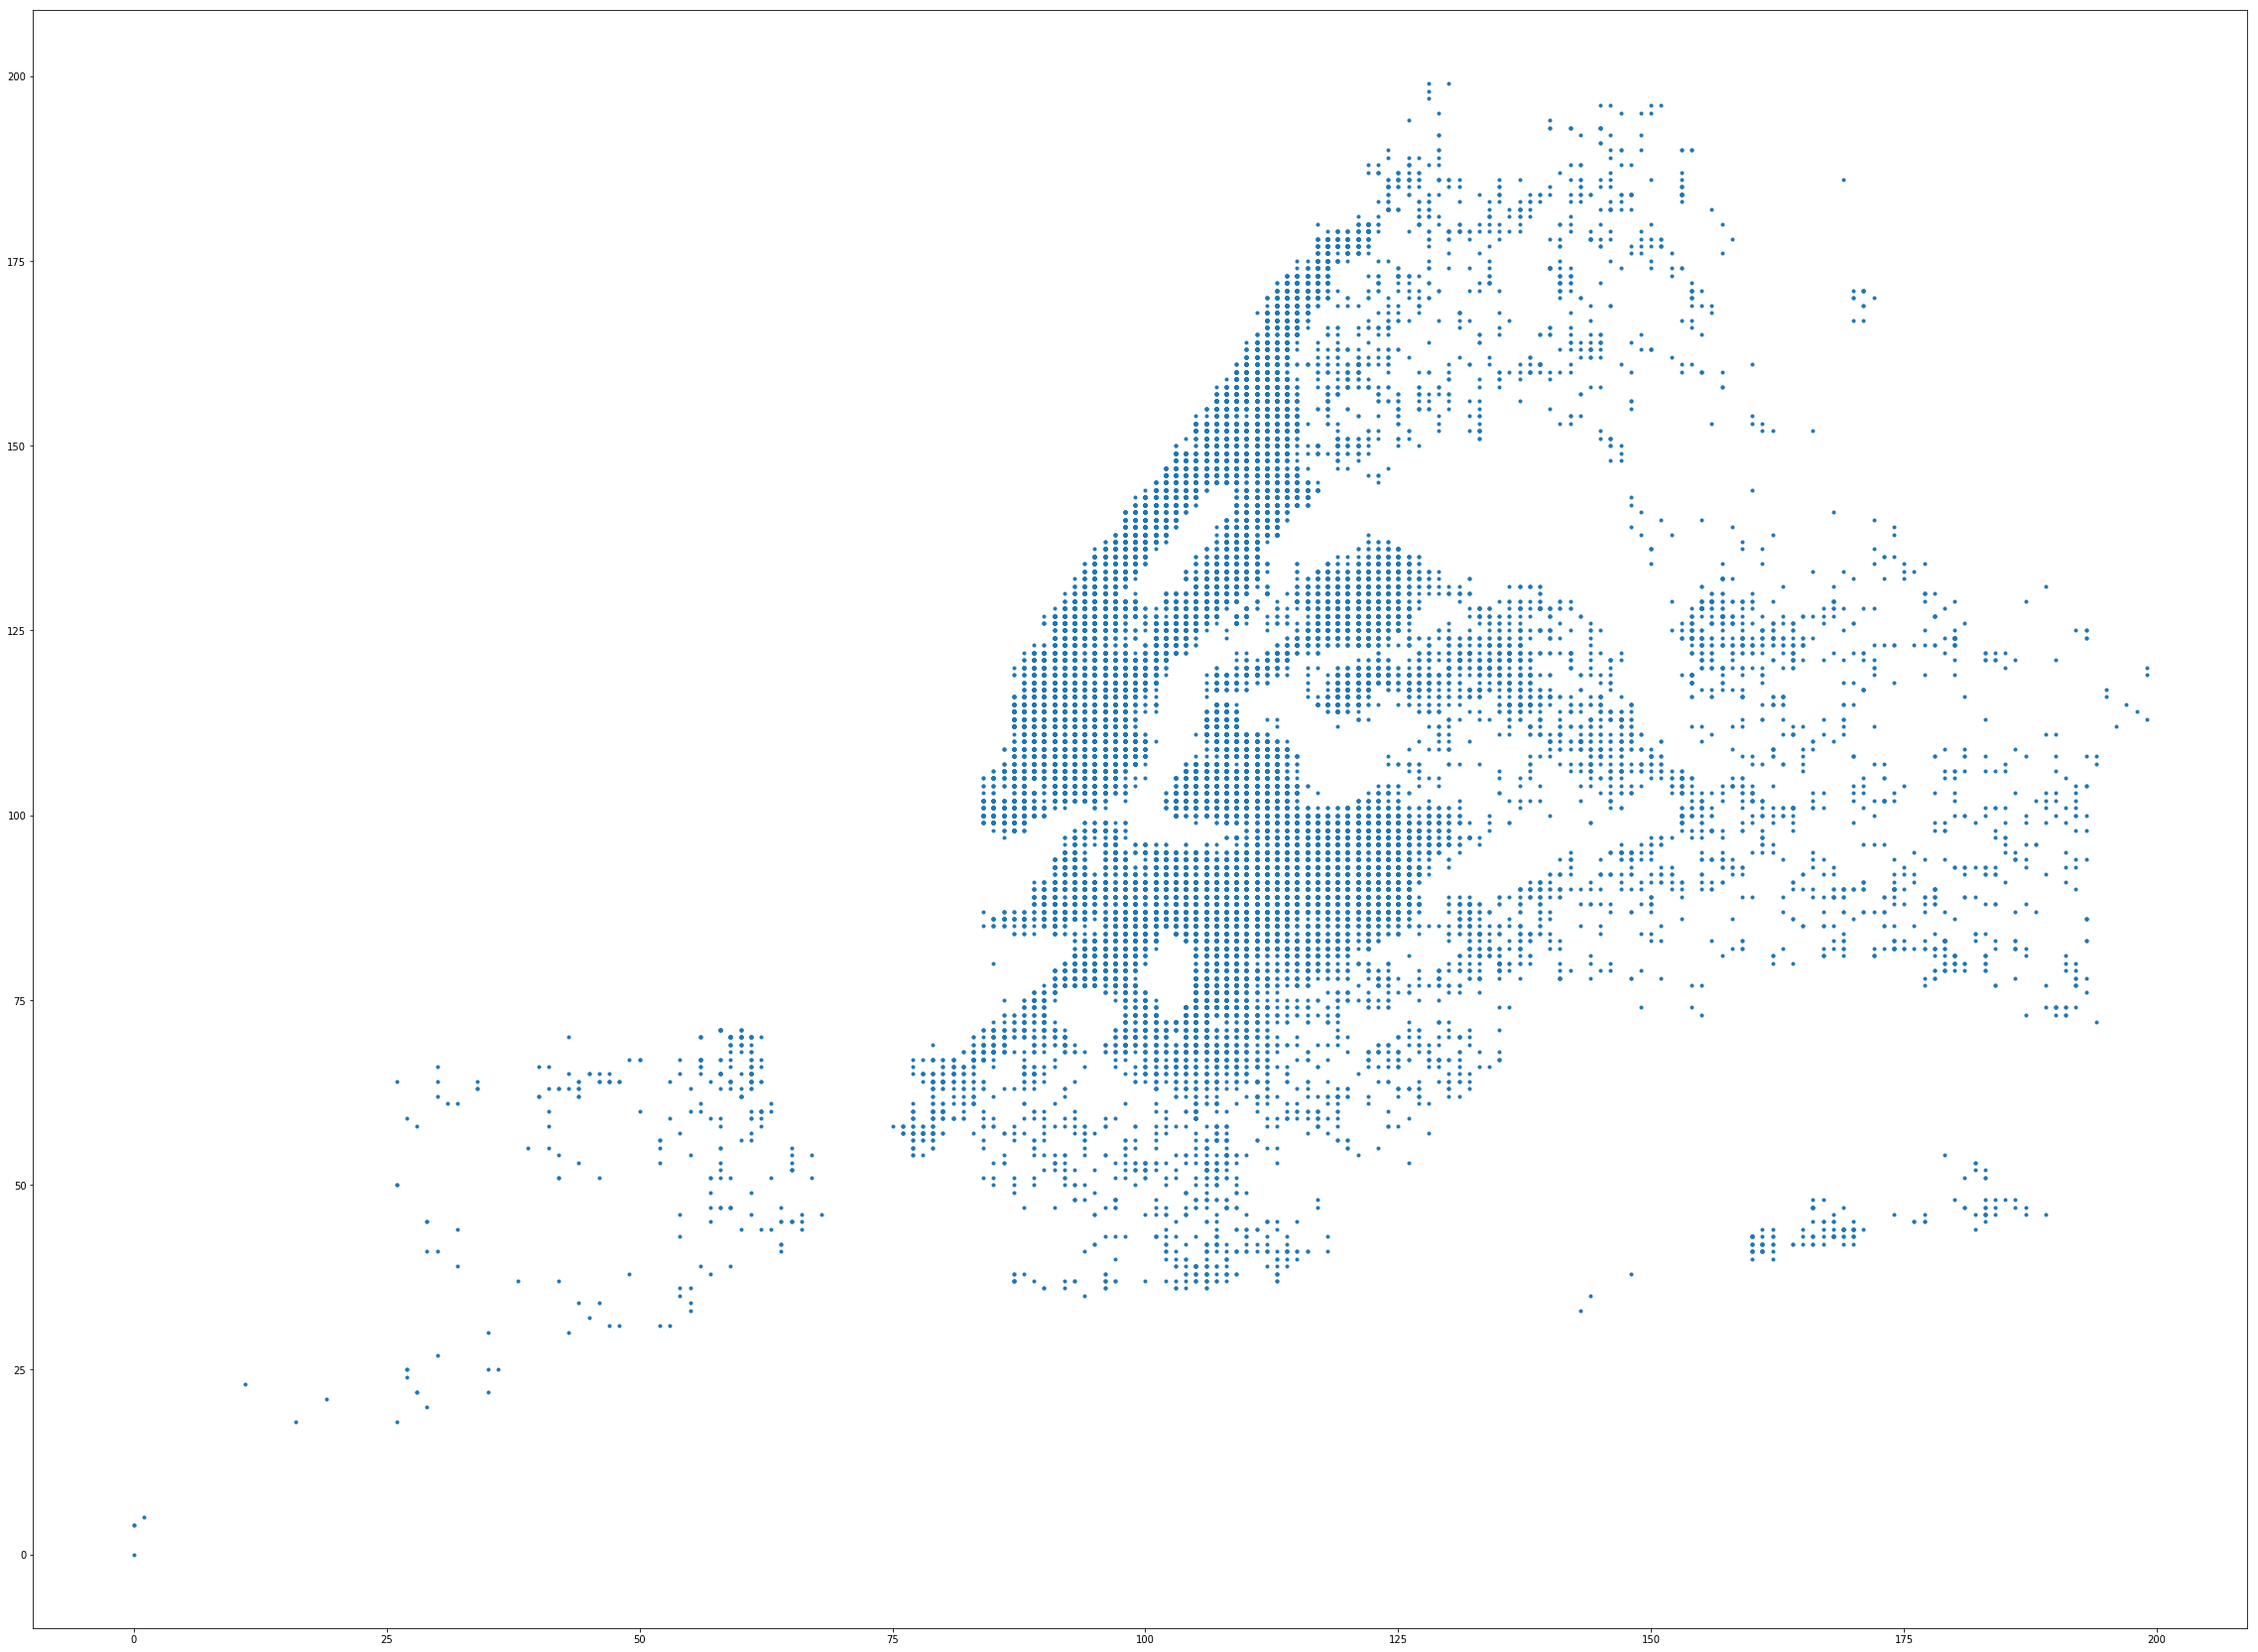

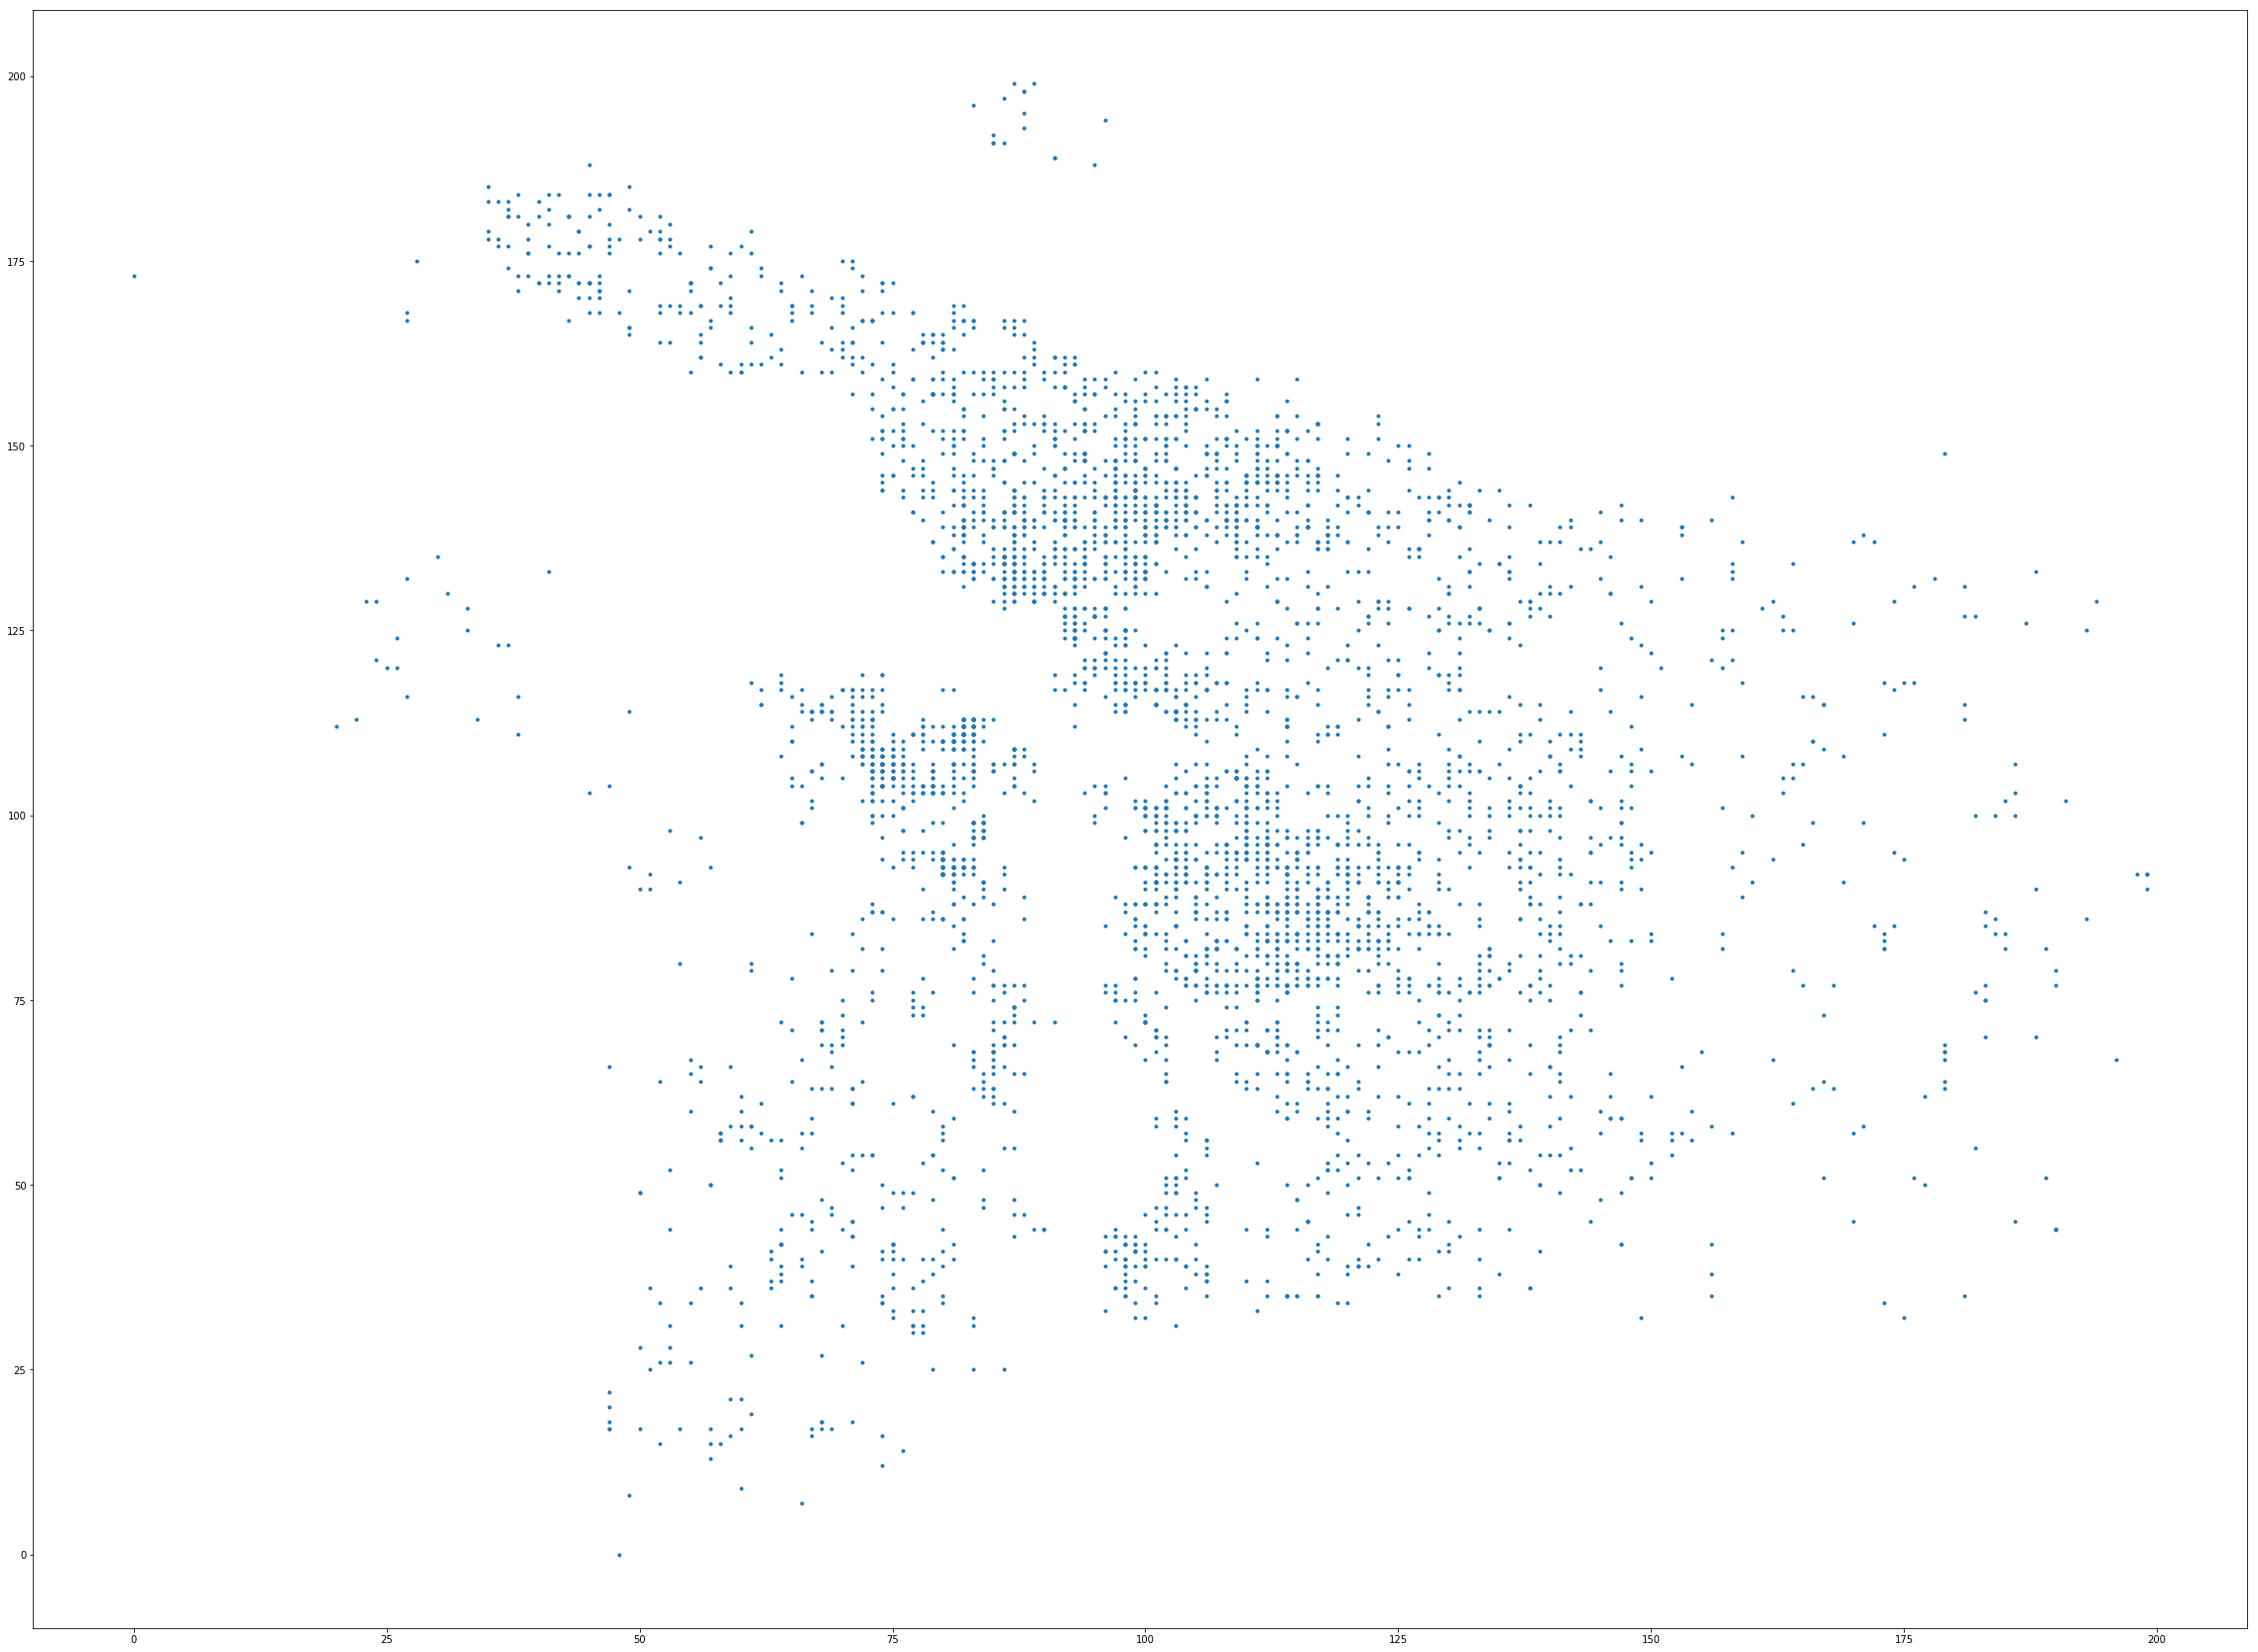

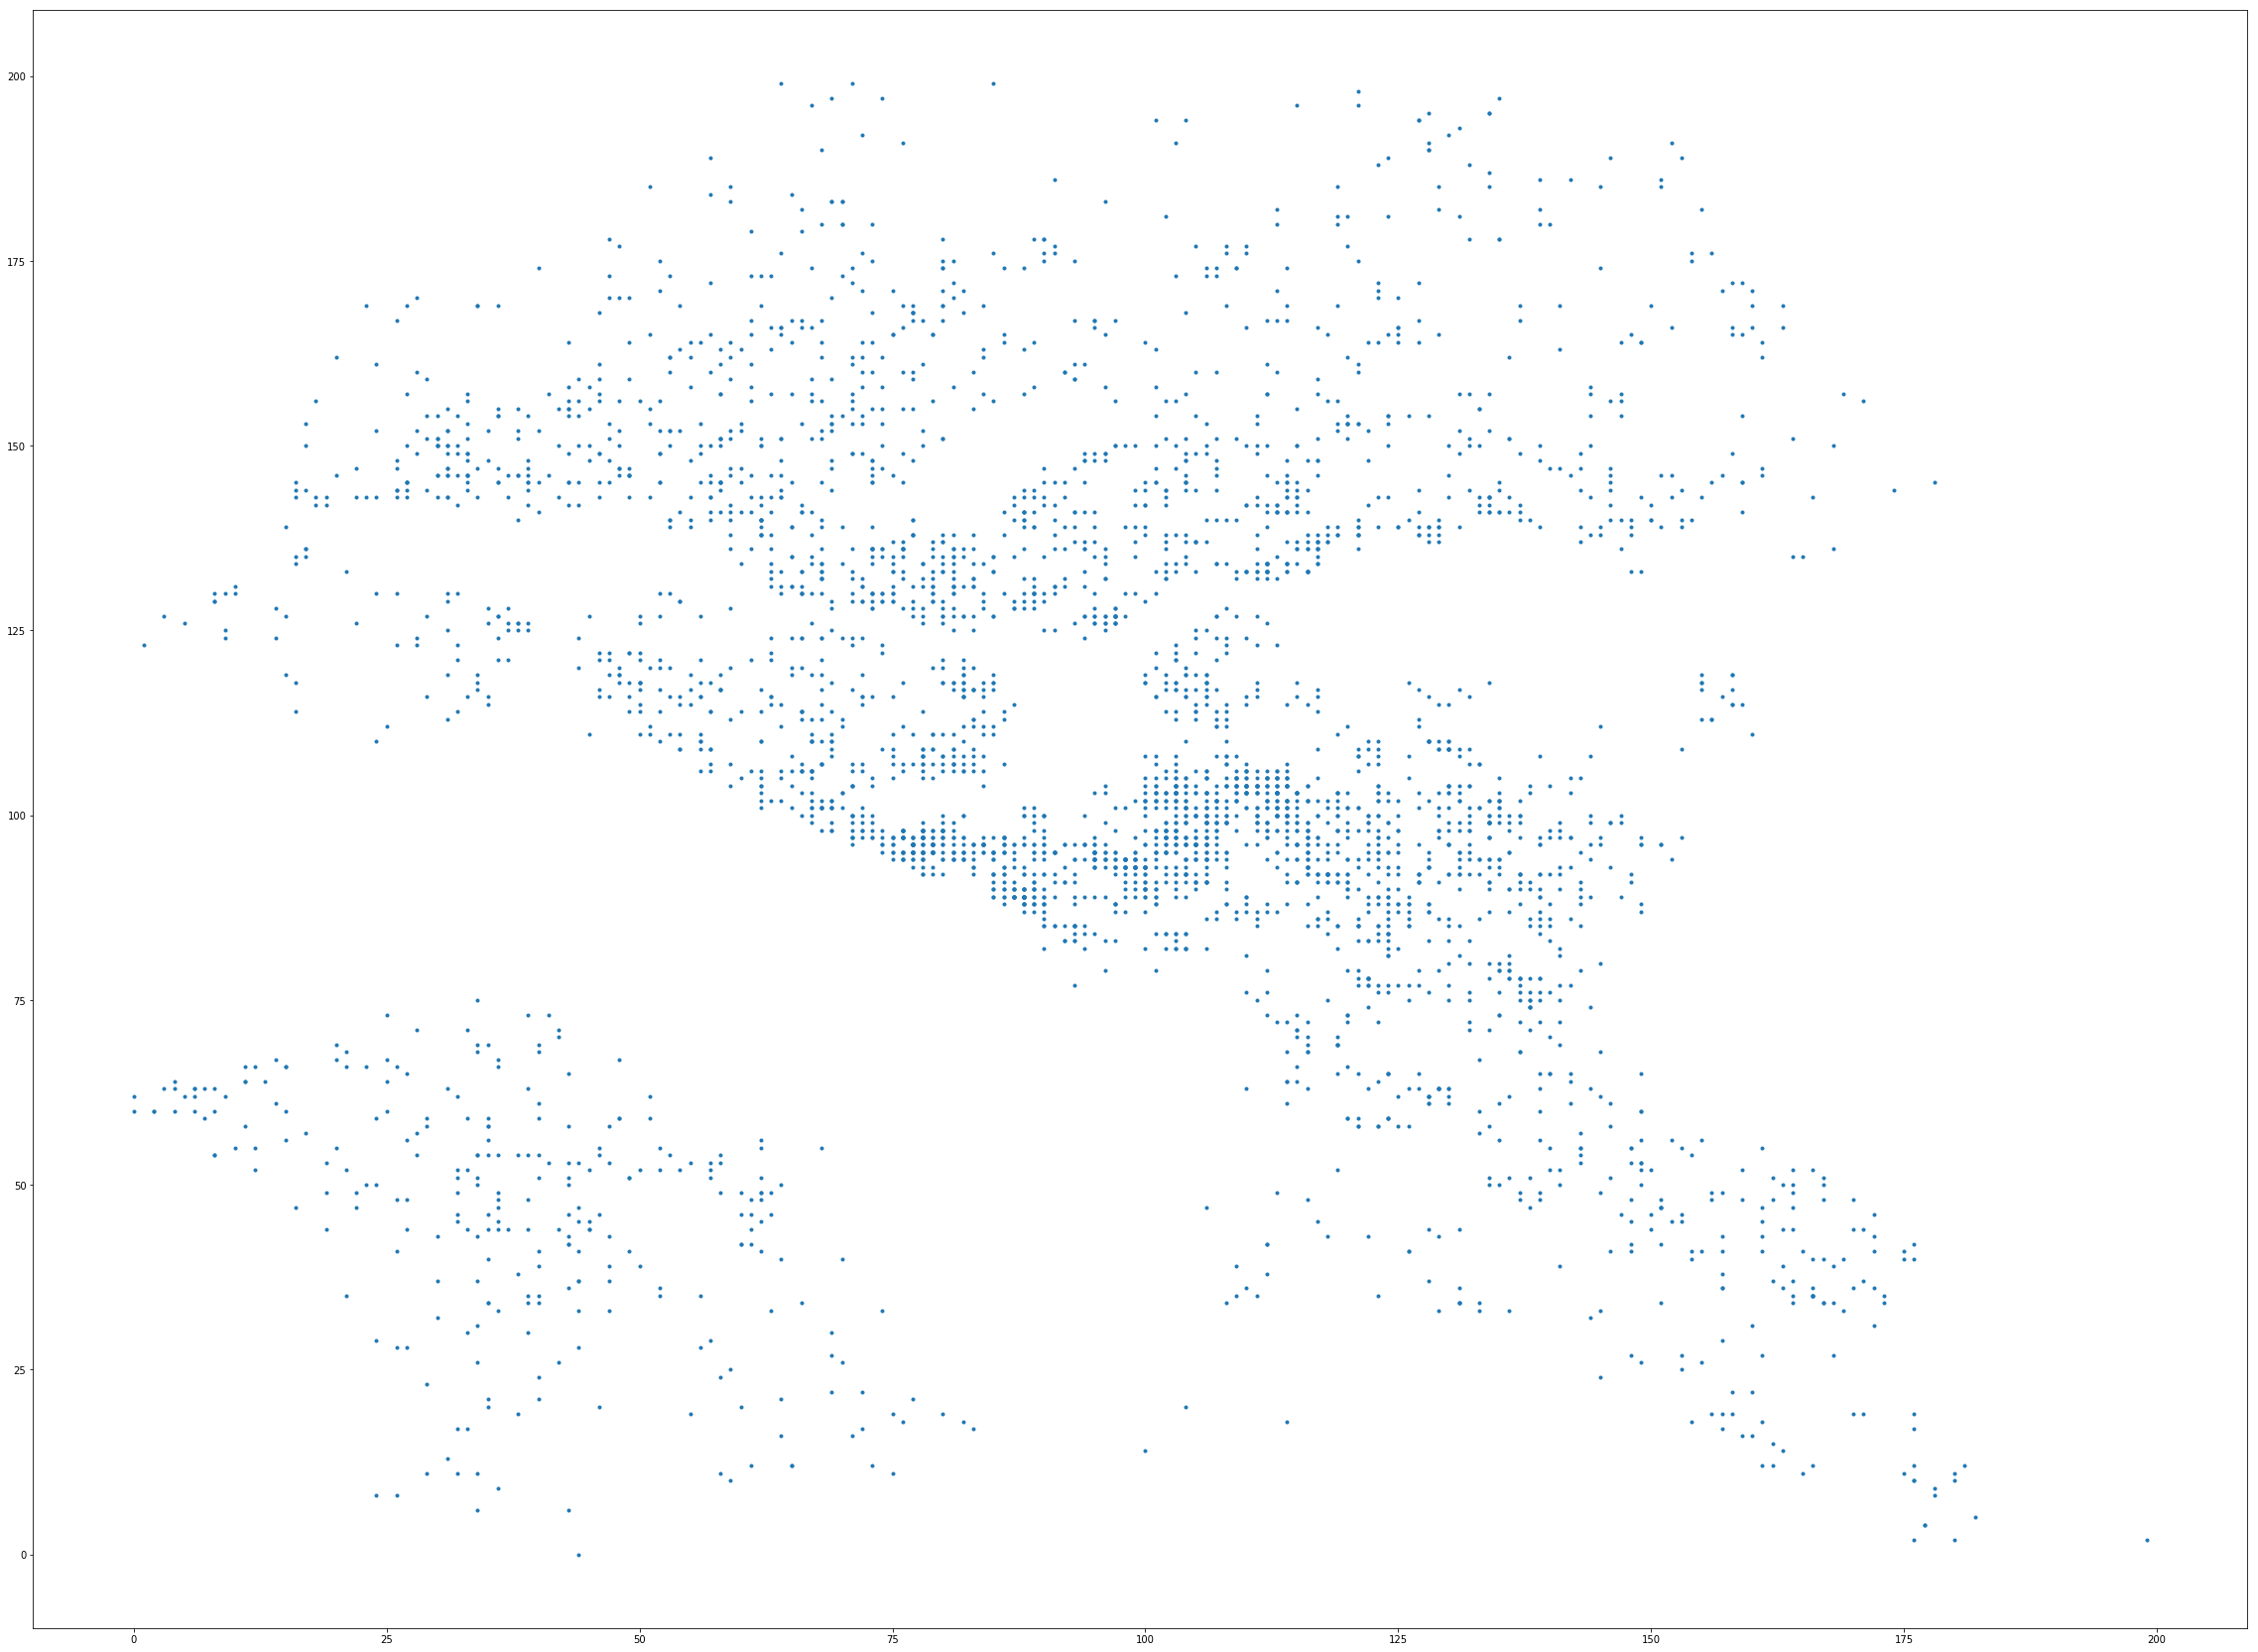

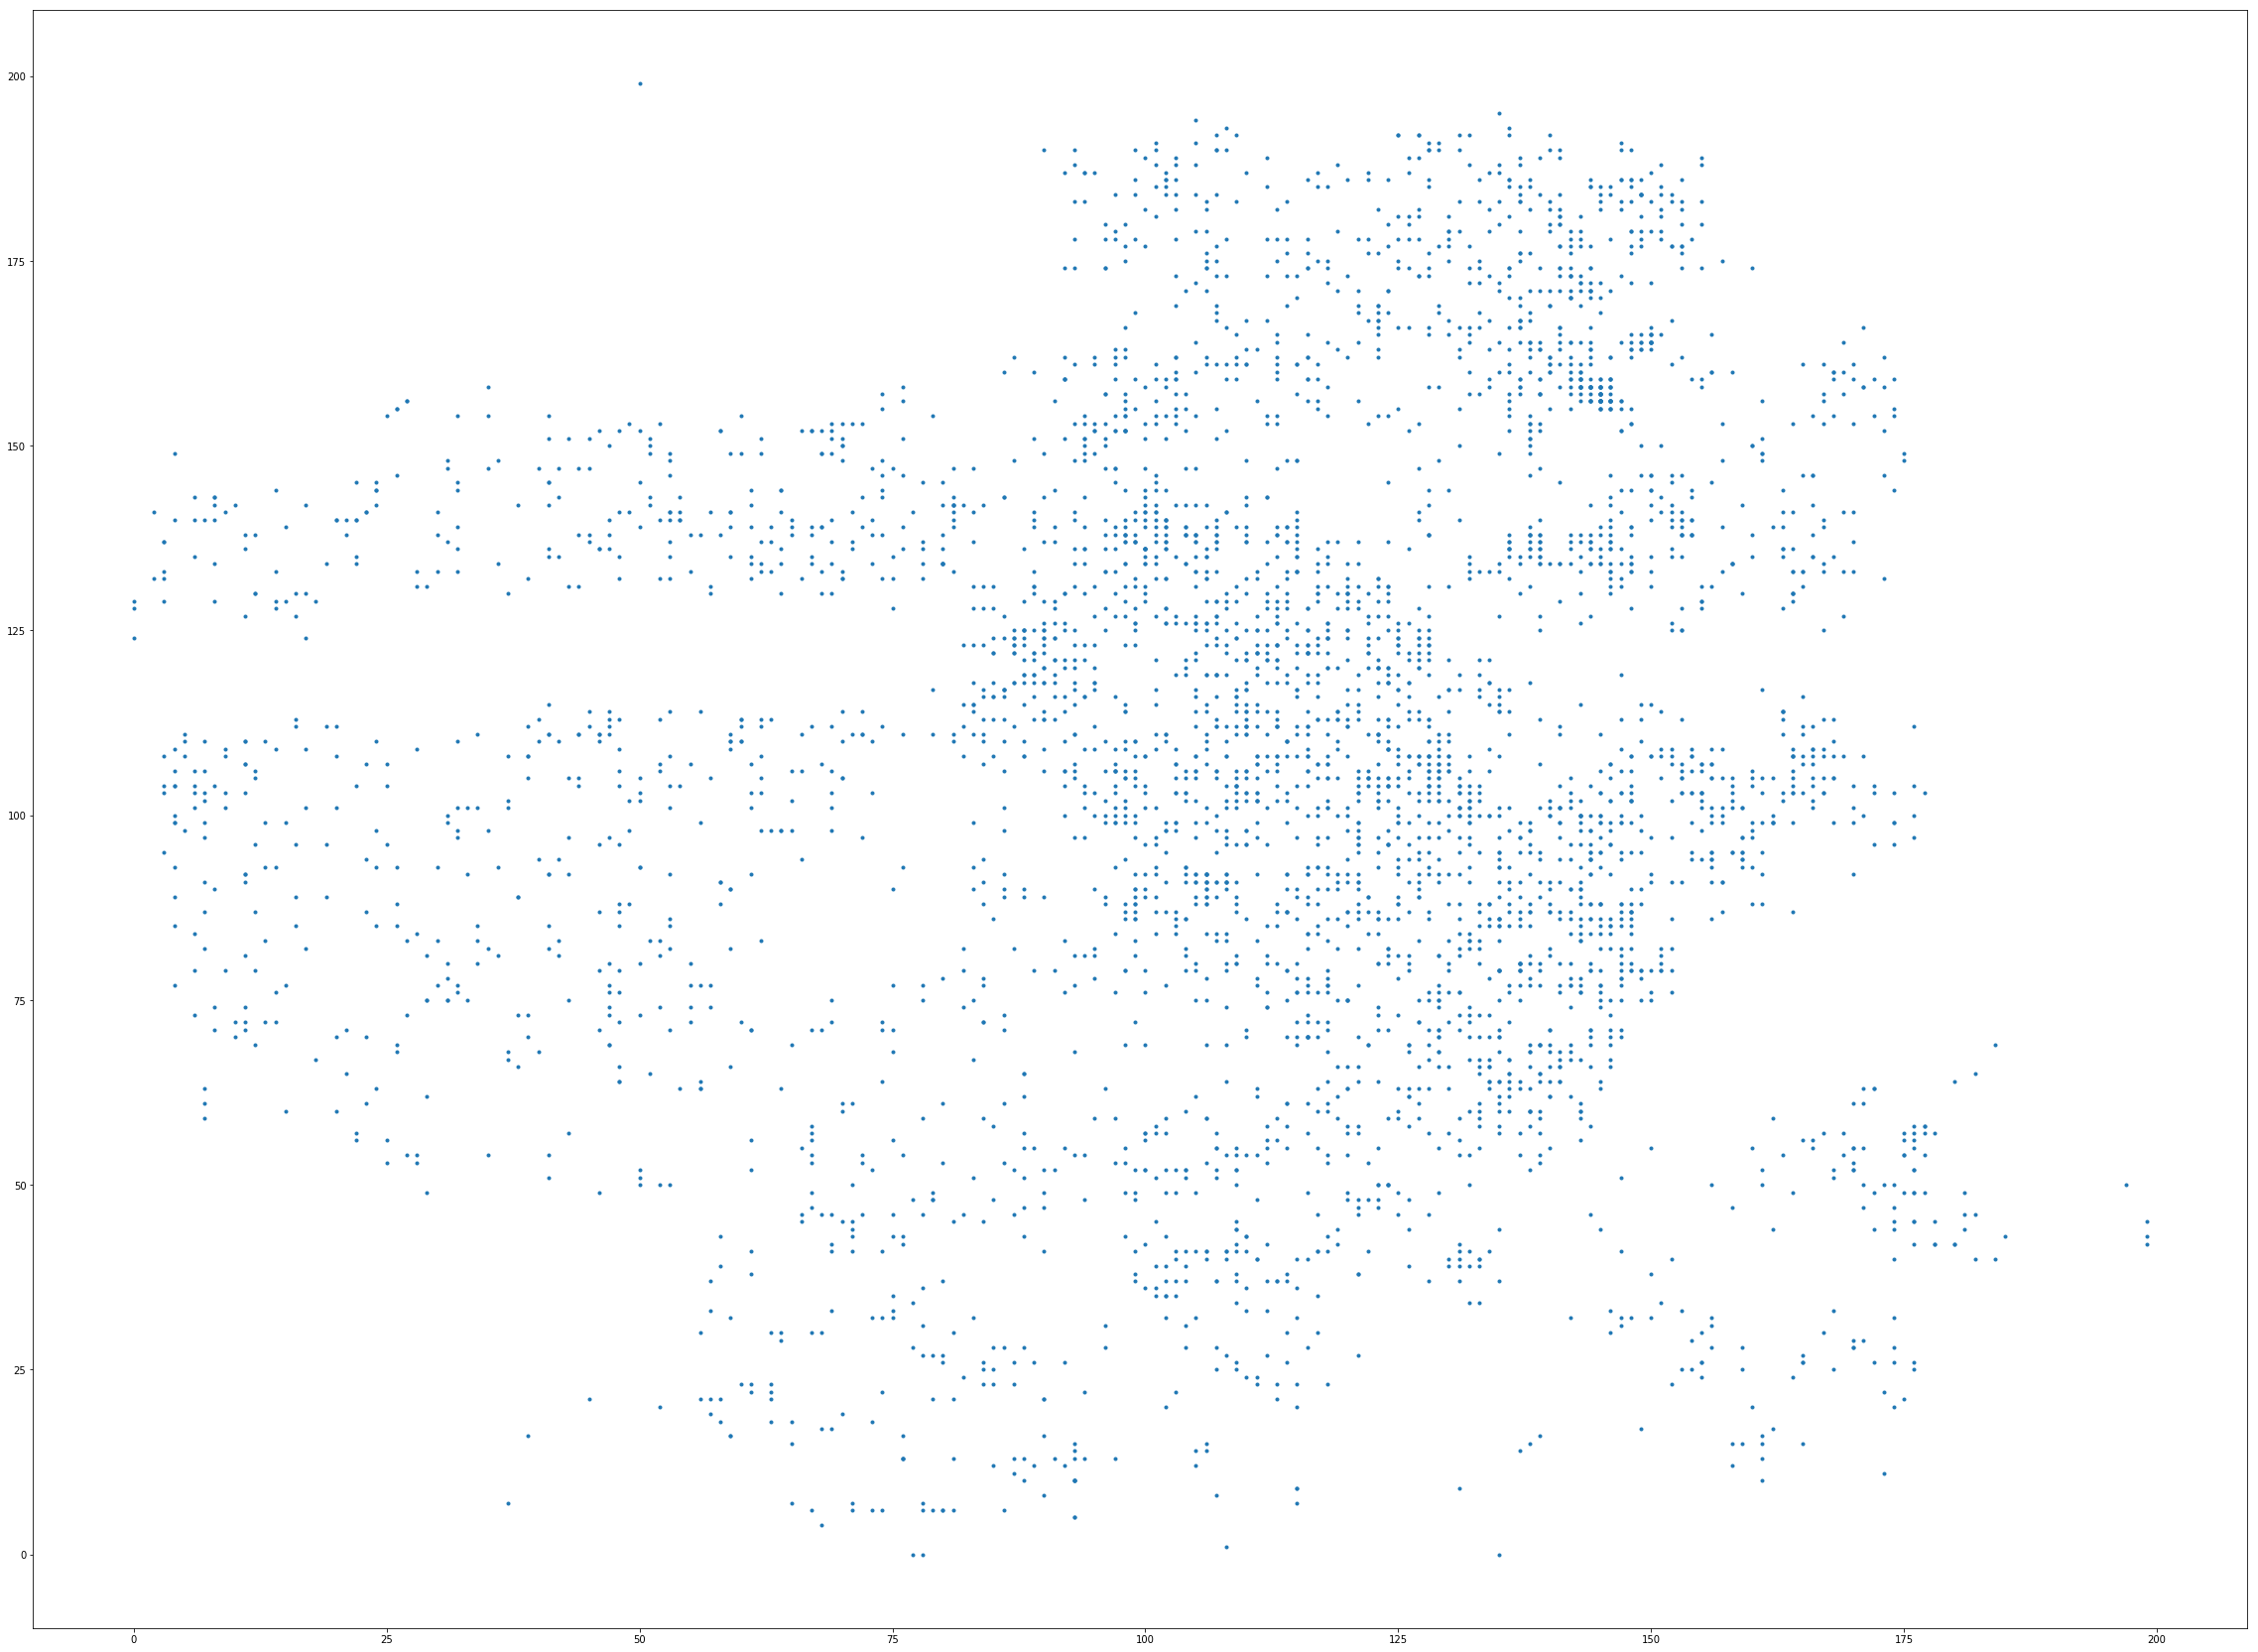

In [6]:
for item in dfl:
    item['adjlat'] = pd.cut(item.latitude, 200, labels = range(0,200))
    item['adjlon'] = pd.cut(item.longitude, 200, labels = range(0, 200))
    plt.figure(figsize = (40,30))
    plt.scatter((np.array(item.adjlon)), (np.array(item.adjlat)), marker = '.')